In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import gc

from utils import *
from data import MnistTF
from nn_kd import *
from layers import *
# from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# check_available_device()
# seed settings
set_rand_seed(0)
gpu_id = '1'

In [4]:
# read Mnist data
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [5]:
def build_big_model(input_dims, output_dims, gpu_id):#, session):
    # session settings
    session = create_session(gpu_id=gpu_id)
#     tf.reset_default_graph()
    bigmodel = SoftenedNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.6))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.5))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.5))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    bigmodel.compile_nn(
        loss=tf.losses.softmax_cross_entropy(bigmodel.ys,bigmodel.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])

    return bigmodel

In [6]:
if try_cls2:
#     teacher = build_big_model(input_dims, output_dims, session)
    teacher = build_big_model(input_dims, output_dims, gpu_id)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=100
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10061665726992829924
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9232728064
locality {
  bus_id: 1
}
incarnation: 7909440389930860084
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 16.022379 , acc = 0.29 
Epoch 1 , step 100 , loss= 1.4728613 , acc = 0.84 
Epoch 1 , step 200 , loss= 0.798932 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.62624395 , acc = 0.93 
Epoch 1 , step 400 , loss= 0.6540356 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.45013577 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.6077269 val_loss= 0.22984502 , acc = 0.92 val acc = 0.9444 
Epoch 1 finished, loss= 1.4005171 val loss= 0.22984502 ,  acc = 0.89809096 val acc = 0.9444
val_acc improved. 
Epoch 2 , step 50 , loss= 0.5495557 , acc = 0.95 
Epoch 2 , step 150 , loss= 0.4903796 , acc = 0.94 
Epoch 2 , step 250 , loss= 0.29379973 , a

Epoch 17 , step 400 , loss= 0.14077324 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.27314898 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.28316042 val_loss= 0.06255773 , acc = 0.97 val acc = 0.9812 
Epoch 17 finished, loss= 0.14632551 val loss= 0.06255773 ,  acc = 0.98790914 val acc = 0.9812

Epoch 18 , step 50 , loss= 0.093552016 , acc = 0.97 
Epoch 18 , step 150 , loss= 0.10999328 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.18400297 , acc = 0.97 
Epoch 18 , step 350 , loss= 0.14615269 , acc = 0.97 
Epoch 18 , step 450 , loss= 0.131067 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.072213374 val_loss= 0.06687602 , acc = 1.0 val acc = 0.982 
Epoch 18 finished, loss= 0.14028543 val loss= 0.06687602 ,  acc = 0.98878175 val acc = 0.982
val_acc improved. 
Epoch 19 , step 0 , loss= 0.22825758 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.15255406 , acc = 0.99 
Epoch 19 , step 200 , loss= 0.10226372 , acc = 0.99 
Epoch 19 , step 300 , loss= 0.17370893 , acc = 0.99 
Epoch 19 , step 400 , loss= 0.0929

Epoch 34 , step 549 , loss= 0.06362477 val_loss= 0.05867685 , acc = 0.99 val acc = 0.9822 
Epoch 34 finished, loss= 0.11437869 val loss= 0.05867685 ,  acc = 0.993909 val acc = 0.9822

Epoch 35 , step 0 , loss= 0.03242336 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.21922724 , acc = 0.98 
Epoch 35 , step 200 , loss= 0.22119187 , acc = 0.99 
Epoch 35 , step 300 , loss= 0.088176385 , acc = 0.99 
Epoch 35 , step 400 , loss= 0.13907653 , acc = 0.99 
Epoch 35 , step 500 , loss= 0.10497754 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.19032171 val_loss= 0.0546031 , acc = 0.97 val acc = 0.9844 
Epoch 35 finished, loss= 0.11178768 val loss= 0.0546031 ,  acc = 0.993709 val acc = 0.9844

Epoch 36 , step 50 , loss= 0.26394793 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.26844615 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.12486029 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.044465475 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.101681516 , acc = 0.99 
Epoch 36 , step 549 , loss= 0.0846544 val_loss= 0.05708

Plotting loss...


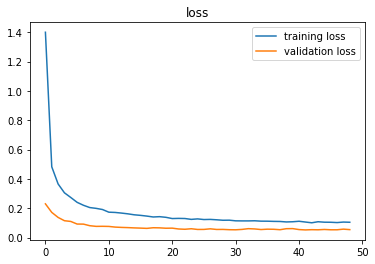

Plotting metrics...


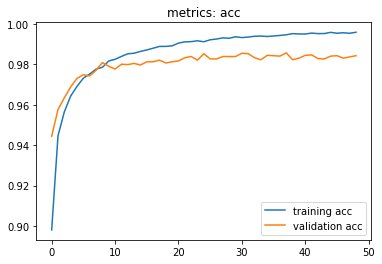

train {'acc': 0.99594545}
test {'acc': 0.9822}


In [7]:
if try_cls2:
#     gc.collect()
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

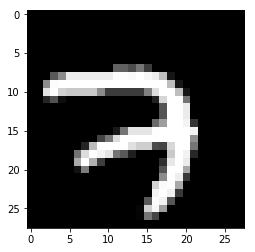

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.7149971e-12 1.3925812e-09 5.5532251e-05 5.2014989e-06 1.0646755e-11
 2.0184782e-10 8.0206030e-20 9.9993920e-01 1.9714681e-10 4.4615072e-09]


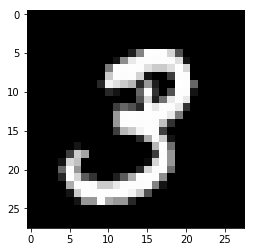

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[4.3019443e-16 4.6546930e-10 3.4655347e-09 9.9995732e-01 6.8250993e-13
 5.2534978e-07 3.9628151e-18 5.8275240e-10 8.0077052e-06 3.4209985e-05]


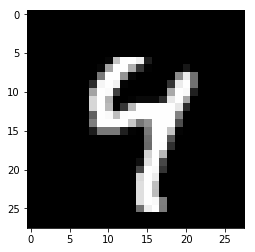

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.0631380e-09 4.7334626e-07 3.5066518e-07 1.3061553e-07 9.0678054e-01
 8.9616860e-06 7.8413347e-09 6.5137818e-04 7.1973438e-05 9.2486136e-02]


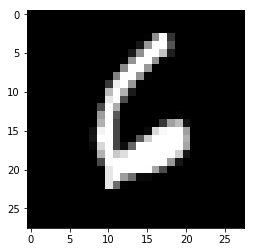

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1.0943315e-09 3.8753191e-13 1.1654189e-09 2.9845516e-12 2.3044463e-07
 4.0089580e-07 9.9999940e-01 1.8749122e-16 8.3415400e-11 5.3099647e-12]


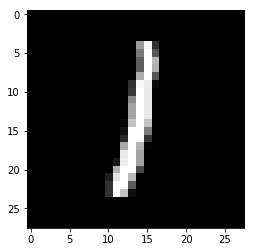

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.4731105e-26 1.0000000e+00 2.0587207e-21 2.5455014e-27 1.7214401e-19
 2.8198362e-29 3.6468717e-21 3.6069776e-17 1.5732500e-16 2.2186206e-24]


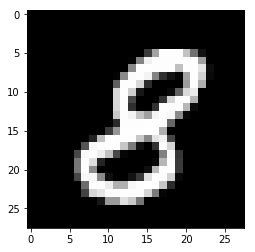

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[6.8446099e-07 1.3240484e-06 2.3704868e-06 1.3355554e-05 4.9411661e-09
 8.1800074e-08 1.8578183e-08 5.6921636e-09 9.9998212e-01 2.3151593e-08]


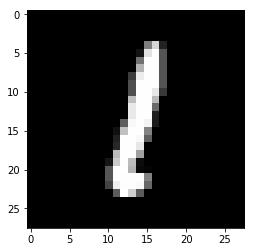

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.4709868e-21 1.0000000e+00 1.1214463e-17 5.1049499e-23 8.8261760e-17
 1.1016543e-23 1.2405143e-16 1.4654756e-14 1.0766990e-12 4.0089737e-21]


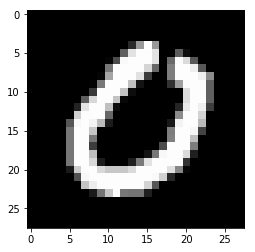

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 1.1338835e-30 7.0094339e-17 9.1218582e-24 5.1079821e-18
 2.8235159e-15 7.8419747e-14 1.6911498e-17 6.2385719e-19 2.6821379e-15]


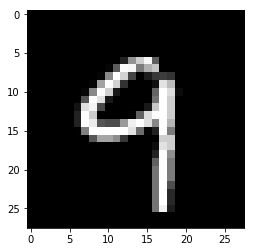

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[6.1402906e-16 4.7014563e-19 6.1073359e-14 9.7722175e-10 7.6328170e-08
 1.1945627e-11 1.2932115e-24 2.0902451e-08 2.8376410e-10 9.9999988e-01]


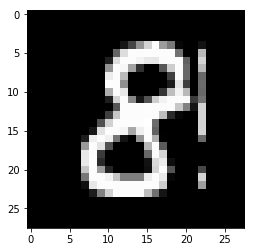

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.1546807e-06 1.0103561e-06 3.6770420e-05 3.5229481e-05 4.3201307e-08
 5.0520572e-07 1.0921596e-06 6.6868209e-09 9.9992418e-01 4.6627452e-08]


In [8]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

## Small Model and Student Model

In [9]:

def build_small_model(input_dims, output_dims, is_student, gpu_id):#, session):
    # session settings
    session = create_session(gpu_id=gpu_id)
#     tf.reset_default_graph()
    smallmodel = StudentNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=300,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=300,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    if is_student:
        smallmodel.compile_student(
            loss_standard=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3) #TODO: learning rate
            , metrics = ['acc']
        )
    else:
        smallmodel.compile_nn(
            loss=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
            , metrics = ['acc']
        )
    return smallmodel

### Training Small Model without Teacher

In [10]:
train_small = True
# gc.collect()
if try_cls2 and train_small:
#     small = build_small_model(input_dims, output_dims, session, is_student=False)
    small = build_small_model(input_dims, output_dims, is_student=False, gpu_id=gpu_id)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10322504729609429291
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 16468487109473339854
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.9361236 , acc = 0.27 
Epoch 1 , step 100 , loss= 0.22306424 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.26512727 , acc = 0.94 
Epoch 1 , step 300 , loss= 0.12792675 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.063294984 , acc = 1.0 
Epoch 1 , step 500 , loss= 0.075011194 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.119943865 val_loss= 0.12264619 , acc = 0.96 val acc = 0.9634 
Epoch 1 finished, loss= 0.24150105 val loss= 0.12264619 ,  acc = 0.93716353 val acc = 0.9634
val_acc improved. 
Epoch 2 , step 50 , loss= 0.04555364 , acc = 1.0 
Epoch 2 , step 150 , loss= 0.075031325 , acc = 0.98 
Epoch 2 , step 250 , loss= 0.0

Epoch 17 , step 300 , loss= 0.00017412411 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.012865125 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.011015589 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.011151793 val_loss= 0.10056377 , acc = 1.0 val acc = 0.9812 
Epoch 17 finished, loss= 0.006624335 val loss= 0.10056377 ,  acc = 0.9998363 val acc = 0.9812
val_acc improved. 
Epoch 18 , step 50 , loss= 0.009169811 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0016227656 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.03149325 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.00025378028 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0032133097 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.021496791 val_loss= 0.10054352 , acc = 1.0 val acc = 0.9814 
Epoch 18 finished, loss= 0.008382525 val loss= 0.10054352 ,  acc = 0.9997454 val acc = 0.9814
val_acc improved. 
Epoch 19 , step 0 , loss= 0.0010124726 , acc = 1.0 
Epoch 19 , step 100 , loss= 4.623997e-05 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.003719545 , acc = 1.0 
Epoch

Epoch 34 , step 250 , loss= 0.008565442 , acc = 1.0 
Epoch 34 , step 350 , loss= 5.8873184e-06 , acc = 1.0 
Epoch 34 , step 450 , loss= 4.9636645e-05 , acc = 1.0 
Epoch 34 , step 549 , loss= 3.6759087e-05 val_loss= 0.13030142 , acc = 1.0 val acc = 0.98 
Epoch 34 finished, loss= 0.0026457496 val loss= 0.13030142 ,  acc = 0.9999636 val acc = 0.98

Epoch 35 , step 0 , loss= 2.8371664e-07 , acc = 1.0 
Epoch 35 , step 100 , loss= 2.1432325e-06 , acc = 1.0 
Epoch 35 , step 200 , loss= 6.109271e-05 , acc = 1.0 
Epoch 35 , step 300 , loss= 4.7751128e-06 , acc = 1.0 
Epoch 35 , step 400 , loss= 3.9824313e-06 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.0010894858 , acc = 1.0 
Epoch 35 , step 549 , loss= 2.5324025e-05 val_loss= 0.12614578 , acc = 1.0 val acc = 0.9826 
Epoch 35 finished, loss= 0.0028162973 val loss= 0.12614578 ,  acc = 0.9999636 val acc = 0.9826

Epoch 36 , step 50 , loss= 0.0002788697 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.00031365376 , acc = 1.0 
Epoch 36 , step 250 , loss= 4

Small model
Plotting loss...


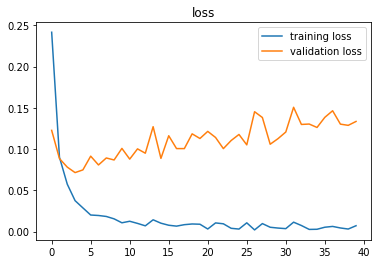

Plotting metrics...


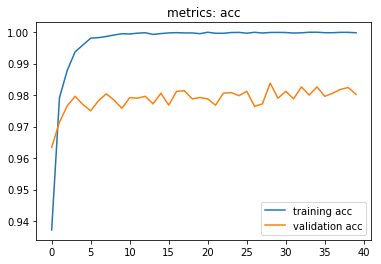

train {'acc': 0.9973636}
test {'acc': 0.9797}


In [11]:
if try_cls2 and train_small:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

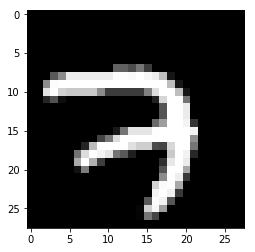

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[2.1628438e-21 2.1386861e-17 4.6723049e-15 7.1502235e-08 1.1782720e-19
 1.7811544e-17 3.3876869e-35 9.9999988e-01 8.0428623e-23 2.3069045e-12]


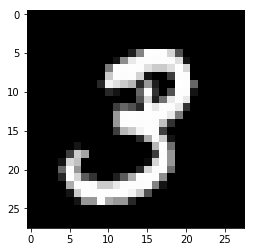

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1.6023730e-29 1.2414854e-30 9.7057916e-25 1.0000000e+00 8.1951087e-32
 1.8295369e-19 1.2783603e-31 3.6380246e-34 4.8248047e-08 1.3617924e-11]


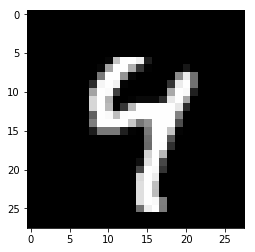

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.7252920e-18 1.1109055e-20 5.8413259e-20 2.4263111e-20 9.9999917e-01
 1.3522745e-14 4.0600589e-17 3.1848143e-13 1.5993242e-14 8.4101453e-07]


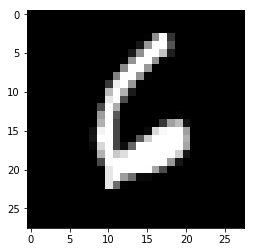

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[2.0926999e-18 1.1262971e-21 6.6749939e-16 1.0640000e-21 4.3347003e-14
 2.5705097e-13 1.0000000e+00 1.9692340e-19 2.4503374e-21 1.6770349e-18]


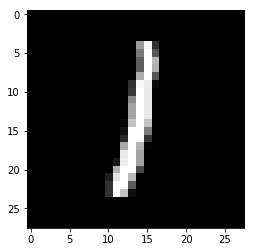

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.1651209e-14 1.0000000e+00 3.3289175e-13 3.2077256e-14 7.4376269e-11
 5.1255933e-16 4.0470752e-16 7.0537171e-10 1.2225220e-12 4.9944434e-15]


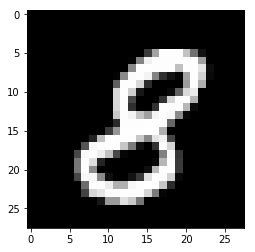

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.4419312e-20 9.6706976e-22 4.3954017e-14 2.2921543e-12 4.9786622e-27
 1.6583602e-14 5.7105327e-17 9.7114170e-26 1.0000000e+00 6.9896191e-18]


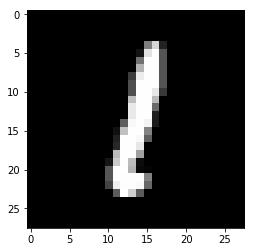

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.6527920e-15 1.0000000e+00 7.6852120e-17 4.7901471e-18 2.2510443e-14
 1.3720703e-18 2.3234170e-18 1.1306739e-12 1.2736766e-10 3.7845674e-17]


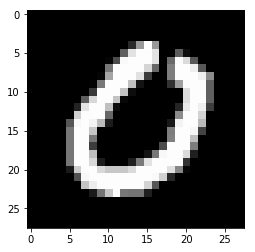

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 1.3084188e-27 4.5922850e-19 1.1176279e-25 3.4073639e-26
 7.9724939e-28 1.6634357e-21 4.7583797e-20 2.5213180e-30 4.3158814e-18]


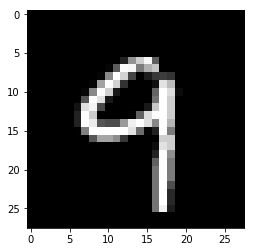

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.43340926e-19 1.10841986e-23 6.78439766e-18 5.36797019e-16
 8.17254996e-14 1.94078948e-20 5.42164976e-28 5.84850636e-14
 1.53621866e-17 1.00000000e+00]


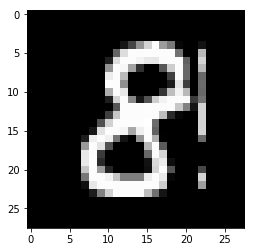

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.8519613e-17 7.5400599e-21 2.0851971e-11 1.0634423e-13 9.0314673e-21
 6.3657567e-15 1.4341108e-17 3.2242744e-22 1.0000000e+00 6.7677357e-15]


In [12]:
if try_cls2 and train_small:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = small
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

## Experiments on Students

In [13]:
temperatures = [2,4,6,8,10,15,20]#[5,10,15,20,25,30]
coef_soft_losses = [0.0, 0.25, 0.5, 0.75, 1.0]#[1.0, 0.75, 0.5, 0.25, 0.0]

### Experiments on Students without Effect of $T^2$

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4746139966415227479
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 9112640343522668797
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.1618302 , acc = 0.2 
Epoch 1 , step 100 , loss= 0.17379394 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.15233287 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.1100761 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.14391941 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.14562596 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.13457592 val_loss= 0.117760874 , acc = 0.96 val acc = 0.965 
Epoch 1 finished, loss= 0.24588345 val loss= 0.117760874 ,  acc = 0.9350546 val acc = 0.965
val_acc improved. 
Epoch 2 , step 50 , loss= 0.02992514 , 

Epoch 17 , step 100 , loss= 0.00010590089 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.012829077 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.056127787 , acc = 0.99 
Epoch 17 , step 400 , loss= 0.002233575 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.06218065 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.06635068 val_loss= 0.11594183 , acc = 0.99 val acc = 0.9748 
Epoch 17 finished, loss= 0.010967357 val loss= 0.11594183 ,  acc = 0.9995635 val acc = 0.9748

Epoch 18 , step 50 , loss= 0.00392533 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0008419938 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0015187662 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.012288255 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0048912787 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0012367448 val_loss= 0.11495597 , acc = 1.0 val acc = 0.9784 
Epoch 18 finished, loss= 0.008243625 val loss= 0.11495597 ,  acc = 0.9997636 val acc = 0.9784

Epoch 19 , step 0 , loss= 0.023057548 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0001372471 , 

Epoch 34 , step 150 , loss= 0.00013618059 , acc = 1.0 
Epoch 34 , step 250 , loss= 2.990765e-06 , acc = 1.0 
Epoch 34 , step 350 , loss= 2.1898464e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.00014663996 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.00018293648 val_loss= 0.13450357 , acc = 1.0 val acc = 0.9806 
Epoch 34 finished, loss= 0.0036217414 val loss= 0.13450357 ,  acc = 0.9999272 val acc = 0.9806

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.0, 'coef_hardloss': 1.0, 'temperature': 2, 'temperature_effect': 1, 'train_acc': 0.99767274, 'test_acc': 0.9784}
Plotting loss...


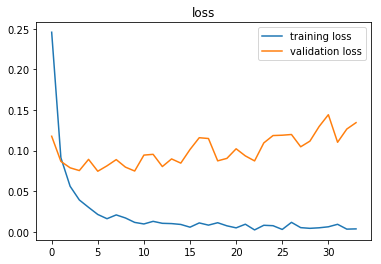

Plotting metrics...


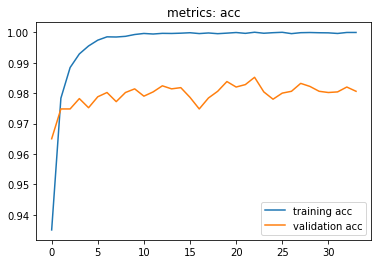

train {'acc': 0.99767274}
test {'acc': 0.9784}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2632090115225138278
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 4822631903025831231
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.845342 , acc = 0.27 
Epoch 1 , step 100 , loss= 0.42238274 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.32248205 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.1992288 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.26953483 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.1642685 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.23186696 val_loss= 0.1453681 , acc = 0.95 val acc = 0.967 
Epoch 1 finished, loss= 0.2874717 val loss= 0.1453681 ,  acc = 0.9352364 val acc = 0.967
val_acc improv

Epoch 17 , step 300 , loss= 0.046562206 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.035057288 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.054155473 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.042496074 val_loss= 0.0845733 , acc = 1.0 val acc = 0.9848 
Epoch 17 finished, loss= 0.04457606 val loss= 0.0845733 ,  acc = 1.0 val acc = 0.9848

Epoch 18 , step 50 , loss= 0.056102302 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.046990387 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.040240213 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.07142959 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.05074697 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.028094271 val_loss= 0.092896506 , acc = 1.0 val acc = 0.9832 
Epoch 18 finished, loss= 0.045419443 val loss= 0.092896506 ,  acc = 1.0 val acc = 0.9832

Epoch 19 , step 0 , loss= 0.059809968 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.048029363 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.029979618 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.13590732 , acc = 0.99 
Epoch 19 ,

Epoch 35 , step 100 , loss= 0.033489637 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.04645053 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.04316064 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.030687531 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.044372413 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.04243047 val_loss= 0.08480952 , acc = 1.0 val acc = 0.983 
Epoch 35 finished, loss= 0.04298561 val loss= 0.08480952 ,  acc = 1.0 val acc = 0.983

Epoch 36 , step 50 , loss= 0.03514548 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.044152886 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.049970616 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.024291344 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.03196558 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.05095572 val_loss= 0.08550972 , acc = 1.0 val acc = 0.9836 
Epoch 36 finished, loss= 0.04271656 val loss= 0.08550972 ,  acc = 1.0 val acc = 0.9836

Epoch 37 , step 0 , loss= 0.05361916 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.034937963 , acc = 1.0 
Epoch 37 , step 20

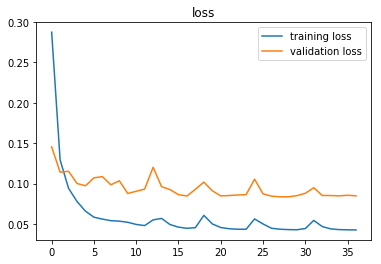

Plotting metrics...


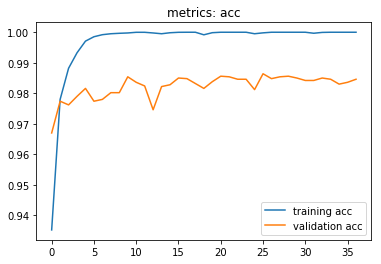

train {'acc': 0.99994546}
test {'acc': 0.9842}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10301472948501352667
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 3292248212391355895
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.4838078 , acc = 0.3 
Epoch 1 , step 100 , loss= 0.3706473 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.22807717 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.21680261 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.16853216 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.12285854 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.16399756 val_loss= 0.18185404 , acc = 0.98 val acc = 0.9662 
Epoch 1 finished, loss= 0.30997708 val loss= 0.18185404 ,  acc = 0.9375818 val acc = 0.9662
val_acc im

Epoch 17 , step 200 , loss= 0.11003874 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.054614313 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.09854126 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.08955189 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.111330554 val_loss= 0.11749658 , acc = 1.0 val acc = 0.9848 
Epoch 17 finished, loss= 0.08623369 val loss= 0.11749658 ,  acc = 0.9998909 val acc = 0.9848

Epoch 18 , step 50 , loss= 0.09147927 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.07433946 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.05718069 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.078540884 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.11174307 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.073242985 val_loss= 0.12154781 , acc = 1.0 val acc = 0.9832 
Epoch 18 finished, loss= 0.08464588 val loss= 0.12154781 ,  acc = 1.0 val acc = 0.9832

Epoch 19 , step 0 , loss= 0.076388896 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.10887262 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.09996545 , acc = 1.0 
Epoch 19 , s

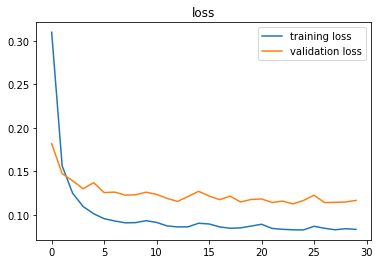

Plotting metrics...


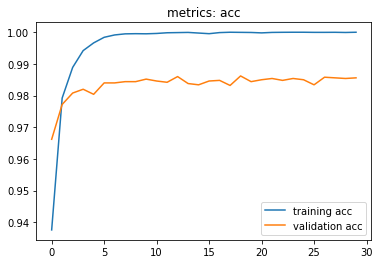

train {'acc': 0.9994909}
test {'acc': 0.9825}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14590552138930690690
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 2234684069455909010
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.5673661 , acc = 0.23 
Epoch 1 , step 100 , loss= 0.32722923 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.2599189 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.25405893 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.31989878 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.2868379 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.2873745 val_loss= 0.20243266 , acc = 0.96 val acc = 0.9682 
Epoch 1 finished, loss= 0.33244473 val loss= 0.20243266 ,  acc = 0.9373454 val acc = 0.9682
val_acc i

Epoch 17 , step 200 , loss= 0.10928338 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.07927866 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.13834816 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.11950903 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.14582697 val_loss= 0.147264 , acc = 1.0 val acc = 0.9838 
Epoch 17 finished, loss= 0.12275102 val loss= 0.147264 ,  acc = 0.99941814 val acc = 0.9838

Epoch 18 , step 50 , loss= 0.14279422 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.12504664 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.11980694 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.18217412 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.05250369 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.13319725 val_loss= 0.14786519 , acc = 1.0 val acc = 0.9858 
Epoch 18 finished, loss= 0.12320025 val loss= 0.14786519 ,  acc = 0.99945456 val acc = 0.9858
val_acc improved. 
Epoch 19 , step 0 , loss= 0.077737354 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.1274627 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.081136085 , acc 

Epoch 34 , step 549 , loss= 0.12728542 val_loss= 0.14376971 , acc = 1.0 val acc = 0.9862 
Epoch 34 finished, loss= 0.11930177 val loss= 0.14376971 ,  acc = 0.99972725 val acc = 0.9862

Epoch 35 , step 0 , loss= 0.13191439 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.11288333 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.08786084 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.124571726 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.15881582 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.09643167 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.12793131 val_loss= 0.14366822 , acc = 1.0 val acc = 0.9856 
Epoch 35 finished, loss= 0.11941947 val loss= 0.14366822 ,  acc = 0.9997636 val acc = 0.9856

Epoch 36 , step 50 , loss= 0.092760436 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.14640863 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.1521102 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.15789923 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.15895553 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.116813526 val_loss= 0.14328825 

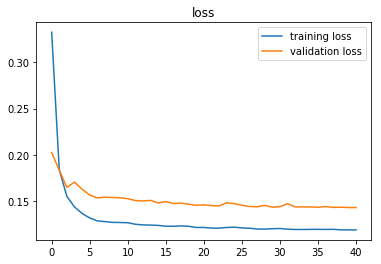

Plotting metrics...


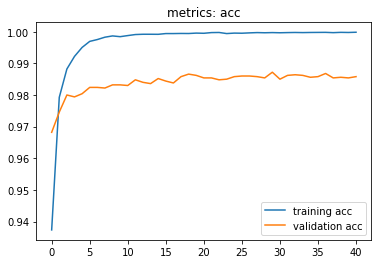

train {'acc': 0.9995273}
test {'acc': 0.9825}

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13401309248007411506
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 880829916222460325
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.4006379 , acc = 0.42 
Epoch 1 , step 100 , loss= 0.3204475 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.25787646 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.2913106 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.2025271 , acc = 1.0 
Epoch 1 , step 500 , loss= 0.18786213 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.15121302 val_loss= 0.23246211 , acc = 0.98 val acc = 0.966 
Epoch 1 finished, loss= 0.35033324 val loss= 0.23246211 ,  acc = 0.9376364 val acc = 0.966
val_acc improve

Epoch 17 , step 200 , loss= 0.15004987 , acc = 0.99 
Epoch 17 , step 300 , loss= 0.1293433 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.1879521 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.18436532 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.16912001 val_loss= 0.17709826 , acc = 0.99 val acc = 0.9814 
Epoch 17 finished, loss= 0.15680082 val loss= 0.17709826 ,  acc = 0.99461824 val acc = 0.9814

Epoch 18 , step 50 , loss= 0.104566306 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.14735451 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.15461344 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.12702122 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.16619892 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.17552929 val_loss= 0.17464261 , acc = 0.99 val acc = 0.9824 
Epoch 18 finished, loss= 0.15678889 val loss= 0.17464261 ,  acc = 0.9948908 val acc = 0.9824

Epoch 19 , step 0 , loss= 0.20401241 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.12695901 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.11671081 , acc = 1.0 
Epoch 

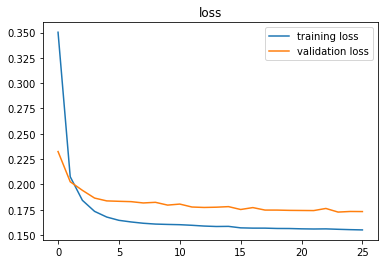

Plotting metrics...


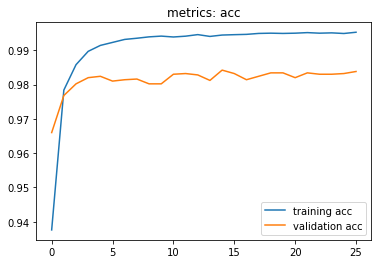

train {'acc': 0.9942727}
test {'acc': 0.9812}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7754686401226741070
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 9231341822713898412
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.907101 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.1912157 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.119233124 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.14929132 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.15047291 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.12219769 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.14348474 val_loss= 0.11215553 , acc = 0.95 val acc = 0.9696 
Epoch 1 finished, loss= 0.23994868 val loss= 0.11215553 ,  acc = 0.9373273 val acc = 0.9696
val_acc im

Epoch 17 , step 100 , loss= 0.00011778057 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.023286454 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0008386868 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0042349217 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.022451997 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.005885173 val_loss= 0.09669699 , acc = 1.0 val acc = 0.98 
Epoch 17 finished, loss= 0.010332073 val loss= 0.09669699 ,  acc = 0.99958175 val acc = 0.98

Epoch 18 , step 50 , loss= 0.007510652 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.000526022 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.02658509 , acc = 1.0 
Epoch 18 , step 350 , loss= 7.495782e-05 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.015541306 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0022396469 val_loss= 0.09914558 , acc = 1.0 val acc = 0.982 
Epoch 18 finished, loss= 0.010731003 val loss= 0.09914558 ,  acc = 0.9994728 val acc = 0.982

Epoch 19 , step 0 , loss= 0.0047556506 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.00045697004 , acc

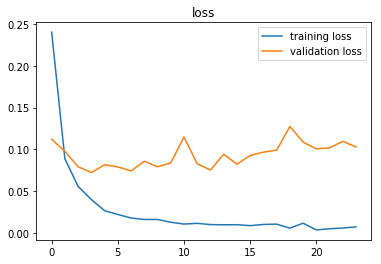

Plotting metrics...


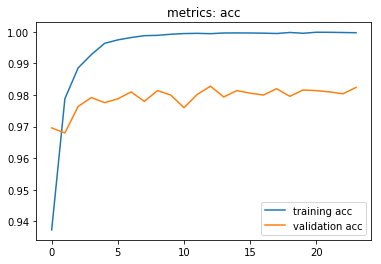

train {'acc': 0.9974727}
test {'acc': 0.9801}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6961333123856845346
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 7957747743632014760
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.9113622 , acc = 0.19 
Epoch 1 , step 100 , loss= 0.4994068 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.24458295 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.29598433 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.37572497 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.3336261 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.36400142 val_loss= 0.26938778 , acc = 0.94 val acc = 0.9628 
Epoch 1 finished, loss= 0.41297212 val loss= 0.26938778 ,  acc = 0.9331818 val acc = 0.9628
val_acc i

Epoch 17 , step 400 , loss= 0.13246165 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.12355879 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.11419092 val_loss= 0.18112937 , acc = 1.0 val acc = 0.984 
Epoch 17 finished, loss= 0.13563347 val loss= 0.18112937 ,  acc = 1.0 val acc = 0.984
val_acc improved. 
Epoch 18 , step 50 , loss= 0.17119521 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.10348712 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.17922524 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.14637391 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.12280606 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.12544799 val_loss= 0.179381 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 0.13515359 val loss= 0.179381 ,  acc = 1.0 val acc = 0.9838

Epoch 19 , step 0 , loss= 0.088550106 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.14588103 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.1718696 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.12322417 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.13913724 , acc = 1.0 
Epoch 19 , 

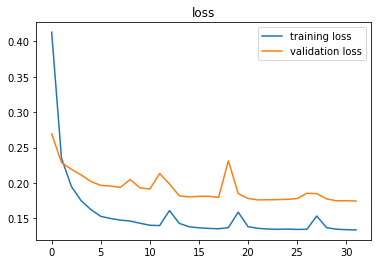

Plotting metrics...


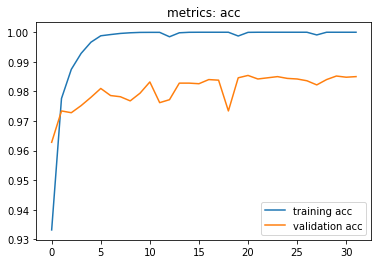

train {'acc': 1.0}
test {'acc': 0.9839}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4935279560045047188
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6324093592755722160
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.516625 , acc = 0.34 
Epoch 1 , step 100 , loss= 0.53315413 , acc = 0.9 
Epoch 1 , step 200 , loss= 0.57055974 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.3276129 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.5281565 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.3568341 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.3521313 val_loss= 0.36969903 , acc = 0.99 val acc = 0.9644 
Epoch 1 finished, loss= 0.5262956 val loss= 0.36969903 ,  acc = 0.93394554 val acc = 0.9644
val_acc improved. 
Ep

Epoch 17 , step 300 , loss= 0.28642026 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.3008073 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.26471135 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.2518865 val_loss= 0.29344118 , acc = 1.0 val acc = 0.9844 
Epoch 17 finished, loss= 0.26589257 val loss= 0.29344118 ,  acc = 1.0 val acc = 0.9844

Epoch 18 , step 50 , loss= 0.2839628 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.20179453 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.29132405 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.2376473 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.19593349 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.30074304 val_loss= 0.2925307 , acc = 1.0 val acc = 0.9842 
Epoch 18 finished, loss= 0.26545593 val loss= 0.2925307 ,  acc = 1.0 val acc = 0.9842

Epoch 19 , step 0 , loss= 0.21372256 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.22002998 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.249293 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.2517121 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.29

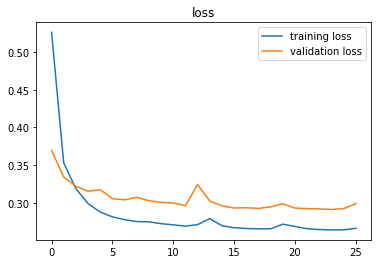

Plotting metrics...


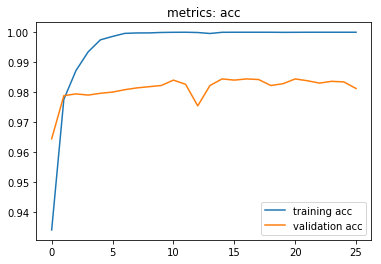

train {'acc': 0.9982909}
test {'acc': 0.9803}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17252559853413951731
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 250567888516138678
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6056085 , acc = 0.22 
Epoch 1 , step 100 , loss= 0.6366943 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.51903224 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.5766632 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.5181413 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.4765651 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.39528987 val_loss= 0.47369793 , acc = 0.99 val acc = 0.9676 
Epoch 1 finished, loss= 0.62547153 val loss= 0.47369793 ,  acc = 0.9316909 val acc = 0.9676
val_acc imp

Epoch 17 , step 400 , loss= 0.29741392 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.27682889 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.35683364 val_loss= 0.40781894 , acc = 1.0 val acc = 0.9838 
Epoch 17 finished, loss= 0.3969796 val loss= 0.40781894 ,  acc = 0.9999636 val acc = 0.9838

Epoch 18 , step 50 , loss= 0.3688093 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.37363657 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.3812968 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.41533682 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.3180132 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.43488073 val_loss= 0.4093249 , acc = 1.0 val acc = 0.9822 
Epoch 18 finished, loss= 0.3955281 val loss= 0.4093249 ,  acc = 1.0 val acc = 0.9822

Epoch 19 , step 0 , loss= 0.4178017 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.371113 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.3741146 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.38092786 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.38293704 , acc = 1.0 
Epoch 19 , step 500 , loss= 

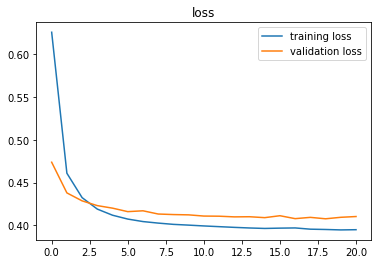

Plotting metrics...


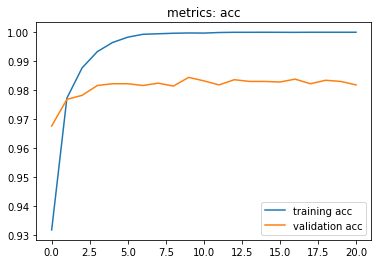

train {'acc': 0.9998364}
test {'acc': 0.982}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 819183133763400145
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 3286270473336435495
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3445997 , acc = 0.19 
Epoch 1 , step 100 , loss= 0.72776866 , acc = 0.9 
Epoch 1 , step 200 , loss= 0.7249639 , acc = 0.94 
Epoch 1 , step 300 , loss= 0.65759856 , acc = 0.93 
Epoch 1 , step 400 , loss= 0.49108163 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.57159257 , acc = 0.95 
Epoch 1 , step 549 , loss= 0.5965559 val_loss= 0.5676555 , acc = 0.94 val acc = 0.9672 
Epoch 1 finished, loss= 0.6960015 val loss= 0.5676555 ,  acc = 0.9290182 val acc = 0.9672
val_acc improved.

Epoch 17 , step 300 , loss= 0.5957148 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.59302586 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.52047306 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.484972 val_loss= 0.5228914 , acc = 1.0 val acc = 0.982 
Epoch 17 finished, loss= 0.52308184 val loss= 0.5228914 ,  acc = 0.9936182 val acc = 0.982

Epoch 18 , step 50 , loss= 0.38332558 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.50075865 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.49119022 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.60616696 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.5545215 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.5579822 val_loss= 0.5221062 , acc = 0.99 val acc = 0.983 
Epoch 18 finished, loss= 0.52298695 val loss= 0.5221062 ,  acc = 0.99383634 val acc = 0.983
val_acc improved. 
Epoch 19 , step 0 , loss= 0.5182857 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.49196377 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.5840833 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.58523935 , acc = 1.0 
Epoc

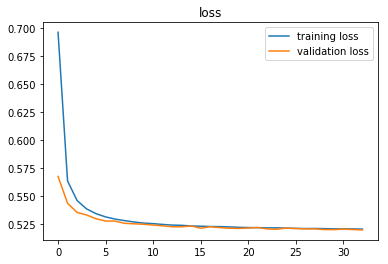

Plotting metrics...


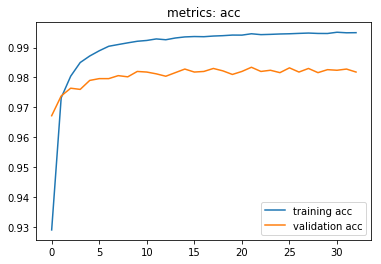

train {'acc': 0.9948}
test {'acc': 0.9804}

Training student with temperature = 6 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2939990345920428105
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 5485123669551919092
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.5478005 , acc = 0.38 
Epoch 1 , step 100 , loss= 0.19079979 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.13886239 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.18631937 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.14192635 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.1553055 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.13611387 val_loss= 0.12480774 , acc = 0.96 val acc = 0.963 
Epoch 1 finished, loss= 0.23951888 val loss= 0.12480774 ,  acc = 0.93869084 val acc = 0.963
val_acc improv

Epoch 17 , step 100 , loss= 0.011236454 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0013709463 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0015077617 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0075959163 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0009473245 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0020151224 val_loss= 0.095708035 , acc = 1.0 val acc = 0.981 
Epoch 17 finished, loss= 0.008475184 val loss= 0.095708035 ,  acc = 0.99967265 val acc = 0.981

Epoch 18 , step 50 , loss= 0.0059391274 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.011841432 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00039421805 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0019343707 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0027231646 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00045692016 val_loss= 0.10787635 , acc = 1.0 val acc = 0.979 
Epoch 18 finished, loss= 0.009155839 val loss= 0.10787635 ,  acc = 0.99959993 val acc = 0.979

Epoch 19 , step 0 , loss= 0.061062425 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.000280

Epoch 34 , step 50 , loss= 0.0158388 , acc = 1.0 
Epoch 34 , step 150 , loss= 8.9686044e-05 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.0004033179 , acc = 1.0 
Epoch 34 , step 350 , loss= 0.001377493 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.026313867 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.00064564415 val_loss= 0.105105326 , acc = 1.0 val acc = 0.984 
Epoch 34 finished, loss= 0.00551755 val loss= 0.105105326 ,  acc = 0.9998 val acc = 0.984
val_acc improved. 
Epoch 35 , step 0 , loss= 0.0013967478 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.0014209744 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.00031737678 , acc = 1.0 
Epoch 35 , step 300 , loss= 1.8703615e-05 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.004081703 , acc = 1.0 
Epoch 35 , step 500 , loss= 4.5379215e-06 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.00012642918 val_loss= 0.11833044 , acc = 1.0 val acc = 0.9822 
Epoch 35 finished, loss= 0.0021759765 val loss= 0.11833044 ,  acc = 0.9999454 val acc = 0.9822

Epoch 36 , step 50 ,

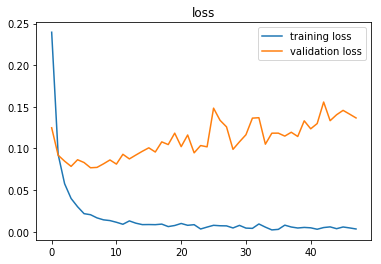

Plotting metrics...


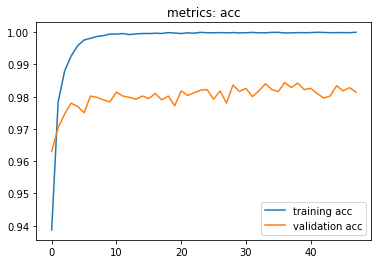

train {'acc': 0.99898183}
test {'acc': 0.9824}

Training student with temperature = 6 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12659345811591351097
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 9637801505542801838
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6134052 , acc = 0.3 
Epoch 1 , step 100 , loss= 0.6379807 , acc = 0.91 
Epoch 1 , step 200 , loss= 0.5054429 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.5366838 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.41895413 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.33574247 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.35085553 val_loss= 0.3597114 , acc = 0.97 val acc = 0.965 
Epoch 1 finished, loss= 0.50686055 val loss= 0.3597114 ,  acc = 0.9368182 val acc = 0.965
val_acc impro

Epoch 17 , step 400 , loss= 0.24110489 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.21011807 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.23681678 val_loss= 0.27015576 , acc = 1.0 val acc = 0.9846 
Epoch 17 finished, loss= 0.23101218 val loss= 0.27015576 ,  acc = 1.0 val acc = 0.9846
val_acc improved. 
Epoch 18 , step 50 , loss= 0.2287537 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.23303288 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.21905038 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.22438346 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.21067464 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.23318821 val_loss= 0.2704222 , acc = 1.0 val acc = 0.985 
Epoch 18 finished, loss= 0.23058139 val loss= 0.2704222 ,  acc = 1.0 val acc = 0.985
val_acc improved. 
Epoch 19 , step 0 , loss= 0.23222515 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.22994253 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.1947233 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.23343998 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.20690177 , acc 

Epoch 35 , step 100 , loss= 0.21949005 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.21749024 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.23782383 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.23374523 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.22871391 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.20368566 val_loss= 0.26656604 , acc = 1.0 val acc = 0.986 
Epoch 35 finished, loss= 0.22854815 val loss= 0.26656604 ,  acc = 1.0 val acc = 0.986

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.25, 'coef_hardloss': 0.75, 'temperature': 6, 'temperature_effect': 1, 'train_acc': 1.0, 'test_acc': 0.9839}
Plotting loss...


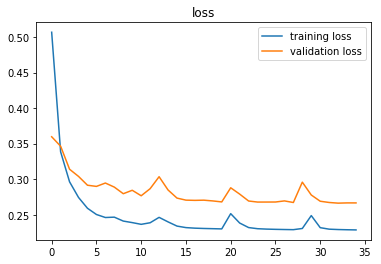

Plotting metrics...


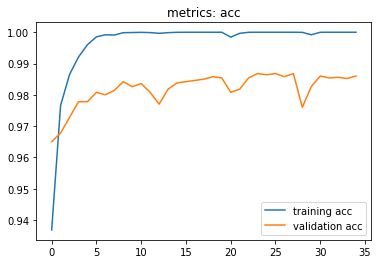

train {'acc': 1.0}
test {'acc': 0.9839}

Training student with temperature = 6 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14360091369939557590
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 2207401297859777154
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6184945 , acc = 0.33 
Epoch 1 , step 100 , loss= 0.77406764 , acc = 0.89 
Epoch 1 , step 200 , loss= 0.66917235 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.74282354 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.7141485 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.54864 , acc = 0.95 
Epoch 1 , step 549 , loss= 0.63237363 val_loss= 0.57076705 , acc = 0.94 val acc = 0.9612 
Epoch 1 finished, loss= 0.72497225 val loss= 0.57076705 ,  acc = 0.9316909 val acc = 0.9612
val_acc improved. 

Epoch 17 , step 500 , loss= 0.43218276 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.49254447 val_loss= 0.48056418 , acc = 1.0 val acc = 0.9864 
Epoch 17 finished, loss= 0.45783308 val loss= 0.48056418 ,  acc = 1.0 val acc = 0.9864
val_acc improved. 
Epoch 18 , step 50 , loss= 0.5315076 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.4983174 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.5007791 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.50782555 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.44076085 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.45535022 val_loss= 0.48088256 , acc = 1.0 val acc = 0.9846 
Epoch 18 finished, loss= 0.4567975 val loss= 0.48088256 ,  acc = 1.0 val acc = 0.9846

Epoch 19 , step 0 , loss= 0.45993882 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.46434164 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.5066613 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.41092345 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.48881352 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.47829312 , acc = 1.0 
Epoch 19 ,

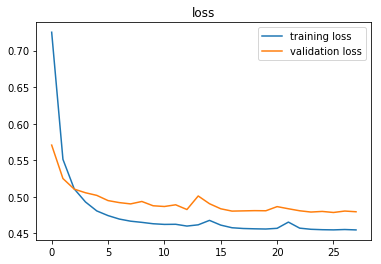

Plotting metrics...


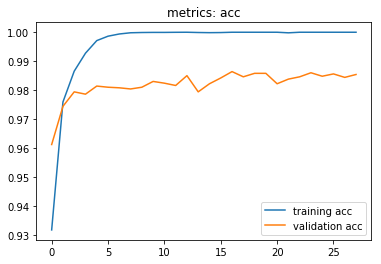

train {'acc': 1.0}
test {'acc': 0.9837}

Training student with temperature = 6 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15575968157568955419
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11093043417013428522
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.4018772 , acc = 0.22 
Epoch 1 , step 100 , loss= 1.0516117 , acc = 0.9 
Epoch 1 , step 200 , loss= 0.8014789 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.83550966 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.73732835 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.9068695 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.6703776 val_loss= 0.7553409 , acc = 0.98 val acc = 0.9642 
Epoch 1 finished, loss= 0.90097636 val loss= 0.7553409 ,  acc = 0.9307454 val acc = 0.9642
val_acc improved. 

Epoch 17 , step 500 , loss= 0.77772117 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.69065917 val_loss= 0.6868329 , acc = 1.0 val acc = 0.9826 
Epoch 17 finished, loss= 0.6825932 val loss= 0.6868329 ,  acc = 1.0 val acc = 0.9826

Epoch 18 , step 50 , loss= 0.65749943 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.6583259 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.6600788 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.6729812 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.65670747 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.74596727 val_loss= 0.6871433 , acc = 1.0 val acc = 0.9828 
Epoch 18 finished, loss= 0.6823177 val loss= 0.6871433 ,  acc = 1.0 val acc = 0.9828

Epoch 19 , step 0 , loss= 0.62388545 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.6581112 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.7329464 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.69801205 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.6815455 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.74101764 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.65925

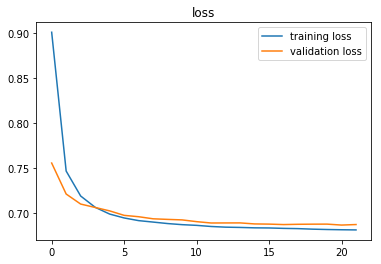

Plotting metrics...


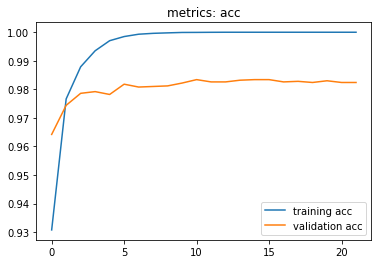

train {'acc': 0.9999273}
test {'acc': 0.9805}

Training student with temperature = 6 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16018202577743544258
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 13378513830246458080
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2952852 , acc = 0.21 
Epoch 1 , step 100 , loss= 1.1363057 , acc = 0.89 
Epoch 1 , step 200 , loss= 1.008926 , acc = 0.93 
Epoch 1 , step 300 , loss= 1.0502828 , acc = 0.93 
Epoch 1 , step 400 , loss= 0.9551383 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.97787535 , acc = 1.0 
Epoch 1 , step 549 , loss= 1.0316005 val_loss= 0.930097 , acc = 0.98 val acc = 0.963 
Epoch 1 finished, loss= 1.0503087 val loss= 0.930097 ,  acc = 0.9219454 val acc = 0.963
val_acc improved. 
Ep

Epoch 17 , step 400 , loss= 0.9235086 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.8694861 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.8474766 val_loss= 0.8931254 , acc = 1.0 val acc = 0.9812 
Epoch 17 finished, loss= 0.9061401 val loss= 0.8931254 ,  acc = 0.9924182 val acc = 0.9812

Epoch 18 , step 50 , loss= 0.87619364 , acc = 0.98 
Epoch 18 , step 150 , loss= 0.8519223 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.9331624 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.8494421 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.9254941 , acc = 0.98 
Epoch 18 , step 549 , loss= 0.87377363 val_loss= 0.89252186 , acc = 1.0 val acc = 0.9804 
Epoch 18 finished, loss= 0.90580994 val loss= 0.89252186 ,  acc = 0.9925818 val acc = 0.9804

Epoch 19 , step 0 , loss= 1.0539073 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.9247123 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.9719835 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.86881554 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.8306456 , acc = 0.98 
Epoch 19 , step 500 ,

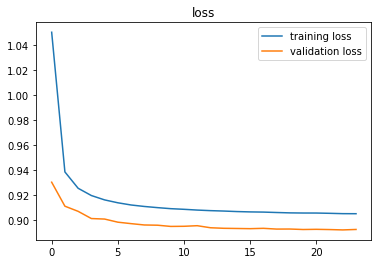

Plotting metrics...


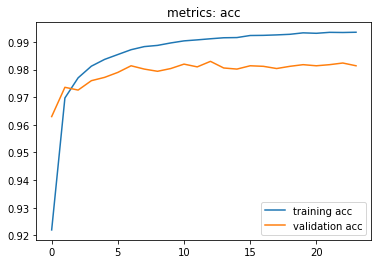

train {'acc': 0.9933818}
test {'acc': 0.9788}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16417596420890748897
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11648464451313062479
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.7044418 , acc = 0.36 
Epoch 1 , step 100 , loss= 0.15864511 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.11640211 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.15309267 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.13902669 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.13207859 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.11901239 val_loss= 0.11637475 , acc = 0.95 val acc = 0.965 
Epoch 1 finished, loss= 0.23747692 val loss= 0.11637475 ,  acc = 0.93883634 val acc = 0.965
val_acc 

Epoch 17 , step 100 , loss= 0.10777842 , acc = 0.99 
Epoch 17 , step 200 , loss= 0.000593915 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0013510892 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0019951072 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0023070588 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0004473746 val_loss= 0.090697825 , acc = 1.0 val acc = 0.982 
Epoch 17 finished, loss= 0.007545594 val loss= 0.090697825 ,  acc = 0.99978185 val acc = 0.982

Epoch 18 , step 50 , loss= 0.0021412456 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.002526391 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.007855548 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.000105629115 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.07606003 , acc = 0.99 
Epoch 18 , step 549 , loss= 0.073489465 val_loss= 0.0970743 , acc = 0.99 val acc = 0.9796 
Epoch 18 finished, loss= 0.012140857 val loss= 0.0970743 ,  acc = 0.9994727 val acc = 0.9796

Epoch 19 , step 0 , loss= 0.07474062 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.00044615217

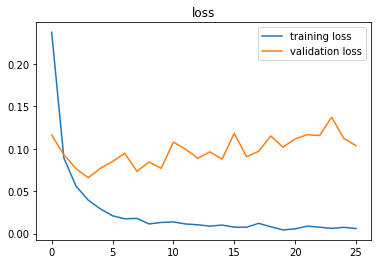

Plotting metrics...


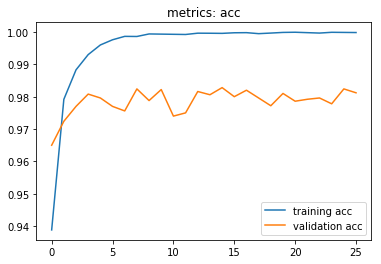

train {'acc': 0.9987818}
test {'acc': 0.9813}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17105332754255141583
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 13017234566126089649
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.5729644 , acc = 0.36 
Epoch 1 , step 100 , loss= 0.572434 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.6989033 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.522972 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.46724808 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.5412607 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.36641952 val_loss= 0.45944965 , acc = 0.99 val acc = 0.9598 
Epoch 1 finished, loss= 0.58915395 val loss= 0.45944965 ,  acc = 0.93449086 val acc = 0.9598
val_acc im

Epoch 17 , step 400 , loss= 0.3144042 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.32019708 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.32752421 val_loss= 0.3485597 , acc = 1.0 val acc = 0.9848 
Epoch 17 finished, loss= 0.31069398 val loss= 0.3485597 ,  acc = 1.0 val acc = 0.9848

Epoch 18 , step 50 , loss= 0.3104054 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.30980772 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.32616904 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.31735638 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.29595634 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.30164284 val_loss= 0.3492207 , acc = 1.0 val acc = 0.9846 
Epoch 18 finished, loss= 0.3102193 val loss= 0.3492207 ,  acc = 1.0 val acc = 0.9846

Epoch 19 , step 0 , loss= 0.29921862 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.29588503 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.2928541 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.30603242 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.30796593 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.3

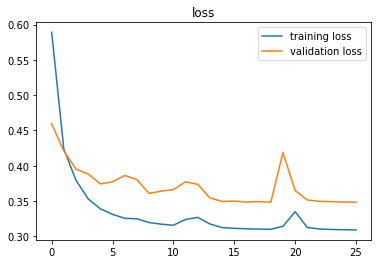

Plotting metrics...


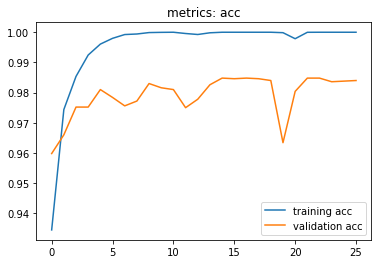

train {'acc': 0.9999818}
test {'acc': 0.9849}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7864928564081419369
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11163262796209920125
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.49266 , acc = 0.32 
Epoch 1 , step 100 , loss= 0.91857266 , acc = 0.91 
Epoch 1 , step 200 , loss= 0.763271 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.8031892 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.83034265 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.7367145 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.7989798 val_loss= 0.7220585 , acc = 0.96 val acc = 0.9656 
Epoch 1 finished, loss= 0.8755125 val loss= 0.7220585 ,  acc = 0.9325637 val acc = 0.9656
val_acc improved. 

Epoch 17 , step 500 , loss= 0.6189936 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.6047782 val_loss= 0.6368773 , acc = 1.0 val acc = 0.9848 
Epoch 17 finished, loss= 0.6167868 val loss= 0.6368773 ,  acc = 1.0 val acc = 0.9848

Epoch 18 , step 50 , loss= 0.63064575 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.66422385 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.64529186 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.58934104 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.5749146 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.6361368 val_loss= 0.6368603 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 0.6163146 val loss= 0.6368603 ,  acc = 1.0 val acc = 0.9838

Epoch 19 , step 0 , loss= 0.63125616 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.62549794 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.60196817 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.629682 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.6194793 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.6598381 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.6005266

Epoch 35 , step 400 , loss= 0.5989989 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.5672272 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.5907471 val_loss= 0.6359719 , acc = 1.0 val acc = 0.9858 
Epoch 35 finished, loss= 0.61386794 val loss= 0.6359719 ,  acc = 1.0 val acc = 0.9858

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.5, 'coef_hardloss': 0.5, 'temperature': 8, 'temperature_effect': 1, 'train_acc': 1.0, 'test_acc': 0.9844}
Plotting loss...


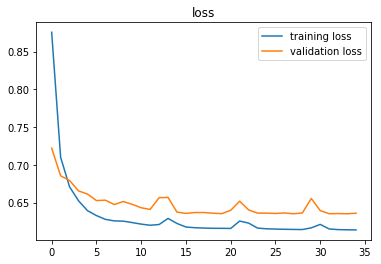

Plotting metrics...


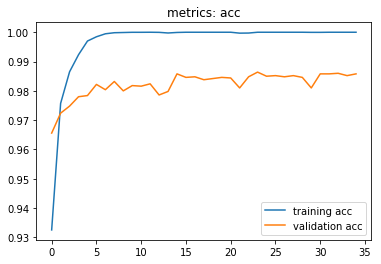

train {'acc': 1.0}
test {'acc': 0.9844}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2362320284447852155
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6088562595114857222
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.5825405 , acc = 0.21 
Epoch 1 , step 100 , loss= 1.1452153 , acc = 0.96 
Epoch 1 , step 200 , loss= 1.3200885 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.9240954 , acc = 0.92 
Epoch 1 , step 400 , loss= 1.0536485 , acc = 0.9 
Epoch 1 , step 500 , loss= 1.0514771 , acc = 0.91 
Epoch 1 , step 549 , loss= 1.0835258 val_loss= 0.9927384 , acc = 0.93 val acc = 0.966 
Epoch 1 finished, loss= 1.1384708 val loss= 0.9927384 ,  acc = 0.9253273 val acc = 0.966
val_acc improved. 
Epoch 

Epoch 18 , step 50 , loss= 0.8624343 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.0286465 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.8430768 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.95602494 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.8892223 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.0021576 val_loss= 0.9244781 , acc = 1.0 val acc = 0.9848 
Epoch 18 finished, loss= 0.92179126 val loss= 0.9244781 ,  acc = 1.0 val acc = 0.9848

Epoch 19 , step 0 , loss= 0.96709275 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.9165543 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.9459929 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.8708674 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.95050156 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.95069015 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.8502636 val_loss= 0.9232036 , acc = 1.0 val acc = 0.985 
Epoch 19 finished, loss= 0.9214686 val loss= 0.9232036 ,  acc = 1.0 val acc = 0.985
val_acc improved. 
Epoch 20 , step 50 , loss= 0.8693532 , acc = 1.0 
Epoch 20 , step 150 , l

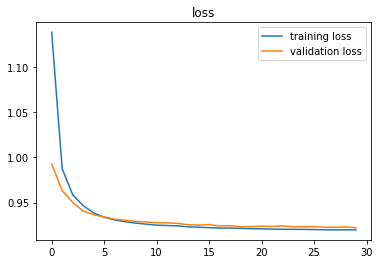

Plotting metrics...


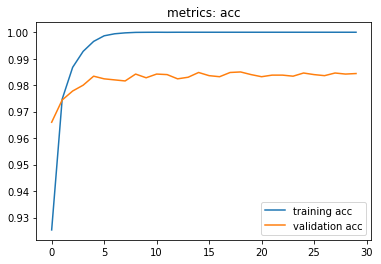

train {'acc': 1.0}
test {'acc': 0.9811}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17258801898279520226
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 13867845063545560604
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3237834 , acc = 0.28 
Epoch 1 , step 100 , loss= 1.4470568 , acc = 0.89 
Epoch 1 , step 200 , loss= 1.2660202 , acc = 0.96 
Epoch 1 , step 300 , loss= 1.2543648 , acc = 0.96 
Epoch 1 , step 400 , loss= 1.2597471 , acc = 0.95 
Epoch 1 , step 500 , loss= 1.2261404 , acc = 0.97 
Epoch 1 , step 549 , loss= 1.426109 val_loss= 1.2401223 , acc = 0.96 val acc = 0.9604 
Epoch 1 finished, loss= 1.3400007 val loss= 1.2401223 ,  acc = 0.9162908 val acc = 0.9604
val_acc improved. 
Epoc

Epoch 17 , step 500 , loss= 1.2624203 , acc = 1.0 
Epoch 17 , step 549 , loss= 1.3207927 val_loss= 1.2097762 , acc = 1.0 val acc = 0.9784 
Epoch 17 finished, loss= 1.2257435 val loss= 1.2097762 ,  acc = 0.99130905 val acc = 0.9784

Epoch 18 , step 50 , loss= 1.3252516 , acc = 0.97 
Epoch 18 , step 150 , loss= 1.1791561 , acc = 0.98 
Epoch 18 , step 250 , loss= 1.1761339 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.1275271 , acc = 0.99 
Epoch 18 , step 450 , loss= 1.1268247 , acc = 0.98 
Epoch 18 , step 549 , loss= 1.2462715 val_loss= 1.2096754 , acc = 0.99 val acc = 0.9804 
Epoch 18 finished, loss= 1.2255814 val loss= 1.2096754 ,  acc = 0.99192715 val acc = 0.9804
val_acc improved. 
Epoch 19 , step 0 , loss= 1.2371354 , acc = 0.99 
Epoch 19 , step 100 , loss= 1.1790136 , acc = 0.99 
Epoch 19 , step 200 , loss= 1.1549532 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.2674894 , acc = 0.99 
Epoch 19 , step 400 , loss= 1.258342 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.1682168 , acc = 1.0 
Epoc

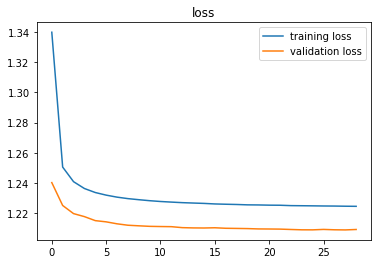

Plotting metrics...


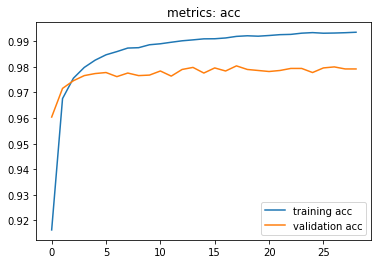

train {'acc': 0.9935273}
test {'acc': 0.9789}

Training student with temperature = 10 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3116054677240826641
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11057915999219077119
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.5471532 , acc = 0.35 
Epoch 1 , step 100 , loss= 0.227309 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.16902384 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.139954 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.15029645 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.13536935 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.12020945 val_loss= 0.11451138 , acc = 0.96 val acc = 0.966 
Epoch 1 finished, loss= 0.23533225 val loss= 0.11451138 ,  acc = 0.93892735 val acc = 0.966
val_acc impr

Epoch 17 , step 100 , loss= 0.001361417 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0025241813 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0014820747 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.013920719 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0017546172 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0014144 val_loss= 0.0853171 , acc = 1.0 val acc = 0.9828 
Epoch 17 finished, loss= 0.008542613 val loss= 0.0853171 ,  acc = 0.999709 val acc = 0.9828

Epoch 18 , step 50 , loss= 0.00023144757 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.008986866 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00049395056 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.00037141118 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.00025343717 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.000998472 val_loss= 0.107750416 , acc = 1.0 val acc = 0.9808 
Epoch 18 finished, loss= 0.0054697213 val loss= 0.107750416 ,  acc = 0.9998181 val acc = 0.9808

Epoch 19 , step 0 , loss= 0.012579668 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.000261610

Student performance with {'coef_softloss': 0.0, 'coef_hardloss': 1.0, 'temperature': 10, 'temperature_effect': 1, 'train_acc': 0.9990182, 'test_acc': 0.9806}
Plotting loss...


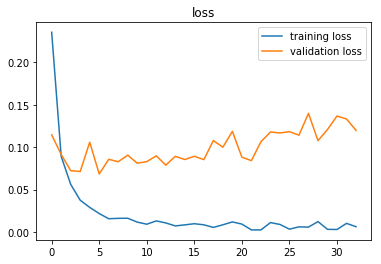

Plotting metrics...


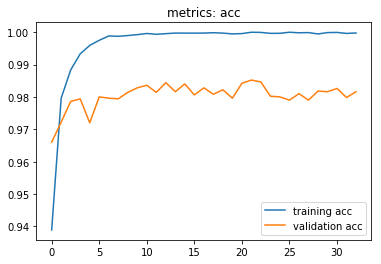

train {'acc': 0.9990182}
test {'acc': 0.9806}

Training student with temperature = 10 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16638228300875778045
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 85877104911802167
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6371105 , acc = 0.3 
Epoch 1 , step 100 , loss= 0.5650379 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.6696313 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.625044 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.47871712 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.42584154 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.5844338 val_loss= 0.53260994 , acc = 0.93 val acc = 0.958 
Epoch 1 finished, loss= 0.6377431 val loss= 0.53260994 ,  acc = 0.9343455 val acc = 0.958
val_acc improved. 

Epoch 17 , step 300 , loss= 0.38118294 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.37247834 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.3456806 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.37182698 val_loss= 0.4137619 , acc = 1.0 val acc = 0.986 
Epoch 17 finished, loss= 0.37306798 val loss= 0.4137619 ,  acc = 0.9999818 val acc = 0.986
val_acc improved. 
Epoch 18 , step 50 , loss= 0.37429482 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.34778154 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.38885328 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.39257547 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.3626124 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.38570276 val_loss= 0.41410342 , acc = 1.0 val acc = 0.9852 
Epoch 18 finished, loss= 0.3721041 val loss= 0.41410342 ,  acc = 1.0 val acc = 0.9852

Epoch 19 , step 0 , loss= 0.37602505 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.3628762 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.35224548 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.36361387 , acc = 1.0 
Epoch 1

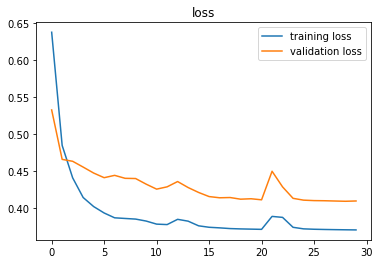

Plotting metrics...


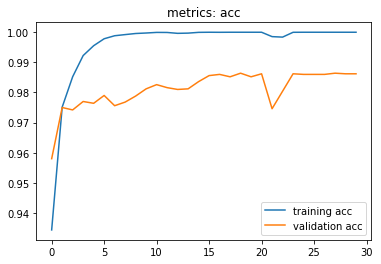

train {'acc': 1.0}
test {'acc': 0.9842}

Training student with temperature = 10 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5945424698437709490
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 3280420200126753751
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.5682335 , acc = 0.26 
Epoch 1 , step 100 , loss= 1.0763595 , acc = 0.89 
Epoch 1 , step 200 , loss= 0.9737034 , acc = 0.93 
Epoch 1 , step 300 , loss= 1.0223672 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.8606301 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.86070114 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.8642147 val_loss= 0.84974927 , acc = 0.96 val acc = 0.9638 
Epoch 1 finished, loss= 0.99058926 val loss= 0.84974927 ,  acc = 0.93072724 val acc = 0.9638
val_acc improved. 

Epoch 17 , step 500 , loss= 0.71995485 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.82827294 val_loss= 0.7904734 , acc = 0.98 val acc = 0.9776 
Epoch 17 finished, loss= 0.7491997 val loss= 0.7904734 ,  acc = 0.99956363 val acc = 0.9776

Epoch 18 , step 50 , loss= 0.7262969 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.7630709 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.66996557 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.7007878 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.6809542 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.7503604 val_loss= 0.7665408 , acc = 1.0 val acc = 0.9832 
Epoch 18 finished, loss= 0.7521948 val loss= 0.7665408 ,  acc = 0.99901813 val acc = 0.9832

Epoch 19 , step 0 , loss= 0.79307806 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.75620276 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.664 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.64785516 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.7028495 , acc = 1.0 
Epoch 19 , step 500 , loss= 0.7375258 , acc = 1.0 
Epoch 19 , step 549 , loss

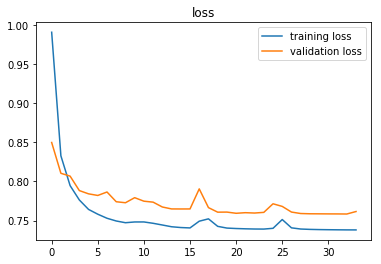

Plotting metrics...


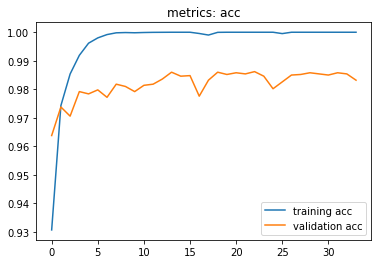

train {'acc': 0.9999091}
test {'acc': 0.9835}

Training student with temperature = 10 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10766179473955403489
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 9855242968394776989
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.4198215 , acc = 0.37 
Epoch 1 , step 100 , loss= 1.3200825 , acc = 0.92 
Epoch 1 , step 200 , loss= 1.2265878 , acc = 0.98 
Epoch 1 , step 300 , loss= 1.3222557 , acc = 0.97 
Epoch 1 , step 400 , loss= 1.1172371 , acc = 0.98 
Epoch 1 , step 500 , loss= 1.2822337 , acc = 0.96 
Epoch 1 , step 549 , loss= 1.274945 val_loss= 1.1770034 , acc = 0.94 val acc = 0.96 
Epoch 1 finished, loss= 1.3001194 val loss= 1.1770034 ,  acc = 0.9306 val acc = 0.96
val_acc improved. 
Epo

Epoch 17 finished, loss= 1.1079614 val loss= 1.1114804 ,  acc = 0.9999818 val acc = 0.983

Epoch 18 , step 50 , loss= 1.0679665 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.1348492 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.0516716 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.0371872 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.0790743 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.125632 val_loss= 1.1105951 , acc = 1.0 val acc = 0.9836 
Epoch 18 finished, loss= 1.1073126 val loss= 1.1105951 ,  acc = 1.0 val acc = 0.9836
val_acc improved. 
Epoch 19 , step 0 , loss= 1.14297 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.1149398 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.1473392 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.0974699 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.0921959 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.1415732 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.1915622 val_loss= 1.1130979 , acc = 1.0 val acc = 0.9816 
Epoch 19 finished, loss= 1.1074854 val loss= 1.1130979 ,  acc = 1.0 val ac

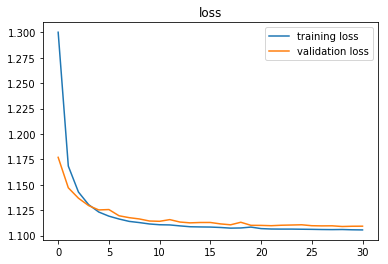

Plotting metrics...


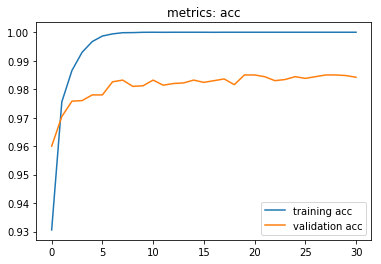

train {'acc': 1.0}
test {'acc': 0.9839}

Training student with temperature = 10 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12257066649315409424
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 5738196050622356413
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.304775 , acc = 0.25 
Epoch 1 , step 100 , loss= 1.5606188 , acc = 0.94 
Epoch 1 , step 200 , loss= 1.5321919 , acc = 0.93 
Epoch 1 , step 300 , loss= 1.4314917 , acc = 0.97 
Epoch 1 , step 400 , loss= 1.5134532 , acc = 0.95 
Epoch 1 , step 500 , loss= 1.4240738 , acc = 0.97 
Epoch 1 , step 549 , loss= 1.5982108 val_loss= 1.4833293 , acc = 0.97 val acc = 0.9584 
Epoch 1 finished, loss= 1.5653924 val loss= 1.4833293 ,  acc = 0.9101454 val acc = 0.9584
val_acc improved. 
Epoc

Epoch 17 , step 400 , loss= 1.4359252 , acc = 1.0 
Epoch 17 , step 500 , loss= 1.4008571 , acc = 0.99 
Epoch 17 , step 549 , loss= 1.377948 val_loss= 1.4590727 , acc = 1.0 val acc = 0.9798 
Epoch 17 finished, loss= 1.4738605 val loss= 1.4590727 ,  acc = 0.99056363 val acc = 0.9798

Epoch 18 , step 50 , loss= 1.4945884 , acc = 0.99 
Epoch 18 , step 150 , loss= 1.3849925 , acc = 0.98 
Epoch 18 , step 250 , loss= 1.4652815 , acc = 0.99 
Epoch 18 , step 350 , loss= 1.4751217 , acc = 0.99 
Epoch 18 , step 450 , loss= 1.5062059 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.4762119 val_loss= 1.4588084 , acc = 0.98 val acc = 0.98 
Epoch 18 finished, loss= 1.4736807 val loss= 1.4588084 ,  acc = 0.9911455 val acc = 0.98
val_acc improved. 
Epoch 19 , step 0 , loss= 1.4719445 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.3897927 , acc = 0.99 
Epoch 19 , step 200 , loss= 1.49721 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.4718361 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.4372394 , acc = 0.99 
Epoch 19 , 

Epoch 35 , step 200 , loss= 1.5317379 , acc = 1.0 
Epoch 35 , step 300 , loss= 1.471779 , acc = 1.0 
Epoch 35 , step 400 , loss= 1.5545465 , acc = 0.99 
Epoch 35 , step 500 , loss= 1.3832501 , acc = 1.0 
Epoch 35 , step 549 , loss= 1.5237174 val_loss= 1.4579989 , acc = 0.99 val acc = 0.9804 
Epoch 35 finished, loss= 1.4724083 val loss= 1.4579989 ,  acc = 0.9931454 val acc = 0.9804

Epoch 36 , step 50 , loss= 1.5778756 , acc = 0.98 
Epoch 36 , step 150 , loss= 1.5145777 , acc = 1.0 
Epoch 36 , step 250 , loss= 1.5566444 , acc = 0.98 
Epoch 36 , step 350 , loss= 1.3640321 , acc = 0.99 
Epoch 36 , step 450 , loss= 1.519863 , acc = 0.99 
Epoch 36 , step 549 , loss= 1.546416 val_loss= 1.4577417 , acc = 0.98 val acc = 0.982 
Epoch 36 finished, loss= 1.4724015 val loss= 1.4577417 ,  acc = 0.9930545 val acc = 0.982

Epoch 37 , step 0 , loss= 1.3820791 , acc = 1.0 
Epoch 37 , step 100 , loss= 1.4322968 , acc = 1.0 
Epoch 37 , step 200 , loss= 1.3631994 , acc = 0.99 
Epoch 37 , step 300 , loss= 

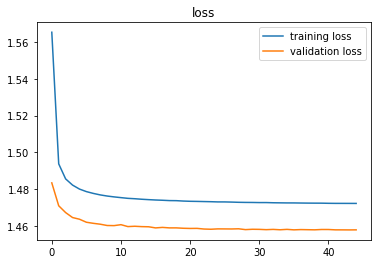

Plotting metrics...


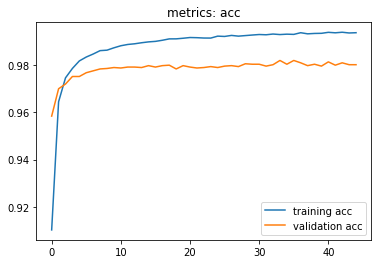

train {'acc': 0.9936727}
test {'acc': 0.979}

Training student with temperature = 15 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14738428951945685281
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 4516919733873095290
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.7653513 , acc = 0.34 
Epoch 1 , step 100 , loss= 0.20546703 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.12306244 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.14689034 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.1647649 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.11318431 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.16342038 val_loss= 0.1149861 , acc = 0.94 val acc = 0.9664 
Epoch 1 finished, loss= 0.24280551 val loss= 0.1149861 ,  acc = 0.9366182 val acc = 0.9664
val_acc imp

Epoch 17 , step 100 , loss= 4.5494555e-05 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.003703084 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0035831525 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0022895462 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.03434912 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0057922243 val_loss= 0.1254605 , acc = 1.0 val acc = 0.9766 
Epoch 17 finished, loss= 0.010706827 val loss= 0.1254605 ,  acc = 0.99959993 val acc = 0.9766

Epoch 18 , step 50 , loss= 0.013198964 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0048121964 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0010701368 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0015701944 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0030830654 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0014543973 val_loss= 0.09341145 , acc = 1.0 val acc = 0.9818 
Epoch 18 finished, loss= 0.010102994 val loss= 0.09341145 ,  acc = 0.9995273 val acc = 0.9818

Epoch 19 , step 0 , loss= 0.0437829 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.00027994736

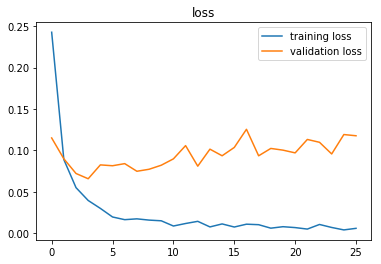

Plotting metrics...


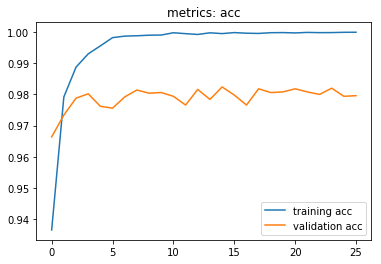

train {'acc': 0.9972}
test {'acc': 0.9761}

Training student with temperature = 15 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4862785646432990000
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 17280473112490781596
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.892236 , acc = 0.17 
Epoch 1 , step 100 , loss= 0.7051164 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.7725563 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.6285859 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.62671435 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.69061077 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.5414057 val_loss= 0.5917454 , acc = 0.98 val acc = 0.9656 
Epoch 1 finished, loss= 0.7096298 val loss= 0.5917454 ,  acc = 0.9348909 val acc = 0.9656
val_acc improved

Epoch 17 , step 400 , loss= 0.47074175 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.46581146 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.4772573 val_loss= 0.5127579 , acc = 1.0 val acc = 0.9846 
Epoch 17 finished, loss= 0.4666023 val loss= 0.5127579 ,  acc = 1.0 val acc = 0.9846

Epoch 18 , step 50 , loss= 0.46952152 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.46669903 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.47433645 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.46774212 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.46161875 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.5142622 val_loss= 0.6000654 , acc = 1.0 val acc = 0.9622 
Epoch 18 finished, loss= 0.46838695 val loss= 0.6000654 ,  acc = 0.9999454 val acc = 0.9622

Epoch 19 , step 0 , loss= 0.4829571 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.53394127 , acc = 0.99 
Epoch 19 , step 200 , loss= 0.46607485 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.48302138 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.50602764 , acc = 1.0 
Epoch 19 , step 500 , lo

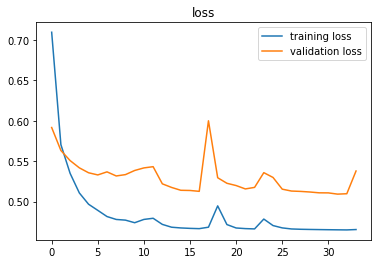

Plotting metrics...


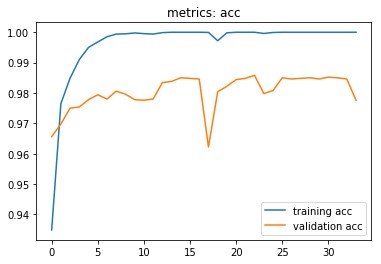

train {'acc': 0.9953455}
test {'acc': 0.9755}

Training student with temperature = 15 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5552481718910735520
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 8331999781701223034
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6378684 , acc = 0.25 
Epoch 1 , step 100 , loss= 1.1914492 , acc = 0.95 
Epoch 1 , step 200 , loss= 1.0906856 , acc = 0.95 
Epoch 1 , step 300 , loss= 1.0831407 , acc = 0.95 
Epoch 1 , step 400 , loss= 1.0528923 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.99604464 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.99196786 val_loss= 1.0467832 , acc = 0.99 val acc = 0.9586 
Epoch 1 finished, loss= 1.1474487 val loss= 1.0467832 ,  acc = 0.9319091 val acc = 0.9586
val_acc improve

Epoch 17 , step 400 , loss= 0.9279826 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.9647558 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.91744936 val_loss= 0.9572913 , acc = 1.0 val acc = 0.9856 
Epoch 17 finished, loss= 0.9302219 val loss= 0.9572913 ,  acc = 1.0 val acc = 0.9856
val_acc improved. 
Epoch 18 , step 50 , loss= 0.92535114 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.9315784 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.94317603 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.94191414 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.88273346 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.92081016 val_loss= 0.9625386 , acc = 1.0 val acc = 0.982 
Epoch 18 finished, loss= 0.93006337 val loss= 0.9625386 ,  acc = 1.0 val acc = 0.982

Epoch 19 , step 0 , loss= 0.8843012 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.94467205 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.93795514 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.96209365 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.96019316 , acc = 1.0 
Epoch 19 , step 

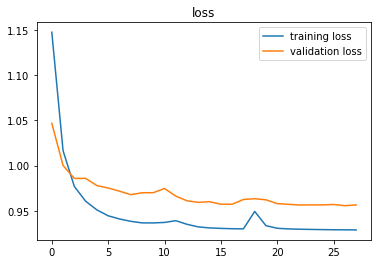

Plotting metrics...


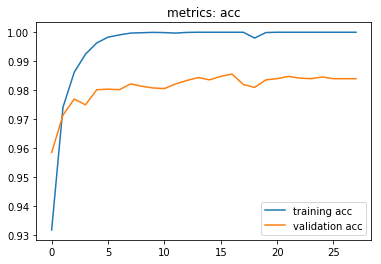

train {'acc': 0.9999818}
test {'acc': 0.9824}

Training student with temperature = 15 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15258251340544923412
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 17345881454142827889
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.4085336 , acc = 0.26 
Epoch 1 , step 100 , loss= 1.5772085 , acc = 0.95 
Epoch 1 , step 200 , loss= 1.5424308 , acc = 0.96 
Epoch 1 , step 300 , loss= 1.5662876 , acc = 0.93 
Epoch 1 , step 400 , loss= 1.5586407 , acc = 0.93 
Epoch 1 , step 500 , loss= 1.3922936 , acc = 0.96 
Epoch 1 , step 549 , loss= 1.4815136 val_loss= 1.4591643 , acc = 0.98 val acc = 0.9612 
Epoch 1 finished, loss= 1.550128 val loss= 1.4591643 ,  acc = 0.9304 val acc = 0.9612
val_acc improved.

Epoch 17 , step 549 , loss= 1.4417449 val_loss= 1.4013441 , acc = 1.0 val acc = 0.983 
Epoch 17 finished, loss= 1.3931684 val loss= 1.4013441 ,  acc = 1.0 val acc = 0.983

Epoch 18 , step 50 , loss= 1.4097562 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.3871804 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.3878303 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.3215665 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.4580511 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.3486619 val_loss= 1.4014411 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 1.393005 val loss= 1.4014411 ,  acc = 1.0 val acc = 0.9838
val_acc improved. 
Epoch 19 , step 0 , loss= 1.3865281 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.4743674 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.3599924 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.4386846 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.42268 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.375187 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.3894535 val_loss= 1.4022768 , acc = 1.0 val acc = 0.

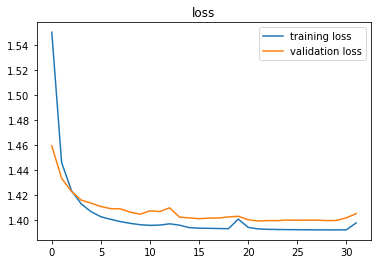

Plotting metrics...


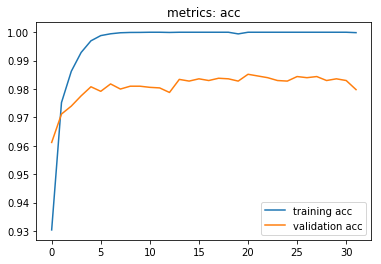

train {'acc': 0.9992727}
test {'acc': 0.9824}

Training student with temperature = 15 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15119433327372102397
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 7233625687641180053
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3036163 , acc = 0.35 
Epoch 1 , step 100 , loss= 1.9275283 , acc = 0.82 
Epoch 1 , step 200 , loss= 1.8644465 , acc = 0.9 
Epoch 1 , step 300 , loss= 1.830993 , acc = 0.95 
Epoch 1 , step 400 , loss= 1.8872352 , acc = 0.93 
Epoch 1 , step 500 , loss= 1.8752786 , acc = 0.97 
Epoch 1 , step 549 , loss= 1.9010113 val_loss= 1.8599662 , acc = 0.97 val acc = 0.9566 
Epoch 1 finished, loss= 1.9084187 val loss= 1.8599662 ,  acc = 0.9013999 val acc = 0.9566
val_acc improved. 

Epoch 17 , step 400 , loss= 1.8445854 , acc = 1.0 
Epoch 17 , step 500 , loss= 1.8415351 , acc = 0.98 
Epoch 17 , step 549 , loss= 1.8473091 val_loss= 1.8454719 , acc = 0.99 val acc = 0.9816 
Epoch 17 finished, loss= 1.8551468 val loss= 1.8454719 ,  acc = 0.9897636 val acc = 0.9816
val_acc improved. 
Epoch 18 , step 50 , loss= 1.8720496 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.8764398 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.8031456 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.9093972 , acc = 0.98 
Epoch 18 , step 450 , loss= 1.8715141 , acc = 0.99 
Epoch 18 , step 549 , loss= 1.8565779 val_loss= 1.8454883 , acc = 0.99 val acc = 0.9822 
Epoch 18 finished, loss= 1.8550255 val loss= 1.8454883 ,  acc = 0.99032724 val acc = 0.9822
val_acc improved. 
Epoch 19 , step 0 , loss= 1.8741226 , acc = 0.99 
Epoch 19 , step 100 , loss= 1.8584522 , acc = 0.98 
Epoch 19 , step 200 , loss= 1.8161374 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.7806526 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.9030703 

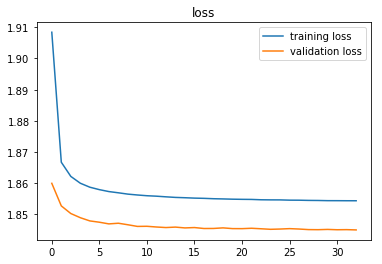

Plotting metrics...


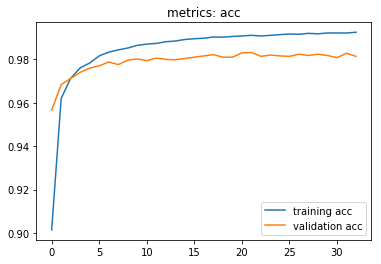

train {'acc': 0.99234545}
test {'acc': 0.9778}

Training student with temperature = 20 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11178457246499035780
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11457448945542002658
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.012379 , acc = 0.25 
Epoch 1 , step 100 , loss= 0.20120643 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.1523217 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.1284331 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.16682369 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.104358494 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.16626424 val_loss= 0.11173623 , acc = 0.93 val acc = 0.9676 
Epoch 1 finished, loss= 0.2435991 val loss= 0.11173623 ,  acc = 0.9368 val acc = 0.9676
val_acc imp

Epoch 17 , step 100 , loss= 0.00025084615 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0062737293 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.013423649 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.001151044 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.018598614 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0037407854 val_loss= 0.10355333 , acc = 1.0 val acc = 0.9814 
Epoch 17 finished, loss= 0.013028223 val loss= 0.10355333 ,  acc = 0.9994727 val acc = 0.9814

Epoch 18 , step 50 , loss= 0.014822086 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0017136049 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0018657313 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.00013492793 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0004734213 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00038505893 val_loss= 0.120237246 , acc = 1.0 val acc = 0.9808 
Epoch 18 finished, loss= 0.008697137 val loss= 0.120237246 ,  acc = 0.9997636 val acc = 0.9808

Epoch 19 , step 0 , loss= 0.0008550443 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0001

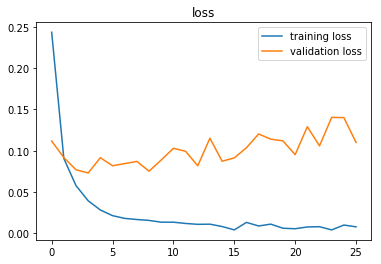

Plotting metrics...


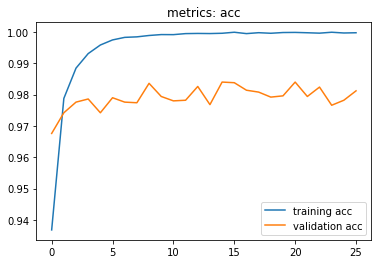

train {'acc': 0.99814546}
test {'acc': 0.9809}

Training student with temperature = 20 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2096118369224892895
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 9071921089725423399
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.467194 , acc = 0.34 
Epoch 1 , step 100 , loss= 0.68280625 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.801399 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.6871167 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.6273863 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.704493 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.5946765 val_loss= 0.6343491 , acc = 0.98 val acc = 0.962 
Epoch 1 finished, loss= 0.72648805 val loss= 0.6343491 ,  acc = 0.9372363 val acc = 0.962
val_acc improved.

Epoch 17 , step 400 , loss= 0.5173497 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.51672953 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.52368796 val_loss= 0.5718464 , acc = 1.0 val acc = 0.9816 
Epoch 17 finished, loss= 0.51846135 val loss= 0.5718464 ,  acc = 0.9998 val acc = 0.9816

Epoch 18 , step 50 , loss= 0.5162068 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.51303166 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.51856893 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.51223487 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.5106986 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.5078173 val_loss= 0.568625 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 0.5134619 val loss= 0.568625 ,  acc = 1.0 val acc = 0.9826
val_acc improved. 
Epoch 19 , step 0 , loss= 0.5074248 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.50763553 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.50932163 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.5155134 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.51234895 , acc = 1.0 
Epoch 19 , step

Epoch 35 , step 100 , loss= 0.5113136 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.5151476 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.49106812 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.50783736 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.49585843 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.51206875 val_loss= 0.5601494 , acc = 1.0 val acc = 0.9854 
Epoch 35 finished, loss= 0.51093686 val loss= 0.5601494 ,  acc = 1.0 val acc = 0.9854

Epoch 36 , step 50 , loss= 0.524508 , acc = 1.0 
Epoch 36 , step 150 , loss= 0.5037867 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.51139474 , acc = 1.0 
Epoch 36 , step 350 , loss= 0.5170362 , acc = 1.0 
Epoch 36 , step 450 , loss= 0.5213766 , acc = 1.0 
Epoch 36 , step 549 , loss= 0.5073256 val_loss= 0.558363 , acc = 1.0 val acc = 0.9856 
Epoch 36 finished, loss= 0.5108538 val loss= 0.558363 ,  acc = 1.0 val acc = 0.9856

Epoch 37 , step 0 , loss= 0.5143082 , acc = 1.0 
Epoch 37 , step 100 , loss= 0.5136985 , acc = 1.0 
Epoch 37 , step 200 , loss= 0.51105285 ,

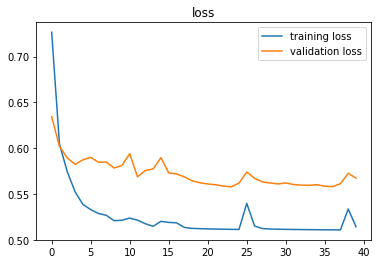

Plotting metrics...


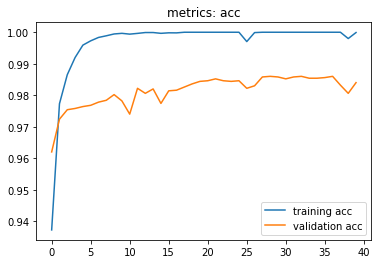

train {'acc': 0.99996364}
test {'acc': 0.9831}

Training student with temperature = 20 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12371122621540204882
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 15737291194851872088
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.6211386 , acc = 0.23 
Epoch 1 , step 100 , loss= 1.286422 , acc = 0.9 
Epoch 1 , step 200 , loss= 1.130049 , acc = 0.98 
Epoch 1 , step 300 , loss= 1.208113 , acc = 0.92 
Epoch 1 , step 400 , loss= 1.1409408 , acc = 0.95 
Epoch 1 , step 500 , loss= 1.0971144 , acc = 0.98 
Epoch 1 , step 549 , loss= 1.1356184 val_loss= 1.1159749 , acc = 0.95 val acc = 0.9664 
Epoch 1 finished, loss= 1.2094333 val loss= 1.1159749 ,  acc = 0.9334546 val acc = 0.9664
val_acc improved. 

Epoch 17 , step 549 , loss= 1.0044001 val_loss= 1.052794 , acc = 1.0 val acc = 0.9844 
Epoch 17 finished, loss= 1.0226568 val loss= 1.052794 ,  acc = 1.0 val acc = 0.9844
val_acc improved. 
Epoch 18 , step 50 , loss= 1.0198985 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.9985312 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.0357703 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.042535 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.0281394 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.0082011 val_loss= 1.0513352 , acc = 1.0 val acc = 0.9844 
Epoch 18 finished, loss= 1.022325 val loss= 1.0513352 ,  acc = 1.0 val acc = 0.9844

Epoch 19 , step 0 , loss= 1.0306658 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.0218647 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.0046438 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.011719 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.0517058 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.0419241 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.0026637 val_loss= 1.0508571 , acc = 1.0 val acc = 0

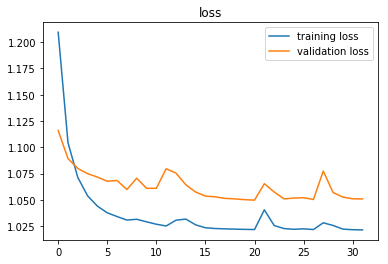

Plotting metrics...


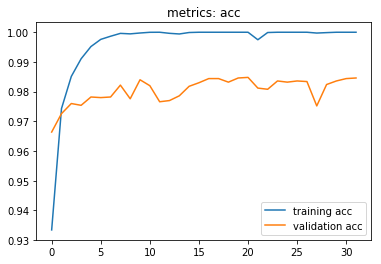

train {'acc': 1.0}
test {'acc': 0.9856}

Training student with temperature = 20 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7638054931797908214
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 1543662661966111636
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3767633 , acc = 0.35 
Epoch 1 , step 100 , loss= 1.7459179 , acc = 0.87 
Epoch 1 , step 200 , loss= 1.6225928 , acc = 0.97 
Epoch 1 , step 300 , loss= 1.6707288 , acc = 0.92 
Epoch 1 , step 400 , loss= 1.5785753 , acc = 0.99 
Epoch 1 , step 500 , loss= 1.6063875 , acc = 0.94 
Epoch 1 , step 549 , loss= 1.5493894 val_loss= 1.5903802 , acc = 0.97 val acc = 0.9652 
Epoch 1 finished, loss= 1.6626832 val loss= 1.5903802 ,  acc = 0.93280005 val acc = 0.9652
val_acc improved. 
E

Epoch 17 , step 549 , loss= 1.5357361 val_loss= 1.542133 , acc = 1.0 val acc = 0.984 
Epoch 17 finished, loss= 1.5316017 val loss= 1.542133 ,  acc = 1.0 val acc = 0.984

Epoch 18 , step 50 , loss= 1.5516727 , acc = 1.0 
Epoch 18 , step 150 , loss= 1.5284245 , acc = 1.0 
Epoch 18 , step 250 , loss= 1.5125314 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.5197604 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.499205 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.5772352 val_loss= 1.5581822 , acc = 1.0 val acc = 0.9752 
Epoch 18 finished, loss= 1.5349135 val loss= 1.5581822 ,  acc = 0.9996181 val acc = 0.9752

Epoch 19 , step 0 , loss= 1.542571 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.5403029 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.5349109 , acc = 1.0 
Epoch 19 , step 300 , loss= 1.5029006 , acc = 1.0 
Epoch 19 , step 400 , loss= 1.584163 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.4987543 , acc = 1.0 
Epoch 19 , step 549 , loss= 1.5492061 val_loss= 1.5441991 , acc = 1.0 val acc = 0.9814 
Epoch 1

Epoch 35 , step 549 , loss= 1.5836663 val_loss= 1.5396214 , acc = 1.0 val acc = 0.9848 
Epoch 35 finished, loss= 1.5303978 val loss= 1.5396214 ,  acc = 1.0 val acc = 0.9848

Epoch 36 , step 50 , loss= 1.5219997 , acc = 1.0 
Epoch 36 , step 150 , loss= 1.5644953 , acc = 1.0 
Epoch 36 , step 250 , loss= 1.5048879 , acc = 1.0 
Epoch 36 , step 350 , loss= 1.5038328 , acc = 1.0 
Epoch 36 , step 450 , loss= 1.5361263 , acc = 1.0 
Epoch 36 , step 549 , loss= 1.5653758 val_loss= 1.5401018 , acc = 1.0 val acc = 0.9846 
Epoch 36 finished, loss= 1.5303689 val loss= 1.5401018 ,  acc = 1.0 val acc = 0.9846

Epoch 37 , step 0 , loss= 1.5097361 , acc = 1.0 
Epoch 37 , step 100 , loss= 1.5632279 , acc = 1.0 
Epoch 37 , step 200 , loss= 1.529415 , acc = 1.0 
Epoch 37 , step 300 , loss= 1.5332581 , acc = 1.0 
Epoch 37 , step 400 , loss= 1.5029035 , acc = 1.0 
Epoch 37 , step 500 , loss= 1.5272079 , acc = 1.0 
Epoch 37 , step 549 , loss= 1.5167335 val_loss= 1.5400304 , acc = 1.0 val acc = 0.9852 
Epoch 3

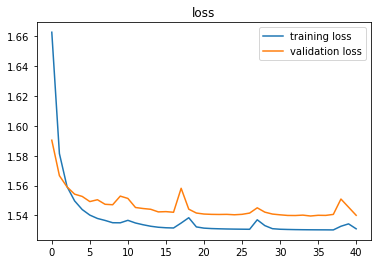

Plotting metrics...


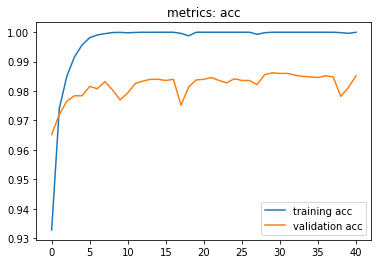

train {'acc': 1.0}
test {'acc': 0.9841}

Training student with temperature = 20 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6432752414052215037
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 10471342618348267742
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.301029 , acc = 0.4 
Epoch 1 , step 100 , loss= 2.0958393 , acc = 0.84 
Epoch 1 , step 200 , loss= 2.0572805 , acc = 0.96 
Epoch 1 , step 300 , loss= 2.0484512 , acc = 0.91 
Epoch 1 , step 400 , loss= 2.039342 , acc = 0.94 
Epoch 1 , step 500 , loss= 2.0552514 , acc = 0.95 
Epoch 1 , step 549 , loss= 2.0389988 val_loss= 2.043058 , acc = 0.98 val acc = 0.9542 
Epoch 1 finished, loss= 2.0732148 val loss= 2.043058 ,  acc = 0.90023637 val acc = 0.9542
val_acc improved. 
Epoch 2

Epoch 17 , step 400 , loss= 2.008694 , acc = 0.98 
Epoch 17 , step 500 , loss= 2.0180616 , acc = 0.98 
Epoch 17 , step 549 , loss= 2.0386224 val_loss= 2.0339339 , acc = 0.99 val acc = 0.9782 
Epoch 17 finished, loss= 2.0399933 val loss= 2.0339339 ,  acc = 0.9890181 val acc = 0.9782

Epoch 18 , step 50 , loss= 2.0060549 , acc = 1.0 
Epoch 18 , step 150 , loss= 2.0490103 , acc = 1.0 
Epoch 18 , step 250 , loss= 2.0751395 , acc = 0.99 
Epoch 18 , step 350 , loss= 2.0508413 , acc = 1.0 
Epoch 18 , step 450 , loss= 2.044503 , acc = 0.98 
Epoch 18 , step 549 , loss= 2.0744898 val_loss= 2.0337598 , acc = 0.98 val acc = 0.9776 
Epoch 18 finished, loss= 2.0399134 val loss= 2.0337598 ,  acc = 0.98945445 val acc = 0.9776

Epoch 19 , step 0 , loss= 2.0197432 , acc = 1.0 
Epoch 19 , step 100 , loss= 2.0686011 , acc = 1.0 
Epoch 19 , step 200 , loss= 2.0466812 , acc = 1.0 
Epoch 19 , step 300 , loss= 2.0790954 , acc = 1.0 
Epoch 19 , step 400 , loss= 2.0400617 , acc = 1.0 
Epoch 19 , step 500 , loss

Epoch 35 , step 200 , loss= 2.0307693 , acc = 0.99 
Epoch 35 , step 300 , loss= 2.0548425 , acc = 1.0 
Epoch 35 , step 400 , loss= 2.10037 , acc = 1.0 
Epoch 35 , step 500 , loss= 1.9751335 , acc = 0.99 
Epoch 35 , step 549 , loss= 2.018762 val_loss= 2.0335925 , acc = 1.0 val acc = 0.9806 
Epoch 35 finished, loss= 2.0394313 val loss= 2.0335925 ,  acc = 0.99230915 val acc = 0.9806

Epoch 36 , step 50 , loss= 2.0676293 , acc = 1.0 
Epoch 36 , step 150 , loss= 2.0457149 , acc = 0.99 
Epoch 36 , step 250 , loss= 2.0781944 , acc = 1.0 
Epoch 36 , step 350 , loss= 2.0193603 , acc = 0.99 
Epoch 36 , step 450 , loss= 2.016501 , acc = 1.0 
Epoch 36 , step 549 , loss= 2.1313713 val_loss= 2.0336068 , acc = 1.0 val acc = 0.9808 
Epoch 36 finished, loss= 2.0394442 val loss= 2.0336068 ,  acc = 0.9925637 val acc = 0.9808
val_acc improved. 
Epoch 37 , step 0 , loss= 2.0452852 , acc = 0.99 
Epoch 37 , step 100 , loss= 2.028533 , acc = 1.0 
Epoch 37 , step 200 , loss= 2.030817 , acc = 1.0 
Epoch 37 , st

Epoch 53 , step 100 , loss= 2.0376704 , acc = 0.99 
Epoch 53 , step 200 , loss= 2.0363932 , acc = 1.0 
Epoch 53 , step 300 , loss= 2.0142598 , acc = 1.0 
Epoch 53 , step 400 , loss= 2.006545 , acc = 0.97 
Epoch 53 , step 500 , loss= 1.9955361 , acc = 0.99 
Epoch 53 , step 549 , loss= 2.0805209 val_loss= 2.0334678 , acc = 0.98 val acc = 0.9814 
Epoch 53 finished, loss= 2.0392513 val loss= 2.0334678 ,  acc = 0.99310905 val acc = 0.9814

Epoch 54 , step 50 , loss= 1.97029 , acc = 1.0 
Epoch 54 , step 150 , loss= 2.06458 , acc = 0.99 
Epoch 54 , step 250 , loss= 2.0238311 , acc = 0.97 
Epoch 54 , step 350 , loss= 2.0221279 , acc = 0.99 
Epoch 54 , step 450 , loss= 2.0395346 , acc = 1.0 
Epoch 54 , step 549 , loss= 2.0363872 val_loss= 2.0334954 , acc = 1.0 val acc = 0.9814 
Epoch 54 finished, loss= 2.0392535 val loss= 2.0334954 ,  acc = 0.9931818 val acc = 0.9814

Epoch 55 , step 0 , loss= 2.0193148 , acc = 0.99 
Epoch 55 , step 100 , loss= 2.0655713 , acc = 0.98 
Epoch 55 , step 200 , loss

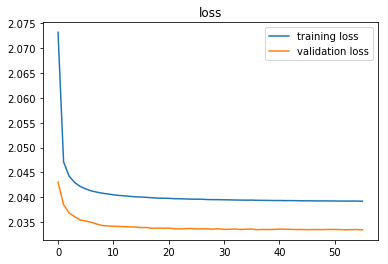

Plotting metrics...


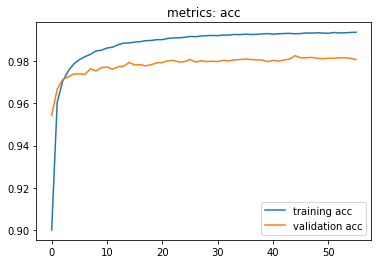

train {'acc': 0.9930909}
test {'acc': 0.9779}

{2: [{'acc': 0.9784}, {'acc': 0.9842}, {'acc': 0.9825}, {'acc': 0.9825}, {'acc': 0.9812}], 4: [{'acc': 0.9801}, {'acc': 0.9839}, {'acc': 0.9803}, {'acc': 0.982}, {'acc': 0.9804}], 6: [{'acc': 0.9824}, {'acc': 0.9839}, {'acc': 0.9837}, {'acc': 0.9805}, {'acc': 0.9788}], 8: [{'acc': 0.9813}, {'acc': 0.9849}, {'acc': 0.9844}, {'acc': 0.9811}, {'acc': 0.9789}], 10: [{'acc': 0.9806}, {'acc': 0.9842}, {'acc': 0.9835}, {'acc': 0.9839}, {'acc': 0.979}], 15: [{'acc': 0.9761}, {'acc': 0.9755}, {'acc': 0.9824}, {'acc': 0.9824}, {'acc': 0.9778}], 20: [{'acc': 0.9809}, {'acc': 0.9831}, {'acc': 0.9856}, {'acc': 0.9841}, {'acc': 0.9779}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            2                   1    0.9784   
1            0.75           0.25            2                   1    0.9842   
2            0.50           0.50            2                   1    0.9825   
3    

In [14]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])

list_exp = []
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    set_rand_seed(0)
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    tmp_effect = 1 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True, gpu_id=gpu_id)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=100
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp = pd.DataFrame(list_exp)
print(test_metrics)
print(df_exp)

In [15]:
print(test_metrics)
print(df_exp)
print(df_exp['test_acc'].mean())

{2: [{'acc': 0.9784}, {'acc': 0.9842}, {'acc': 0.9825}, {'acc': 0.9825}, {'acc': 0.9812}], 4: [{'acc': 0.9801}, {'acc': 0.9839}, {'acc': 0.9803}, {'acc': 0.982}, {'acc': 0.9804}], 6: [{'acc': 0.9824}, {'acc': 0.9839}, {'acc': 0.9837}, {'acc': 0.9805}, {'acc': 0.9788}], 8: [{'acc': 0.9813}, {'acc': 0.9849}, {'acc': 0.9844}, {'acc': 0.9811}, {'acc': 0.9789}], 10: [{'acc': 0.9806}, {'acc': 0.9842}, {'acc': 0.9835}, {'acc': 0.9839}, {'acc': 0.979}], 15: [{'acc': 0.9761}, {'acc': 0.9755}, {'acc': 0.9824}, {'acc': 0.9824}, {'acc': 0.9778}], 20: [{'acc': 0.9809}, {'acc': 0.9831}, {'acc': 0.9856}, {'acc': 0.9841}, {'acc': 0.9779}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            2                   1    0.9784   
1            0.75           0.25            2                   1    0.9842   
2            0.50           0.50            2                   1    0.9825   
3            0.25           0.75            2       

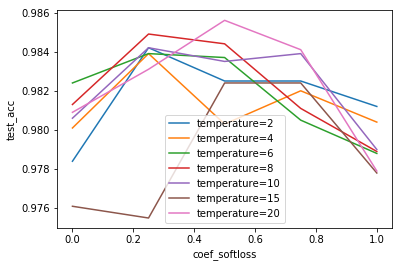

In [16]:
plot_trend(df_exp, label_x='coef_softloss', label_y='test_acc', label_line='temperature')

## Experiments on Students with $T^2$ Effect

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7734474244690631999
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 266779767995361860
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.7384324 , acc = 0.22 
Epoch 1 , step 100 , loss= 0.29143542 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.18534519 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.24610405 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.067608654 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.1066961 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.039509397 val_loss= 0.12324448 , acc = 0.99 val acc = 0.9644 
Epoch 1 finished, loss= 0.24062811 val loss= 0.12324448 ,  acc = 0.9383818 val acc = 0.9644
val_acc improved. 
Epoch 2 , step 50 , loss= 0.19076976 

Epoch 17 , step 100 , loss= 0.0013397776 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.001397497 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0021675345 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.004071517 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.00016550507 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0006149039 val_loss= 0.105267465 , acc = 1.0 val acc = 0.9814 
Epoch 17 finished, loss= 0.012045823 val loss= 0.105267465 ,  acc = 0.99941814 val acc = 0.9814

Epoch 18 , step 50 , loss= 0.0016454277 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00029810163 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0016572061 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0016345846 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0013082032 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.019397682 val_loss= 0.11779104 , acc = 1.0 val acc = 0.9796 
Epoch 18 finished, loss= 0.008367076 val loss= 0.11779104 ,  acc = 0.99963635 val acc = 0.9796

Epoch 19 , step 0 , loss= 0.00056667265 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0

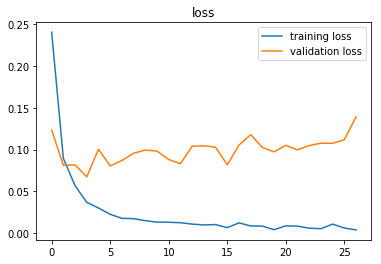

Plotting metrics...


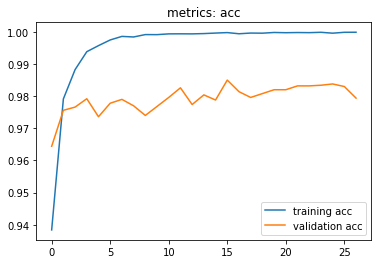

train {'acc': 0.9966182}
test {'acc': 0.976}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17482205615619539460
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 1969008843732038675
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.388341 , acc = 0.33 
Epoch 1 , step 100 , loss= 0.5104861 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.67189497 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.345334 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.35675216 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.24030071 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.39833704 val_loss= 0.3284327 , acc = 0.97 val acc = 0.968 
Epoch 1 finished, loss= 0.5567375 val loss= 0.3284327 ,  acc = 0.9375273 val acc = 0.968
val_acc improved

Epoch 17 , step 400 , loss= 0.15365763 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.14170302 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.15925424 val_loss= 0.22663927 , acc = 1.0 val acc = 0.9842 
Epoch 17 finished, loss= 0.17176062 val loss= 0.22663927 ,  acc = 0.9998182 val acc = 0.9842
val_acc improved. 
Epoch 18 , step 50 , loss= 0.15602352 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.17569345 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.27954698 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.23117554 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.17685106 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.2077705 val_loss= 0.2228826 , acc = 1.0 val acc = 0.984 
Epoch 18 finished, loss= 0.16815765 val loss= 0.2228826 ,  acc = 0.9999272 val acc = 0.984

Epoch 19 , step 0 , loss= 0.12321779 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.20746928 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.11949536 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.18266165 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.08764934 , acc = 1.0

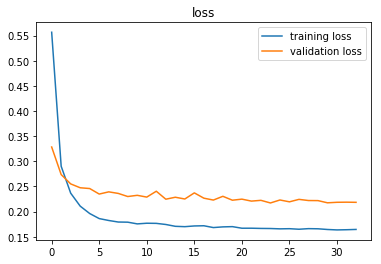

Plotting metrics...


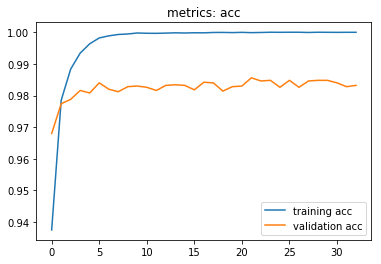

train {'acc': 0.99963635}
test {'acc': 0.9831}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6346923909109019090
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 15073000777569765577
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 6.1884675 , acc = 0.27 
Epoch 1 , step 100 , loss= 0.5425455 , acc = 0.97 
Epoch 1 , step 200 , loss= 0.46182016 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.71488035 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.4762508 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.39906603 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.570405 val_loss= 0.5060853 , acc = 0.98 val acc = 0.9742 
Epoch 1 finished, loss= 0.8296434 val loss= 0.5060853 ,  acc = 0.9382546 val acc = 0.9742
val_acc improve

Epoch 17 , step 300 , loss= 0.37529257 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.14254963 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.39313707 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.2632696 val_loss= 0.38617113 , acc = 1.0 val acc = 0.9832 
Epoch 17 finished, loss= 0.32510296 val loss= 0.38617113 ,  acc = 0.9989817 val acc = 0.9832

Epoch 18 , step 50 , loss= 0.42987457 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.22155721 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.31888098 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.15243505 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.37991542 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.31961882 val_loss= 0.39137387 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 0.3246153 val loss= 0.39137387 ,  acc = 0.9990909 val acc = 0.9838

Epoch 19 , step 0 , loss= 0.4359562 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.25426927 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.32450232 , acc = 0.99 
Epoch 19 , step 300 , loss= 0.29273874 , acc = 1.0 
Epoch 19 , st

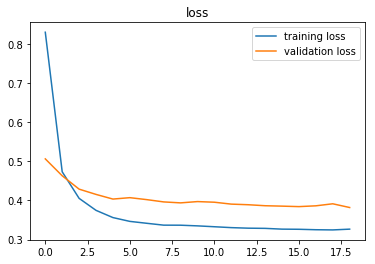

Plotting metrics...


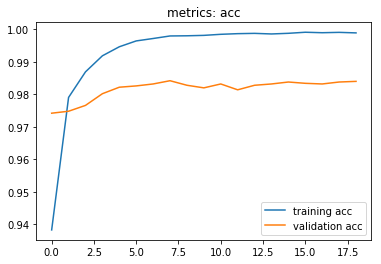

train {'acc': 0.9983818}
test {'acc': 0.9813}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6038737122503768121
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 2587012377375538738
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 7.8703623 , acc = 0.4 
Epoch 1 , step 100 , loss= 1.7394279 , acc = 0.88 
Epoch 1 , step 200 , loss= 0.75067794 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.94256413 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.41746596 , acc = 0.98 
Epoch 1 , step 500 , loss= 1.0150391 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.87144226 val_loss= 0.7164353 , acc = 0.98 val acc = 0.9696 
Epoch 1 finished, loss= 1.130478 val loss= 0.7164353 ,  acc = 0.9359455 val acc = 0.9696
val_acc improv

Epoch 17 , step 300 , loss= 0.330306 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.48568746 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.45232204 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.59813714 val_loss= 0.54713434 , acc = 0.99 val acc = 0.9838 
Epoch 17 finished, loss= 0.47619608 val loss= 0.54713434 ,  acc = 0.99718183 val acc = 0.9838
val_acc improved. 
Epoch 18 , step 50 , loss= 0.4381695 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.31528163 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.41996154 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.4684682 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.6437021 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.446694 val_loss= 0.54309213 , acc = 0.99 val acc = 0.9826 
Epoch 18 finished, loss= 0.47646192 val loss= 0.54309213 ,  acc = 0.99727273 val acc = 0.9826

Epoch 19 , step 0 , loss= 0.45968232 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.44552717 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.6064199 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.44555962 , acc = 1

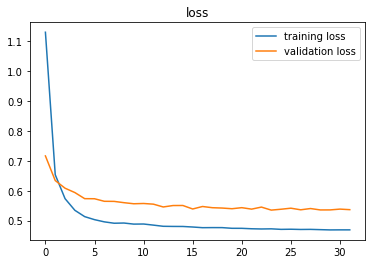

Plotting metrics...


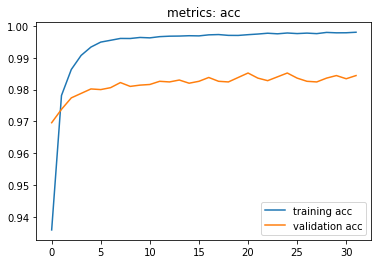

train {'acc': 0.99718183}
test {'acc': 0.9833}

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11237239392276263769
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6244881337013869318
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 10.015472 , acc = 0.28 
Epoch 1 , step 100 , loss= 2.2696111 , acc = 0.91 
Epoch 1 , step 200 , loss= 2.1213088 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.9015839 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.81750786 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.70938474 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.96491045 val_loss= 0.8927779 , acc = 0.99 val acc = 0.9726 
Epoch 1 finished, loss= 1.4088545 val loss= 0.8927779 ,  acc = 0.9357272 val acc = 0.9726
val_acc improv

Epoch 17 , step 300 , loss= 0.41618985 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.46544945 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.6150319 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.38923737 val_loss= 0.70171726 , acc = 1.0 val acc = 0.981 
Epoch 17 finished, loss= 0.6270063 val loss= 0.70171726 ,  acc = 0.9948181 val acc = 0.981

Epoch 18 , step 50 , loss= 0.6547768 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.8080558 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.59629947 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.7567989 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.7002052 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.64953005 val_loss= 0.69824237 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 0.6263479 val loss= 0.69824237 ,  acc = 0.9948727 val acc = 0.9826

Epoch 19 , step 0 , loss= 0.50680333 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.7909352 , acc = 0.98 
Epoch 19 , step 200 , loss= 0.63341445 , acc = 0.98 
Epoch 19 , step 300 , loss= 0.3856615 , acc = 1.0 
Epoch 19 , step 

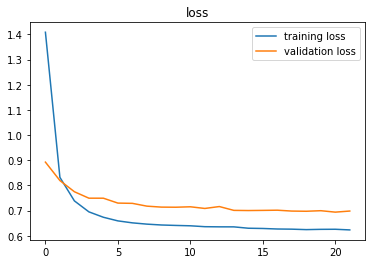

Plotting metrics...


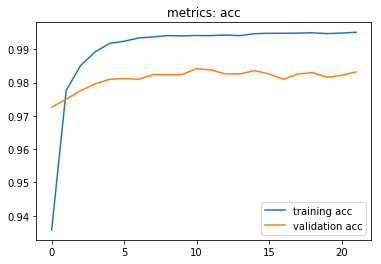

train {'acc': 0.9946182}
test {'acc': 0.9811}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7202535621526969727
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 10049080432860826282
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.8411496 , acc = 0.19 
Epoch 1 , step 100 , loss= 0.18715301 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.1522904 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.09362748 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.23072983 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.025175417 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.17602639 val_loss= 0.11211289 , acc = 0.97 val acc = 0.9672 
Epoch 1 finished, loss= 0.24042472 val loss= 0.11211289 ,  acc = 0.93740004 val acc = 0.9672
val_acc

Epoch 17 , step 100 , loss= 0.0017966536 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.00078684394 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.010112957 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0024833595 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.004319586 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.032552492 val_loss= 0.1013202 , acc = 1.0 val acc = 0.9832 
Epoch 17 finished, loss= 0.0063029286 val loss= 0.1013202 ,  acc = 0.9998726 val acc = 0.9832
val_acc improved. 
Epoch 18 , step 50 , loss= 0.0011152914 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.002118557 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00030832426 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0015772593 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0030024485 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.06656581 val_loss= 0.104718186 , acc = 0.99 val acc = 0.9812 
Epoch 18 finished, loss= 0.0057551307 val loss= 0.104718186 ,  acc = 0.9998545 val acc = 0.9812

Epoch 19 , step 0 , loss= 0.038645457 , acc = 1.0 
Epoch 19 , step 100

Epoch 34 , step 150 , loss= 0.00087225245 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.0038239288 , acc = 1.0 
Epoch 34 , step 350 , loss= 0.0010829963 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.00023079976 , acc = 1.0 
Epoch 34 , step 549 , loss= 1.5966409e-05 val_loss= 0.12991482 , acc = 1.0 val acc = 0.9816 
Epoch 34 finished, loss= 0.004720534 val loss= 0.12991482 ,  acc = 0.999909 val acc = 0.9816

Epoch 35 , step 0 , loss= 7.2158524e-05 , acc = 1.0 
Epoch 35 , step 100 , loss= 1.9226984e-06 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.0012378324 , acc = 1.0 
Epoch 35 , step 300 , loss= 1.20243685e-05 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.0011232629 , acc = 1.0 
Epoch 35 , step 500 , loss= 2.1630949e-05 , acc = 1.0 
Epoch 35 , step 549 , loss= 3.104371e-05 val_loss= 0.12651105 , acc = 1.0 val acc = 0.9812 
Epoch 35 finished, loss= 0.0052791466 val loss= 0.12651105 ,  acc = 0.9998726 val acc = 0.9812

Epoch 36 , step 50 , loss= 9.893638e-05 , acc = 1.0 
Epoch 36 , step 150 , loss=

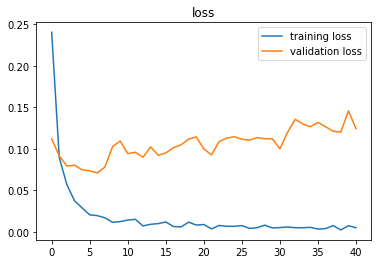

Plotting metrics...


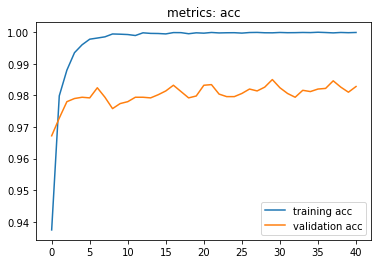

train {'acc': 0.99945456}
test {'acc': 0.9809}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 164291674382064178
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 1251458649760409264
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 11.158421 , acc = 0.31 
Epoch 1 , step 100 , loss= 3.4268596 , acc = 0.89 
Epoch 1 , step 200 , loss= 3.0868785 , acc = 0.93 
Epoch 1 , step 300 , loss= 2.290839 , acc = 0.96 
Epoch 1 , step 400 , loss= 2.5530548 , acc = 0.99 
Epoch 1 , step 500 , loss= 2.5445018 , acc = 0.96 
Epoch 1 , step 549 , loss= 1.9026873 val_loss= 2.4430773 , acc = 0.98 val acc = 0.9632 
Epoch 1 finished, loss= 3.0846653 val loss= 2.4430773 ,  acc = 0.93392724 val acc = 0.9632
val_acc improve

Epoch 17 , step 549 , loss= 2.1299696 val_loss= 2.1420765 , acc = 1.0 val acc = 0.9816 
Epoch 17 finished, loss= 2.1038606 val loss= 2.1420765 ,  acc = 0.9999636 val acc = 0.9816

Epoch 18 , step 50 , loss= 2.0521607 , acc = 1.0 
Epoch 18 , step 150 , loss= 2.4337897 , acc = 1.0 
Epoch 18 , step 250 , loss= 2.429412 , acc = 1.0 
Epoch 18 , step 350 , loss= 1.7323705 , acc = 1.0 
Epoch 18 , step 450 , loss= 1.9206328 , acc = 1.0 
Epoch 18 , step 549 , loss= 1.9337099 val_loss= 2.1372256 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 2.1034052 val loss= 2.1372256 ,  acc = 0.999909 val acc = 0.9838

Epoch 19 , step 0 , loss= 2.0336084 , acc = 1.0 
Epoch 19 , step 100 , loss= 1.8391463 , acc = 1.0 
Epoch 19 , step 200 , loss= 1.8037628 , acc = 1.0 
Epoch 19 , step 300 , loss= 2.0064032 , acc = 1.0 
Epoch 19 , step 400 , loss= 2.0491726 , acc = 1.0 
Epoch 19 , step 500 , loss= 2.2906172 , acc = 1.0 
Epoch 19 , step 549 , loss= 2.056224 val_loss= 2.136524 , acc = 1.0 val acc = 0.9836

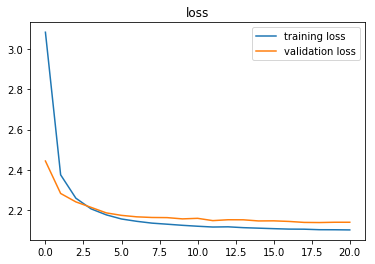

Plotting metrics...


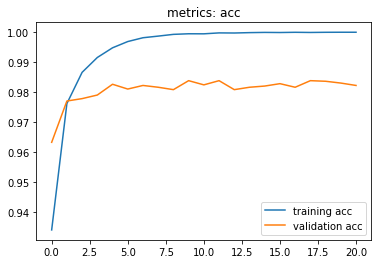

train {'acc': 0.9996909}
test {'acc': 0.9815}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12341513543554033362
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 15275765733696689314
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 19.761951 , acc = 0.25 
Epoch 1 , step 100 , loss= 5.8649893 , acc = 0.91 
Epoch 1 , step 200 , loss= 4.170246 , acc = 0.96 
Epoch 1 , step 300 , loss= 5.9412036 , acc = 0.92 
Epoch 1 , step 400 , loss= 5.673217 , acc = 0.96 
Epoch 1 , step 500 , loss= 4.9534006 , acc = 0.97 
Epoch 1 , step 549 , loss= 5.089354 val_loss= 4.6620326 , acc = 0.96 val acc = 0.965 
Epoch 1 finished, loss= 5.7959676 val loss= 4.6620326 ,  acc = 0.9307636 val acc = 0.965
val_acc improved. 
E

Epoch 17 , step 549 , loss= 3.722364 val_loss= 4.209748 , acc = 1.0 val acc = 0.9828 
Epoch 17 finished, loss= 4.1941423 val loss= 4.209748 ,  acc = 0.9987999 val acc = 0.9828

Epoch 18 , step 50 , loss= 4.432454 , acc = 1.0 
Epoch 18 , step 150 , loss= 3.809885 , acc = 1.0 
Epoch 18 , step 250 , loss= 3.7251544 , acc = 1.0 
Epoch 18 , step 350 , loss= 3.6392295 , acc = 1.0 
Epoch 18 , step 450 , loss= 4.527664 , acc = 1.0 
Epoch 18 , step 549 , loss= 4.438692 val_loss= 4.200969 , acc = 1.0 val acc = 0.9824 
Epoch 18 finished, loss= 4.1935697 val loss= 4.200969 ,  acc = 0.9990545 val acc = 0.9824

Epoch 19 , step 0 , loss= 3.7112732 , acc = 1.0 
Epoch 19 , step 100 , loss= 3.9740047 , acc = 1.0 
Epoch 19 , step 200 , loss= 4.6788573 , acc = 1.0 
Epoch 19 , step 300 , loss= 4.485491 , acc = 1.0 
Epoch 19 , step 400 , loss= 4.491583 , acc = 1.0 
Epoch 19 , step 500 , loss= 3.575813 , acc = 1.0 
Epoch 19 , step 549 , loss= 4.2806273 val_loss= 4.1988935 , acc = 1.0 val acc = 0.9834 
Epoch 

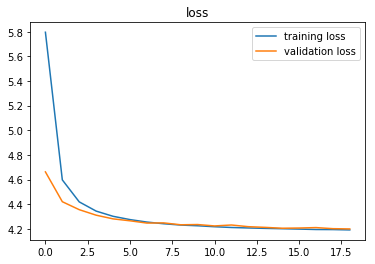

Plotting metrics...


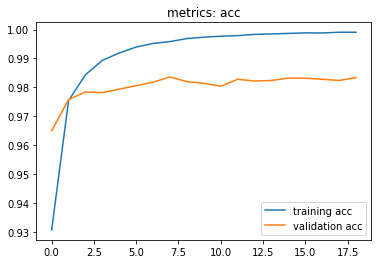

train {'acc': 0.9986909}
test {'acc': 0.9811}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18066100287175237768
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 7754511449304494079
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 28.560621 , acc = 0.28 
Epoch 1 , step 100 , loss= 9.95373 , acc = 0.9 
Epoch 1 , step 200 , loss= 9.167294 , acc = 0.92 
Epoch 1 , step 300 , loss= 7.1752 , acc = 0.95 
Epoch 1 , step 400 , loss= 6.9671965 , acc = 0.94 
Epoch 1 , step 500 , loss= 6.2172484 , acc = 0.96 
Epoch 1 , step 549 , loss= 6.894812 val_loss= 6.8766694 , acc = 0.97 val acc = 0.9682 
Epoch 1 finished, loss= 8.460164 val loss= 6.8766694 ,  acc = 0.9305091 val acc = 0.9682
val_acc improved. 
Epoc

Epoch 17 , step 549 , loss= 6.6970477 val_loss= 6.282669 , acc = 1.0 val acc = 0.982 
Epoch 17 finished, loss= 6.281566 val loss= 6.282669 ,  acc = 0.99619997 val acc = 0.982

Epoch 18 , step 50 , loss= 5.6535196 , acc = 0.99 
Epoch 18 , step 150 , loss= 5.524903 , acc = 1.0 
Epoch 18 , step 250 , loss= 4.913119 , acc = 1.0 
Epoch 18 , step 350 , loss= 5.7517505 , acc = 1.0 
Epoch 18 , step 450 , loss= 6.435067 , acc = 1.0 
Epoch 18 , step 549 , loss= 6.482942 val_loss= 6.28067 , acc = 1.0 val acc = 0.9834 
Epoch 18 finished, loss= 6.2791815 val loss= 6.28067 ,  acc = 0.99625456 val acc = 0.9834
val_acc improved. 
Epoch 19 , step 0 , loss= 6.9660373 , acc = 1.0 
Epoch 19 , step 100 , loss= 6.7353663 , acc = 1.0 
Epoch 19 , step 200 , loss= 6.2272177 , acc = 1.0 
Epoch 19 , step 300 , loss= 5.6627855 , acc = 1.0 
Epoch 19 , step 400 , loss= 6.115764 , acc = 0.99 
Epoch 19 , step 500 , loss= 5.760419 , acc = 1.0 
Epoch 19 , step 549 , loss= 6.6674075 val_loss= 6.276258 , acc = 1.0 val ac

Epoch 35 , step 549 , loss= 7.6695633 val_loss= 6.2569027 , acc = 1.0 val acc = 0.9832 
Epoch 35 finished, loss= 6.2528324 val loss= 6.2569027 ,  acc = 0.998 val acc = 0.9832

Epoch 36 , step 50 , loss= 7.6000347 , acc = 0.99 
Epoch 36 , step 150 , loss= 6.2753572 , acc = 1.0 
Epoch 36 , step 250 , loss= 6.006457 , acc = 1.0 
Epoch 36 , step 350 , loss= 6.7433376 , acc = 1.0 
Epoch 36 , step 450 , loss= 6.780824 , acc = 0.99 
Epoch 36 , step 549 , loss= 6.243285 val_loss= 6.256457 , acc = 0.99 val acc = 0.9838 
Epoch 36 finished, loss= 6.2515597 val loss= 6.256457 ,  acc = 0.9981272 val acc = 0.9838

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.75, 'coef_hardloss': 0.25, 'temperature': 4, 'temperature_effect': 16, 'train_acc': 0.9979636, 'test_acc': 0.9823}
Plotting loss...


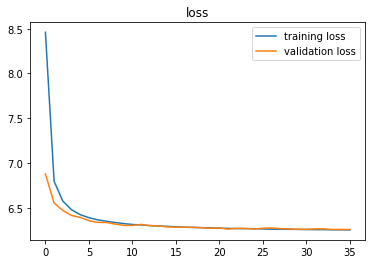

Plotting metrics...


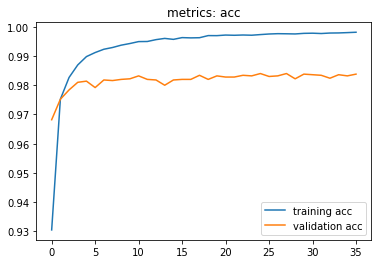

train {'acc': 0.9979636}
test {'acc': 0.9823}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14278115762304175535
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 9225511783813275830
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 37.365902 , acc = 0.29 
Epoch 1 , step 100 , loss= 12.587931 , acc = 0.9 
Epoch 1 , step 200 , loss= 10.261683 , acc = 0.96 
Epoch 1 , step 300 , loss= 11.489763 , acc = 0.95 
Epoch 1 , step 400 , loss= 10.175107 , acc = 0.95 
Epoch 1 , step 500 , loss= 9.2780485 , acc = 0.96 
Epoch 1 , step 549 , loss= 10.281753 val_loss= 9.125756 , acc = 0.98 val acc = 0.9644 
Epoch 1 finished, loss= 11.168332 val loss= 9.125756 ,  acc = 0.92907274 val acc = 0.9644
val_acc improved. 

Epoch 17 , step 549 , loss= 9.214449 val_loss= 8.358523 , acc = 0.98 val acc = 0.982 
Epoch 17 finished, loss= 8.370275 val loss= 8.358523 ,  acc = 0.99374557 val acc = 0.982

Epoch 18 , step 50 , loss= 8.309531 , acc = 0.99 
Epoch 18 , step 150 , loss= 7.7841988 , acc = 1.0 
Epoch 18 , step 250 , loss= 8.703205 , acc = 1.0 
Epoch 18 , step 350 , loss= 8.909588 , acc = 1.0 
Epoch 18 , step 450 , loss= 8.662876 , acc = 1.0 
Epoch 18 , step 549 , loss= 8.202883 val_loss= 8.351628 , acc = 0.99 val acc = 0.9824 
Epoch 18 finished, loss= 8.36693 val loss= 8.351628 ,  acc = 0.9939999 val acc = 0.9824

Epoch 19 , step 0 , loss= 8.719729 , acc = 0.99 
Epoch 19 , step 100 , loss= 9.01401 , acc = 1.0 
Epoch 19 , step 200 , loss= 9.334736 , acc = 1.0 
Epoch 19 , step 300 , loss= 6.300396 , acc = 0.98 
Epoch 19 , step 400 , loss= 9.681278 , acc = 0.98 
Epoch 19 , step 500 , loss= 9.464526 , acc = 1.0 
Epoch 19 , step 549 , loss= 7.9340487 val_loss= 8.35807 , acc = 0.98 val acc = 0.9828 
Epoch 19 f

Epoch 35 , step 549 , loss= 7.7409096 val_loss= 8.316246 , acc = 1.0 val acc = 0.9836 
Epoch 35 finished, loss= 8.330655 val loss= 8.316246 ,  acc = 0.9950546 val acc = 0.9836

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 1.0, 'coef_hardloss': 0.0, 'temperature': 4, 'temperature_effect': 16, 'train_acc': 0.9951818, 'test_acc': 0.9801}
Plotting loss...


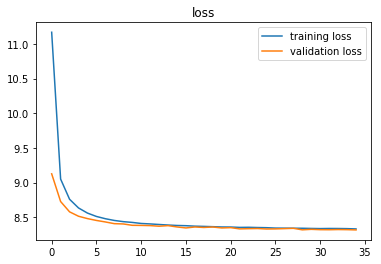

Plotting metrics...


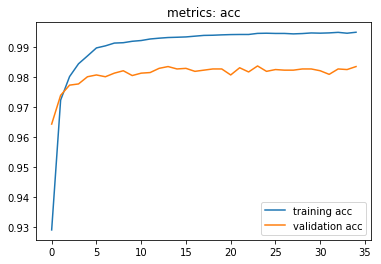

train {'acc': 0.9951818}
test {'acc': 0.9801}

Training student with temperature = 6 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11265011721423820060
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 17779108144277762175
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.778376 , acc = 0.27 
Epoch 1 , step 100 , loss= 0.24942997 , acc = 0.93 
Epoch 1 , step 200 , loss= 0.13137133 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.21708214 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.121826164 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.12791196 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.100007795 val_loss= 0.11142308 , acc = 0.97 val acc = 0.9674 
Epoch 1 finished, loss= 0.23794012 val loss= 0.11142308 ,  acc = 0.93878186 val acc = 0.9674
val_

Epoch 17 , step 100 , loss= 0.00046233885 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.00041387987 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.013878262 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0011057949 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.02399005 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0018201993 val_loss= 0.09994924 , acc = 1.0 val acc = 0.9812 
Epoch 17 finished, loss= 0.009890086 val loss= 0.09994924 ,  acc = 0.99949086 val acc = 0.9812

Epoch 18 , step 50 , loss= 0.00010661607 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.011063613 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.002749711 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0005086968 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0016679504 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0055972035 val_loss= 0.11620543 , acc = 1.0 val acc = 0.9784 
Epoch 18 finished, loss= 0.004125374 val loss= 0.11620543 ,  acc = 0.9998908 val acc = 0.9784

Epoch 19 , step 0 , loss= 0.016761724 , acc = 1.0 
Epoch 19 , step 100 , loss= 7.887128e

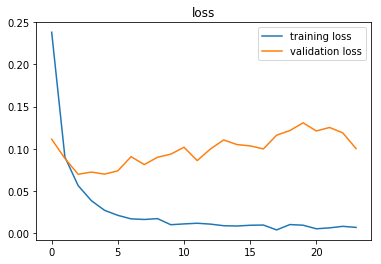

Plotting metrics...


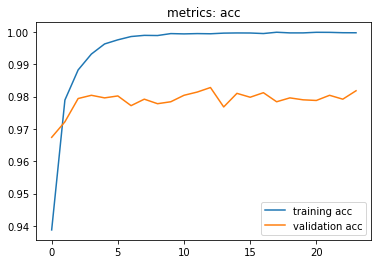

train {'acc': 0.99914545}
test {'acc': 0.9817}

Training student with temperature = 6 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15386382715533407951
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11435775516871708481
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 22.924614 , acc = 0.33 
Epoch 1 , step 100 , loss= 10.413078 , acc = 0.91 
Epoch 1 , step 200 , loss= 9.281341 , acc = 0.94 
Epoch 1 , step 300 , loss= 9.819866 , acc = 0.93 
Epoch 1 , step 400 , loss= 9.347701 , acc = 0.95 
Epoch 1 , step 500 , loss= 9.353998 , acc = 0.98 
Epoch 1 , step 549 , loss= 8.135835 val_loss= 8.538355 , acc = 1.0 val acc = 0.968 
Epoch 1 finished, loss= 9.758855 val loss= 8.538355 ,  acc = 0.9315272 val acc = 0.968
val_acc improved. 
Epoc

Epoch 18 , step 150 , loss= 9.343271 , acc = 1.0 
Epoch 18 , step 250 , loss= 7.0538673 , acc = 1.0 
Epoch 18 , step 350 , loss= 6.954 , acc = 1.0 
Epoch 18 , step 450 , loss= 8.153438 , acc = 1.0 
Epoch 18 , step 549 , loss= 7.209716 val_loss= 8.086693 , acc = 1.0 val acc = 0.982 
Epoch 18 finished, loss= 8.162866 val loss= 8.086693 ,  acc = 0.9997636 val acc = 0.982

Epoch 19 , step 0 , loss= 7.5523276 , acc = 1.0 
Epoch 19 , step 100 , loss= 7.537133 , acc = 1.0 
Epoch 19 , step 200 , loss= 8.66031 , acc = 1.0 
Epoch 19 , step 300 , loss= 7.310601 , acc = 1.0 
Epoch 19 , step 400 , loss= 8.084595 , acc = 1.0 
Epoch 19 , step 500 , loss= 8.506225 , acc = 1.0 
Epoch 19 , step 549 , loss= 7.4007506 val_loss= 8.085596 , acc = 1.0 val acc = 0.982 
Epoch 19 finished, loss= 8.159812 val loss= 8.085596 ,  acc = 0.999909 val acc = 0.982

Epoch 20 , step 50 , loss= 8.68802 , acc = 1.0 
Epoch 20 , step 150 , loss= 8.755149 , acc = 1.0 
Epoch 20 , step 250 , loss= 8.2937 , acc = 1.0 
Epoch 20 ,

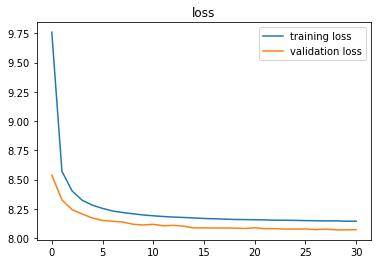

Plotting metrics...


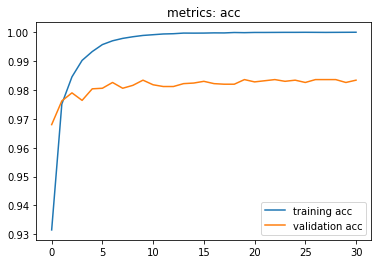

train {'acc': 0.9999273}
test {'acc': 0.9826}

Training student with temperature = 6 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8062627956544019642
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 5846838261591263225
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 43.213493 , acc = 0.31 
Epoch 1 , step 100 , loss= 20.067545 , acc = 0.86 
Epoch 1 , step 200 , loss= 16.656647 , acc = 0.98 
Epoch 1 , step 300 , loss= 20.492002 , acc = 0.92 
Epoch 1 , step 400 , loss= 17.44024 , acc = 0.94 
Epoch 1 , step 500 , loss= 17.122974 , acc = 0.92 
Epoch 1 , step 549 , loss= 16.833609 val_loss= 16.863338 , acc = 0.97 val acc = 0.9658 
Epoch 1 finished, loss= 19.142925 val loss= 16.863338 ,  acc = 0.92594546 val acc = 0.9658
val_acc improved.

Epoch 17 , step 500 , loss= 14.716004 , acc = 1.0 
Epoch 17 , step 549 , loss= 15.794471 val_loss= 16.102081 , acc = 0.99 val acc = 0.9816 
Epoch 17 finished, loss= 16.315905 val loss= 16.102081 ,  acc = 0.9982 val acc = 0.9816

Epoch 18 , step 50 , loss= 15.546549 , acc = 1.0 
Epoch 18 , step 150 , loss= 14.739126 , acc = 1.0 
Epoch 18 , step 250 , loss= 16.799826 , acc = 1.0 
Epoch 18 , step 350 , loss= 17.495815 , acc = 1.0 
Epoch 18 , step 450 , loss= 15.760822 , acc = 1.0 
Epoch 18 , step 549 , loss= 16.306572 val_loss= 16.112185 , acc = 1.0 val acc = 0.9812 
Epoch 18 finished, loss= 16.31157 val loss= 16.112185 ,  acc = 0.9984546 val acc = 0.9812

Epoch 19 , step 0 , loss= 15.978964 , acc = 1.0 
Epoch 19 , step 100 , loss= 15.480542 , acc = 1.0 
Epoch 19 , step 200 , loss= 16.826948 , acc = 1.0 
Epoch 19 , step 300 , loss= 16.259535 , acc = 1.0 
Epoch 19 , step 400 , loss= 17.098444 , acc = 1.0 
Epoch 19 , step 500 , loss= 17.57515 , acc = 1.0 
Epoch 19 , step 549 , loss= 17.3107

Epoch 35 , step 400 , loss= 17.928968 , acc = 1.0 
Epoch 35 , step 500 , loss= 17.728575 , acc = 1.0 
Epoch 35 , step 549 , loss= 16.724627 val_loss= 16.078959 , acc = 1.0 val acc = 0.9824 
Epoch 35 finished, loss= 16.276957 val loss= 16.078959 ,  acc = 0.9994727 val acc = 0.9824

Epoch 36 , step 50 , loss= 17.211723 , acc = 1.0 
Epoch 36 , step 150 , loss= 14.7497635 , acc = 1.0 
Epoch 36 , step 250 , loss= 15.673415 , acc = 1.0 
Epoch 36 , step 350 , loss= 19.921692 , acc = 1.0 
Epoch 36 , step 450 , loss= 16.57368 , acc = 1.0 
Epoch 36 , step 549 , loss= 14.966241 val_loss= 16.087528 , acc = 1.0 val acc = 0.9822 
Epoch 36 finished, loss= 16.27552 val loss= 16.087528 ,  acc = 0.99945456 val acc = 0.9822

Epoch 37 , step 0 , loss= 17.324793 , acc = 1.0 
Epoch 37 , step 100 , loss= 16.230055 , acc = 1.0 
Epoch 37 , step 200 , loss= 15.820073 , acc = 1.0 
Epoch 37 , step 300 , loss= 16.797691 , acc = 1.0 
Epoch 37 , step 400 , loss= 17.895775 , acc = 1.0 
Epoch 37 , step 500 , loss= 14.

Epoch 53 , step 300 , loss= 15.507471 , acc = 1.0 
Epoch 53 , step 400 , loss= 15.039389 , acc = 1.0 
Epoch 53 , step 500 , loss= 17.168575 , acc = 1.0 
Epoch 53 , step 549 , loss= 14.539565 val_loss= 16.068918 , acc = 1.0 val acc = 0.9834 
Epoch 53 finished, loss= 16.261723 val loss= 16.068918 ,  acc = 0.99972725 val acc = 0.9834

Epoch 54 , step 50 , loss= 15.676329 , acc = 1.0 
Epoch 54 , step 150 , loss= 16.407736 , acc = 1.0 
Epoch 54 , step 250 , loss= 15.305524 , acc = 1.0 
Epoch 54 , step 350 , loss= 15.598681 , acc = 1.0 
Epoch 54 , step 450 , loss= 14.936269 , acc = 1.0 
Epoch 54 , step 549 , loss= 17.123407 val_loss= 16.068895 , acc = 1.0 val acc = 0.9826 
Epoch 54 finished, loss= 16.26204 val loss= 16.068895 ,  acc = 0.9998182 val acc = 0.9826

Epoch 55 , step 0 , loss= 14.0517645 , acc = 1.0 
Epoch 55 , step 100 , loss= 15.819908 , acc = 1.0 
Epoch 55 , step 200 , loss= 15.497389 , acc = 1.0 
Epoch 55 , step 300 , loss= 17.359339 , acc = 1.0 
Epoch 55 , step 400 , loss= 16

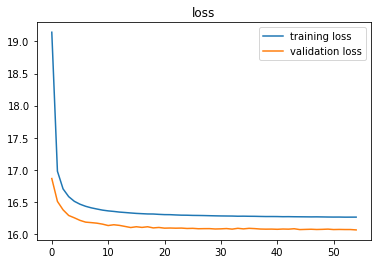

Plotting metrics...


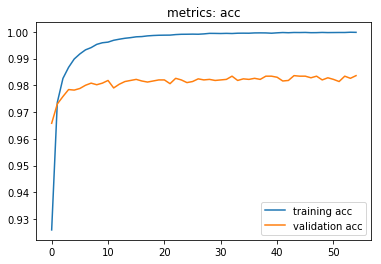

train {'acc': 0.9996727}
test {'acc': 0.9805}

Training student with temperature = 6 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17377371676003164595
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6526212992867374495
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 63.160393 , acc = 0.27 
Epoch 1 , step 100 , loss= 28.6248 , acc = 0.93 
Epoch 1 , step 200 , loss= 30.085054 , acc = 0.9 
Epoch 1 , step 300 , loss= 26.768051 , acc = 0.99 
Epoch 1 , step 400 , loss= 24.67337 , acc = 0.95 
Epoch 1 , step 500 , loss= 25.664394 , acc = 0.95 
Epoch 1 , step 549 , loss= 28.65394 val_loss= 25.191206 , acc = 0.95 val acc = 0.9628 
Epoch 1 finished, loss= 28.45437 val loss= 25.191206 ,  acc = 0.92318183 val acc = 0.9628
val_acc improved. 


Epoch 17 , step 400 , loss= 20.265364 , acc = 1.0 
Epoch 17 , step 500 , loss= 21.960693 , acc = 1.0 
Epoch 17 , step 549 , loss= 25.255962 val_loss= 24.141752 , acc = 1.0 val acc = 0.9814 
Epoch 17 finished, loss= 24.46491 val loss= 24.141752 ,  acc = 0.9951818 val acc = 0.9814

Epoch 18 , step 50 , loss= 26.616686 , acc = 0.99 
Epoch 18 , step 150 , loss= 21.866995 , acc = 1.0 
Epoch 18 , step 250 , loss= 26.054998 , acc = 0.99 
Epoch 18 , step 350 , loss= 25.367672 , acc = 1.0 
Epoch 18 , step 450 , loss= 27.117256 , acc = 1.0 
Epoch 18 , step 549 , loss= 26.7202 val_loss= 24.118467 , acc = 0.99 val acc = 0.9814 
Epoch 18 finished, loss= 24.46034 val loss= 24.118467 ,  acc = 0.9957817 val acc = 0.9814

Epoch 19 , step 0 , loss= 23.905546 , acc = 1.0 
Epoch 19 , step 100 , loss= 24.545593 , acc = 0.99 
Epoch 19 , step 200 , loss= 24.360325 , acc = 0.99 
Epoch 19 , step 300 , loss= 25.303085 , acc = 1.0 
Epoch 19 , step 400 , loss= 26.862036 , acc = 1.0 
Epoch 19 , step 500 , loss= 26

Epoch 35 , step 300 , loss= 26.109299 , acc = 0.99 
Epoch 35 , step 400 , loss= 26.64812 , acc = 1.0 
Epoch 35 , step 500 , loss= 25.656698 , acc = 1.0 
Epoch 35 , step 549 , loss= 25.658278 val_loss= 24.083405 , acc = 1.0 val acc = 0.9828 
Epoch 35 finished, loss= 24.405481 val loss= 24.083405 ,  acc = 0.9974727 val acc = 0.9828

Epoch 36 , step 50 , loss= 26.468529 , acc = 1.0 
Epoch 36 , step 150 , loss= 25.237232 , acc = 1.0 
Epoch 36 , step 250 , loss= 25.35445 , acc = 0.99 
Epoch 36 , step 350 , loss= 24.266487 , acc = 1.0 
Epoch 36 , step 450 , loss= 23.70687 , acc = 1.0 
Epoch 36 , step 549 , loss= 22.783266 val_loss= 24.08121 , acc = 1.0 val acc = 0.9824 
Epoch 36 finished, loss= 24.406073 val loss= 24.08121 ,  acc = 0.9975636 val acc = 0.9824

Epoch 37 , step 0 , loss= 24.830265 , acc = 1.0 
Epoch 37 , step 100 , loss= 25.618109 , acc = 1.0 
Epoch 37 , step 200 , loss= 24.722443 , acc = 1.0 
Epoch 37 , step 300 , loss= 24.640116 , acc = 1.0 
Epoch 37 , step 400 , loss= 24.629

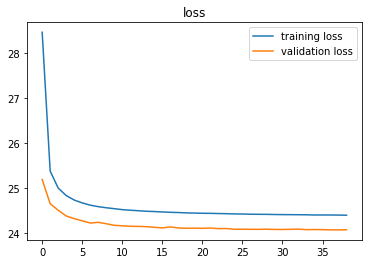

Plotting metrics...


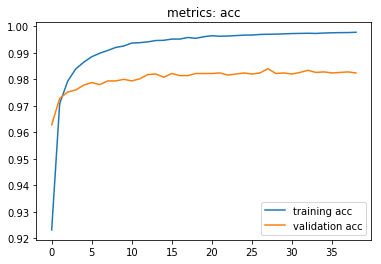

train {'acc': 0.9976364}
test {'acc': 0.9782}

Training student with temperature = 6 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 36 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16943311188686608113
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 7857623767115793887
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 82.959885 , acc = 0.28 
Epoch 1 , step 100 , loss= 33.72506 , acc = 0.89 
Epoch 1 , step 200 , loss= 36.541885 , acc = 0.97 
Epoch 1 , step 300 , loss= 35.697296 , acc = 0.93 
Epoch 1 , step 400 , loss= 37.90775 , acc = 0.95 
Epoch 1 , step 500 , loss= 31.64107 , acc = 0.98 
Epoch 1 , step 549 , loss= 33.65189 val_loss= 33.49348 , acc = 0.97 val acc = 0.9612 
Epoch 1 finished, loss= 37.782528 val loss= 33.49348 ,  acc = 0.92207277 val acc = 0.9612
val_acc improved. 
Ep

Epoch 17 , step 500 , loss= 32.464905 , acc = 0.98 
Epoch 17 , step 549 , loss= 31.718658 val_loss= 32.154007 , acc = 1.0 val acc = 0.9804 
Epoch 17 finished, loss= 32.615532 val loss= 32.154007 ,  acc = 0.99212724 val acc = 0.9804

Epoch 18 , step 50 , loss= 39.95445 , acc = 0.99 
Epoch 18 , step 150 , loss= 32.95496 , acc = 1.0 
Epoch 18 , step 250 , loss= 31.86608 , acc = 0.99 
Epoch 18 , step 350 , loss= 30.803493 , acc = 1.0 
Epoch 18 , step 450 , loss= 33.932224 , acc = 1.0 
Epoch 18 , step 549 , loss= 31.853317 val_loss= 32.174583 , acc = 0.98 val acc = 0.9798 
Epoch 18 finished, loss= 32.608658 val loss= 32.174583 ,  acc = 0.9927091 val acc = 0.9798

Epoch 19 , step 0 , loss= 32.465206 , acc = 1.0 
Epoch 19 , step 100 , loss= 30.132051 , acc = 1.0 
Epoch 19 , step 200 , loss= 34.990826 , acc = 0.99 
Epoch 19 , step 300 , loss= 34.939194 , acc = 1.0 
Epoch 19 , step 400 , loss= 33.45851 , acc = 1.0 
Epoch 19 , step 500 , loss= 28.121567 , acc = 1.0 
Epoch 19 , step 549 , loss= 3

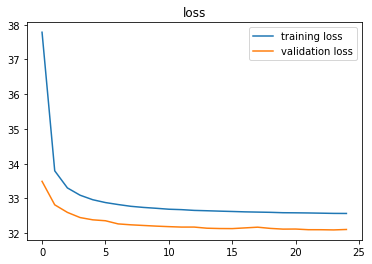

Plotting metrics...


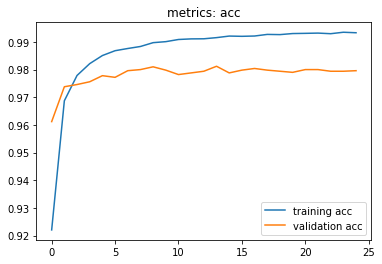

train {'acc': 0.99356365}
test {'acc': 0.9788}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1185815971648204486
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 8387758741899838966
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.1539872 , acc = 0.17 
Epoch 1 , step 100 , loss= 0.27239937 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.06554812 , acc = 0.99 
Epoch 1 , step 300 , loss= 0.15448028 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.09455605 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.123235375 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.08988936 val_loss= 0.10891374 , acc = 0.99 val acc = 0.9688 
Epoch 1 finished, loss= 0.24935041 val loss= 0.10891374 ,  acc = 0.93672717 val acc = 0.9688
val_a

Epoch 17 , step 100 , loss= 0.012455537 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0029366263 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.004161829 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.05946844 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.00013759948 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.015952455 val_loss= 0.09487858 , acc = 1.0 val acc = 0.9836 
Epoch 17 finished, loss= 0.0076164543 val loss= 0.09487858 ,  acc = 0.99978185 val acc = 0.9836
val_acc improved. 
Epoch 18 , step 50 , loss= 0.0018914886 , acc = 1.0 
Epoch 18 , step 150 , loss= 4.2416534e-05 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0029407144 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.015127688 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0004948732 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0070483414 val_loss= 0.10112697 , acc = 1.0 val acc = 0.982 
Epoch 18 finished, loss= 0.0071136067 val loss= 0.10112697 ,  acc = 0.9998 val acc = 0.982

Epoch 19 , step 0 , loss= 0.0012466239 , acc = 1.0 
Epoch 19 , step 100 , l

Epoch 34 , step 150 , loss= 0.0009782377 , acc = 1.0 
Epoch 34 , step 250 , loss= 0.09094532 , acc = 0.99 
Epoch 34 , step 350 , loss= 0.0001225329 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.0147443665 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.00026766805 val_loss= 0.112585545 , acc = 1.0 val acc = 0.983 
Epoch 34 finished, loss= 0.0063870484 val loss= 0.112585545 ,  acc = 0.999909 val acc = 0.983

Epoch 35 , step 0 , loss= 0.00037801612 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.0012432721 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.00060631183 , acc = 1.0 
Epoch 35 , step 300 , loss= 6.201697e-06 , acc = 1.0 
Epoch 35 , step 400 , loss= 7.707406e-06 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.00048025989 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.00046947077 val_loss= 0.103982925 , acc = 1.0 val acc = 0.9826 
Epoch 35 finished, loss= 0.0032644807 val loss= 0.103982925 ,  acc = 0.9998908 val acc = 0.9826

Epoch 36 , step 50 , loss= 0.0046028537 , acc = 1.0 
Epoch 36 , step 150 , loss= 

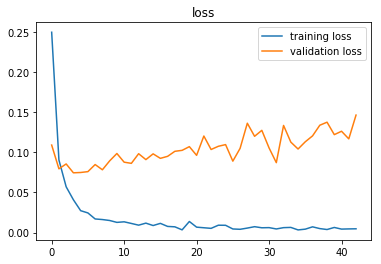

Plotting metrics...


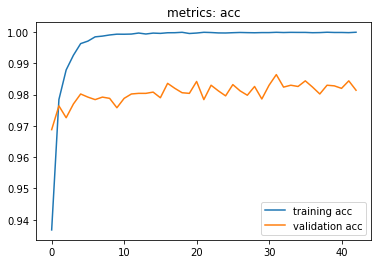

train {'acc': 0.9975455}
test {'acc': 0.9792}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2366778551105570956
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6426060486804620542
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 39.41784 , acc = 0.21 
Epoch 1 , step 100 , loss= 21.653057 , acc = 0.94 
Epoch 1 , step 200 , loss= 22.112392 , acc = 0.97 
Epoch 1 , step 300 , loss= 19.886858 , acc = 0.94 
Epoch 1 , step 400 , loss= 20.818853 , acc = 0.96 
Epoch 1 , step 500 , loss= 20.115686 , acc = 0.99 
Epoch 1 , step 549 , loss= 17.52884 val_loss= 20.020601 , acc = 0.98 val acc = 0.9636 
Epoch 1 finished, loss= 21.88555 val loss= 20.020601 ,  acc = 0.92565453 val acc = 0.9636
val_acc improved.

Epoch 17 , step 500 , loss= 18.644691 , acc = 1.0 
Epoch 17 , step 549 , loss= 19.172955 val_loss= 19.406284 , acc = 0.99 val acc = 0.9812 
Epoch 17 finished, loss= 19.625008 val loss= 19.406284 ,  acc = 0.999709 val acc = 0.9812

Epoch 18 , step 50 , loss= 17.6411 , acc = 1.0 
Epoch 18 , step 150 , loss= 18.776487 , acc = 1.0 
Epoch 18 , step 250 , loss= 20.567905 , acc = 1.0 
Epoch 18 , step 350 , loss= 19.025558 , acc = 1.0 
Epoch 18 , step 450 , loss= 19.690193 , acc = 1.0 
Epoch 18 , step 549 , loss= 19.602894 val_loss= 19.407616 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 19.622465 val loss= 19.407616 ,  acc = 0.999709 val acc = 0.9826

Epoch 19 , step 0 , loss= 19.143167 , acc = 0.99 
Epoch 19 , step 100 , loss= 21.552544 , acc = 1.0 
Epoch 19 , step 200 , loss= 18.476648 , acc = 1.0 
Epoch 19 , step 300 , loss= 19.989641 , acc = 1.0 
Epoch 19 , step 400 , loss= 18.595888 , acc = 1.0 
Epoch 19 , step 500 , loss= 19.432676 , acc = 1.0 
Epoch 19 , step 549 , loss= 21.48

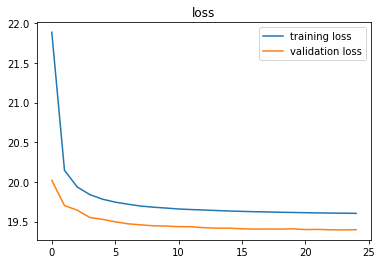

Plotting metrics...


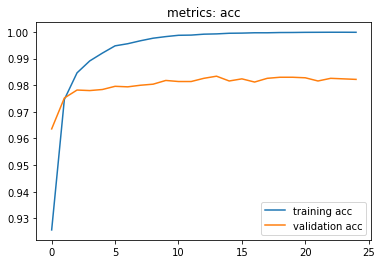

train {'acc': 0.9998909}
test {'acc': 0.9798}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6469843179771943481
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 4947033093147238473
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 75.515205 , acc = 0.34 
Epoch 1 , step 100 , loss= 46.49729 , acc = 0.9 
Epoch 1 , step 200 , loss= 40.799953 , acc = 0.89 
Epoch 1 , step 300 , loss= 42.56917 , acc = 0.94 
Epoch 1 , step 400 , loss= 40.219353 , acc = 0.96 
Epoch 1 , step 500 , loss= 40.014263 , acc = 0.98 
Epoch 1 , step 549 , loss= 42.212677 val_loss= 39.80096 , acc = 0.95 val acc = 0.9618 
Epoch 1 finished, loss= 43.21453 val loss= 39.80096 ,  acc = 0.92083627 val acc = 0.9618
val_acc improved. 
Epo

Epoch 17 , step 549 , loss= 40.78349 val_loss= 38.76401 , acc = 1.0 val acc = 0.981 
Epoch 17 finished, loss= 39.23617 val loss= 38.76401 ,  acc = 0.9975818 val acc = 0.981

Epoch 18 , step 50 , loss= 36.1518 , acc = 0.99 
Epoch 18 , step 150 , loss= 41.254234 , acc = 1.0 
Epoch 18 , step 250 , loss= 43.040134 , acc = 1.0 
Epoch 18 , step 350 , loss= 42.923195 , acc = 1.0 
Epoch 18 , step 450 , loss= 36.67034 , acc = 0.99 
Epoch 18 , step 549 , loss= 40.519077 val_loss= 38.743702 , acc = 1.0 val acc = 0.982 
Epoch 18 finished, loss= 39.229176 val loss= 38.743702 ,  acc = 0.9978182 val acc = 0.982
val_acc improved. 
Epoch 19 , step 0 , loss= 39.043255 , acc = 1.0 
Epoch 19 , step 100 , loss= 39.132717 , acc = 1.0 
Epoch 19 , step 200 , loss= 37.54869 , acc = 1.0 
Epoch 19 , step 300 , loss= 40.20298 , acc = 1.0 
Epoch 19 , step 400 , loss= 37.996952 , acc = 1.0 
Epoch 19 , step 500 , loss= 41.056816 , acc = 1.0 
Epoch 19 , step 549 , loss= 38.510635 val_loss= 38.780136 , acc = 1.0 val a

Epoch 35 , step 500 , loss= 40.96391 , acc = 1.0 
Epoch 35 , step 549 , loss= 37.96683 val_loss= 38.711952 , acc = 1.0 val acc = 0.9816 
Epoch 35 finished, loss= 39.176987 val loss= 38.711952 ,  acc = 0.9993455 val acc = 0.9816

Epoch 36 , step 50 , loss= 41.883163 , acc = 1.0 
Epoch 36 , step 150 , loss= 39.492413 , acc = 1.0 
Epoch 36 , step 250 , loss= 39.678677 , acc = 1.0 
Epoch 36 , step 350 , loss= 39.04307 , acc = 1.0 
Epoch 36 , step 450 , loss= 39.909637 , acc = 1.0 
Epoch 36 , step 549 , loss= 36.945507 val_loss= 38.70561 , acc = 1.0 val acc = 0.9826 
Epoch 36 finished, loss= 39.17401 val loss= 38.70561 ,  acc = 0.99939996 val acc = 0.9826

Epoch 37 , step 0 , loss= 39.87621 , acc = 1.0 
Epoch 37 , step 100 , loss= 37.557934 , acc = 0.99 
Epoch 37 , step 200 , loss= 34.45769 , acc = 1.0 
Epoch 37 , step 300 , loss= 37.016155 , acc = 1.0 
Epoch 37 , step 400 , loss= 36.31276 , acc = 1.0 
Epoch 37 , step 500 , loss= 38.742985 , acc = 1.0 
Epoch 37 , step 549 , loss= 43.022247 

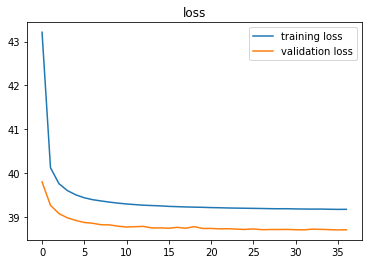

Plotting metrics...


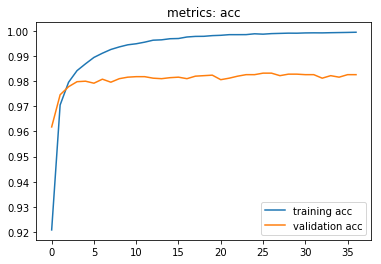

train {'acc': 0.99945456}
test {'acc': 0.9796}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11060177364005384733
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6449112698690321553
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 111.163704 , acc = 0.22 
Epoch 1 , step 100 , loss= 64.056725 , acc = 0.91 
Epoch 1 , step 200 , loss= 64.472176 , acc = 0.93 
Epoch 1 , step 300 , loss= 57.73128 , acc = 0.97 
Epoch 1 , step 400 , loss= 55.47513 , acc = 0.96 
Epoch 1 , step 500 , loss= 67.85894 , acc = 0.97 
Epoch 1 , step 549 , loss= 67.03613 val_loss= 59.69873 , acc = 0.94 val acc = 0.9612 
Epoch 1 finished, loss= 64.58945 val loss= 59.69873 ,  acc = 0.91827273 val acc = 0.9612
val_acc improved. 

Epoch 17 , step 500 , loss= 58.20055 , acc = 0.99 
Epoch 17 , step 549 , loss= 60.02765 val_loss= 58.073532 , acc = 0.99 val acc = 0.982 
Epoch 17 finished, loss= 58.845116 val loss= 58.073532 ,  acc = 0.9943455 val acc = 0.982
val_acc improved. 
Epoch 18 , step 50 , loss= 60.090927 , acc = 1.0 
Epoch 18 , step 150 , loss= 54.288746 , acc = 1.0 
Epoch 18 , step 250 , loss= 62.41597 , acc = 0.99 
Epoch 18 , step 350 , loss= 58.54165 , acc = 1.0 
Epoch 18 , step 450 , loss= 59.944496 , acc = 0.99 
Epoch 18 , step 549 , loss= 54.04749 val_loss= 58.07097 , acc = 0.99 val acc = 0.9816 
Epoch 18 finished, loss= 58.837673 val loss= 58.07097 ,  acc = 0.99474543 val acc = 0.9816

Epoch 19 , step 0 , loss= 61.527527 , acc = 0.99 
Epoch 19 , step 100 , loss= 58.743046 , acc = 1.0 
Epoch 19 , step 200 , loss= 55.143295 , acc = 1.0 
Epoch 19 , step 300 , loss= 60.05021 , acc = 1.0 
Epoch 19 , step 400 , loss= 59.75459 , acc = 1.0 
Epoch 19 , step 500 , loss= 60.06687 , acc = 1.0 
Epoch 19 , step 54

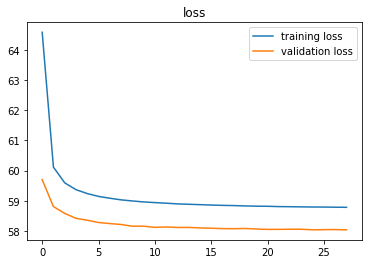

Plotting metrics...


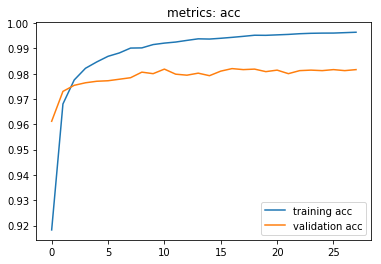

train {'acc': 0.99603635}
test {'acc': 0.9797}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12730238565482156509
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 874396717515267078
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 146.96597 , acc = 0.4 
Epoch 1 , step 100 , loss= 85.008896 , acc = 0.9 
Epoch 1 , step 200 , loss= 82.64346 , acc = 0.95 
Epoch 1 , step 300 , loss= 86.501 , acc = 0.93 
Epoch 1 , step 400 , loss= 89.05483 , acc = 0.95 
Epoch 1 , step 500 , loss= 79.23857 , acc = 0.96 
Epoch 1 , step 549 , loss= 81.75398 val_loss= 79.55023 , acc = 0.96 val acc = 0.9588 
Epoch 1 finished, loss= 85.83456 val loss= 79.55023 ,  acc = 0.91818184 val acc = 0.9588
val_acc improved. 
Epoch 2 

Epoch 17 , step 549 , loss= 78.56554 val_loss= 77.40367 , acc = 1.0 val acc = 0.9806 
Epoch 17 finished, loss= 78.45983 val loss= 77.40367 ,  acc = 0.9915272 val acc = 0.9806

Epoch 18 , step 50 , loss= 73.14985 , acc = 1.0 
Epoch 18 , step 150 , loss= 78.26698 , acc = 1.0 
Epoch 18 , step 250 , loss= 84.859245 , acc = 1.0 
Epoch 18 , step 350 , loss= 67.89458 , acc = 1.0 
Epoch 18 , step 450 , loss= 73.28458 , acc = 1.0 
Epoch 18 , step 549 , loss= 75.68466 val_loss= 77.40615 , acc = 0.99 val acc = 0.981 
Epoch 18 finished, loss= 78.44398 val loss= 77.40615 ,  acc = 0.99183637 val acc = 0.981

Epoch 19 , step 0 , loss= 82.275154 , acc = 1.0 
Epoch 19 , step 100 , loss= 83.26997 , acc = 1.0 
Epoch 19 , step 200 , loss= 80.73807 , acc = 0.98 
Epoch 19 , step 300 , loss= 82.25829 , acc = 1.0 
Epoch 19 , step 400 , loss= 84.33314 , acc = 1.0 
Epoch 19 , step 500 , loss= 77.200226 , acc = 0.99 
Epoch 19 , step 549 , loss= 75.99051 val_loss= 77.39313 , acc = 1.0 val acc = 0.9822 
Epoch 19 f

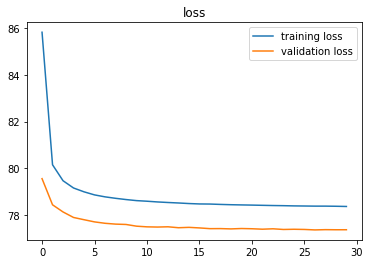

Plotting metrics...


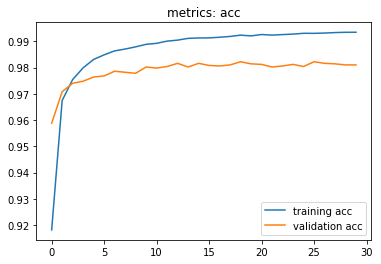

train {'acc': 0.99314547}
test {'acc': 0.979}

Training student with temperature = 10 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7910001917971231220
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11869057913056083665
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.715511 , acc = 0.28 
Epoch 1 , step 100 , loss= 0.29191914 , acc = 0.92 
Epoch 1 , step 200 , loss= 0.16662468 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.14932106 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.13417262 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.2800745 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.13632083 val_loss= 0.1127992 , acc = 0.96 val acc = 0.9648 
Epoch 1 finished, loss= 0.2453707 val loss= 0.1127992 ,  acc = 0.9358545 val acc = 0.9648
val_acc im

Epoch 17 , step 100 , loss= 0.0083239265 , acc = 1.0 
Epoch 17 , step 200 , loss= 9.919909e-05 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.005259377 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.08948012 , acc = 0.99 
Epoch 17 , step 500 , loss= 0.00034647252 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.00044680352 val_loss= 0.10243028 , acc = 1.0 val acc = 0.9792 
Epoch 17 finished, loss= 0.005905116 val loss= 0.10243028 ,  acc = 0.99978185 val acc = 0.9792

Epoch 18 , step 50 , loss= 0.0027402183 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00035006402 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00014533343 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.03280121 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.055762738 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0016507931 val_loss= 0.10238497 , acc = 1.0 val acc = 0.9802 
Epoch 18 finished, loss= 0.010559969 val loss= 0.10238497 ,  acc = 0.9995819 val acc = 0.9802

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'c

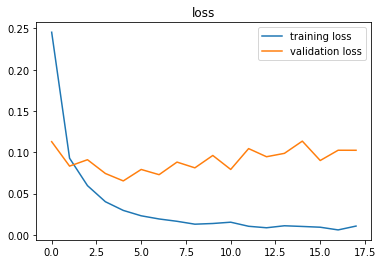

Plotting metrics...


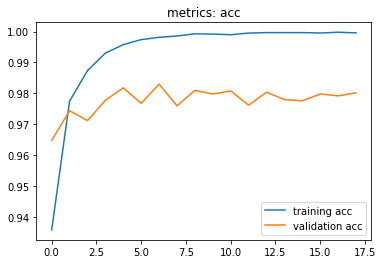

train {'acc': 0.9966}
test {'acc': 0.9779}

Training student with temperature = 10 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4337437153359431887
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 13971751698265475661
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 59.665073 , acc = 0.3 
Epoch 1 , step 100 , loss= 37.814472 , acc = 0.91 
Epoch 1 , step 200 , loss= 39.844707 , acc = 0.93 
Epoch 1 , step 300 , loss= 38.804176 , acc = 0.95 
Epoch 1 , step 400 , loss= 36.459766 , acc = 0.94 
Epoch 1 , step 500 , loss= 38.765835 , acc = 0.97 
Epoch 1 , step 549 , loss= 36.86894 val_loss= 37.263588 , acc = 0.98 val acc = 0.9638 
Epoch 1 finished, loss= 39.53297 val loss= 37.263588 ,  acc = 0.9232545 val acc = 0.9638
val_acc improved. 

Epoch 17 , step 549 , loss= 35.53379 val_loss= 36.521133 , acc = 1.0 val acc = 0.9822 
Epoch 17 finished, loss= 36.860863 val loss= 36.521133 ,  acc = 0.99954545 val acc = 0.9822

Epoch 18 , step 50 , loss= 35.705647 , acc = 1.0 
Epoch 18 , step 150 , loss= 37.930546 , acc = 1.0 
Epoch 18 , step 250 , loss= 35.79985 , acc = 1.0 
Epoch 18 , step 350 , loss= 35.79247 , acc = 1.0 
Epoch 18 , step 450 , loss= 37.01159 , acc = 0.99 
Epoch 18 , step 549 , loss= 34.69573 val_loss= 36.520054 , acc = 1.0 val acc = 0.9812 
Epoch 18 finished, loss= 36.85688 val loss= 36.520054 ,  acc = 0.99967265 val acc = 0.9812

Epoch 19 , step 0 , loss= 39.326637 , acc = 1.0 
Epoch 19 , step 100 , loss= 36.453613 , acc = 1.0 
Epoch 19 , step 200 , loss= 35.501987 , acc = 1.0 
Epoch 19 , step 300 , loss= 36.189003 , acc = 1.0 
Epoch 19 , step 400 , loss= 36.375275 , acc = 1.0 
Epoch 19 , step 500 , loss= 37.79441 , acc = 1.0 
Epoch 19 , step 549 , loss= 36.977932 val_loss= 36.527515 , acc = 1.0 val acc = 0.9826

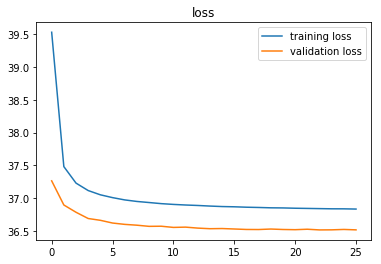

Plotting metrics...


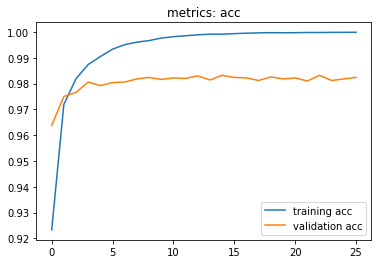

train {'acc': 0.9999273}
test {'acc': 0.9815}

Training student with temperature = 10 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2368939652961159405
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6667728408133343950
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 117.02148 , acc = 0.28 
Epoch 1 , step 100 , loss= 81.054085 , acc = 0.91 
Epoch 1 , step 200 , loss= 73.525276 , acc = 0.95 
Epoch 1 , step 300 , loss= 74.202705 , acc = 0.96 
Epoch 1 , step 400 , loss= 71.23435 , acc = 0.96 
Epoch 1 , step 500 , loss= 78.19406 , acc = 0.98 
Epoch 1 , step 549 , loss= 74.42693 val_loss= 74.361046 , acc = 0.97 val acc = 0.9618 
Epoch 1 finished, loss= 78.585266 val loss= 74.361046 ,  acc = 0.9175818 val acc = 0.9618
val_acc improved. 

Epoch 17 , step 549 , loss= 70.84475 val_loss= 72.96884 , acc = 1.0 val acc = 0.9806 
Epoch 17 finished, loss= 73.701904 val loss= 72.96884 ,  acc = 0.99709094 val acc = 0.9806
val_acc improved. 
Epoch 18 , step 50 , loss= 72.618645 , acc = 1.0 
Epoch 18 , step 150 , loss= 77.6429 , acc = 0.99 
Epoch 18 , step 250 , loss= 74.5789 , acc = 1.0 
Epoch 18 , step 350 , loss= 70.78369 , acc = 1.0 
Epoch 18 , step 450 , loss= 70.02275 , acc = 1.0 
Epoch 18 , step 549 , loss= 76.032845 val_loss= 72.97204 , acc = 1.0 val acc = 0.9806 
Epoch 18 finished, loss= 73.69179 val loss= 72.97204 ,  acc = 0.99710906 val acc = 0.9806

Epoch 19 , step 0 , loss= 73.00658 , acc = 1.0 
Epoch 19 , step 100 , loss= 75.14779 , acc = 1.0 
Epoch 19 , step 200 , loss= 76.71003 , acc = 1.0 
Epoch 19 , step 300 , loss= 81.63179 , acc = 1.0 
Epoch 19 , step 400 , loss= 70.73265 , acc = 1.0 
Epoch 19 , step 500 , loss= 80.223175 , acc = 0.99 
Epoch 19 , step 549 , loss= 66.32004 val_loss= 72.975624 , acc = 1.0 val acc 

Epoch 35 , step 549 , loss= 74.57307 val_loss= 72.92041 , acc = 1.0 val acc = 0.9812 
Epoch 35 finished, loss= 73.627426 val loss= 72.92041 ,  acc = 0.9989999 val acc = 0.9812

Epoch 36 , step 50 , loss= 75.20522 , acc = 1.0 
Epoch 36 , step 150 , loss= 72.516785 , acc = 1.0 
Epoch 36 , step 250 , loss= 71.04168 , acc = 1.0 
Epoch 36 , step 350 , loss= 71.343575 , acc = 1.0 
Epoch 36 , step 450 , loss= 69.20236 , acc = 1.0 
Epoch 36 , step 549 , loss= 78.31601 val_loss= 72.93461 , acc = 1.0 val acc = 0.9818 
Epoch 36 finished, loss= 73.62869 val loss= 72.93461 ,  acc = 0.9990545 val acc = 0.9818

Epoch 37 , step 0 , loss= 70.72958 , acc = 1.0 
Epoch 37 , step 100 , loss= 73.10606 , acc = 1.0 
Epoch 37 , step 200 , loss= 72.969406 , acc = 0.99 
Epoch 37 , step 300 , loss= 71.85437 , acc = 1.0 
Epoch 37 , step 400 , loss= 79.4168 , acc = 1.0 
Epoch 37 , step 500 , loss= 74.13256 , acc = 1.0 
Epoch 37 , step 549 , loss= 70.17417 val_loss= 72.9286 , acc = 1.0 val acc = 0.9814 
Epoch 37 fin

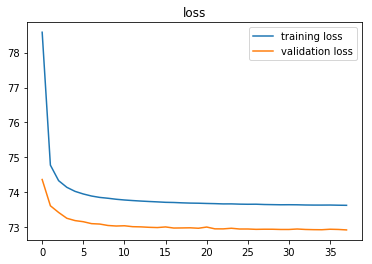

Plotting metrics...


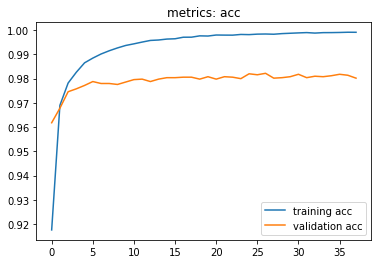

train {'acc': 0.99923635}
test {'acc': 0.9798}

Training student with temperature = 10 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6423533996458258473
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 13132254553537276912
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 175.41902 , acc = 0.22 
Epoch 1 , step 100 , loss= 127.56262 , acc = 0.87 
Epoch 1 , step 200 , loss= 118.73357 , acc = 0.93 
Epoch 1 , step 300 , loss= 108.32503 , acc = 0.96 
Epoch 1 , step 400 , loss= 110.90198 , acc = 0.94 
Epoch 1 , step 500 , loss= 112.98592 , acc = 0.95 
Epoch 1 , step 549 , loss= 110.780846 val_loss= 111.336876 , acc = 0.96 val acc = 0.9588 
Epoch 1 finished, loss= 117.664795 val loss= 111.336876 ,  acc = 0.9126909 val acc = 0.9588
val_acc

Epoch 17 , step 300 , loss= 107.35384 , acc = 0.99 
Epoch 17 , step 400 , loss= 108.664635 , acc = 0.97 
Epoch 17 , step 500 , loss= 111.348145 , acc = 0.99 
Epoch 17 , step 549 , loss= 111.262924 val_loss= 109.44274 , acc = 1.0 val acc = 0.9804 
Epoch 17 finished, loss= 110.54879 val loss= 109.44274 ,  acc = 0.99350905 val acc = 0.9804
val_acc improved. 
Epoch 18 , step 50 , loss= 113.07934 , acc = 0.98 
Epoch 18 , step 150 , loss= 100.748566 , acc = 0.99 
Epoch 18 , step 250 , loss= 107.386505 , acc = 1.0 
Epoch 18 , step 350 , loss= 117.03238 , acc = 0.99 
Epoch 18 , step 450 , loss= 105.206764 , acc = 0.99 
Epoch 18 , step 549 , loss= 113.17359 val_loss= 109.41823 , acc = 1.0 val acc = 0.9806 
Epoch 18 finished, loss= 110.538506 val loss= 109.41823 ,  acc = 0.99387276 val acc = 0.9806
val_acc improved. 
Epoch 19 , step 0 , loss= 107.1838 , acc = 0.98 
Epoch 19 , step 100 , loss= 111.9295 , acc = 0.99 
Epoch 19 , step 200 , loss= 111.24746 , acc = 0.99 
Epoch 19 , step 300 , loss= 1

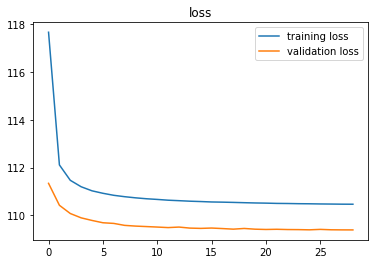

Plotting metrics...


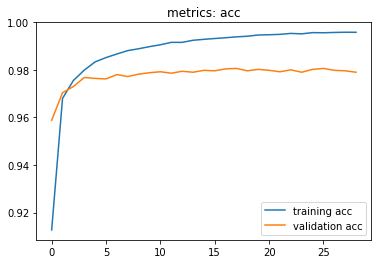

train {'acc': 0.9960909}
test {'acc': 0.9808}

Training student with temperature = 10 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18344882220830855028
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 9415930988008577077
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 229.64409 , acc = 0.52 
Epoch 1 , step 100 , loss= 162.10468 , acc = 0.9 
Epoch 1 , step 200 , loss= 145.70665 , acc = 0.9 
Epoch 1 , step 300 , loss= 159.54305 , acc = 0.95 
Epoch 1 , step 400 , loss= 150.6778 , acc = 0.95 
Epoch 1 , step 500 , loss= 158.94987 , acc = 0.96 
Epoch 1 , step 549 , loss= 160.51173 val_loss= 148.45892 , acc = 0.98 val acc = 0.9596 
Epoch 1 finished, loss= 156.76465 val loss= 148.45892 ,  acc = 0.9116364 val acc = 0.9596
val_acc improved.

Epoch 17 , step 400 , loss= 163.20634 , acc = 1.0 
Epoch 17 , step 500 , loss= 150.93636 , acc = 0.99 
Epoch 17 , step 549 , loss= 158.84296 val_loss= 145.87485 , acc = 1.0 val acc = 0.9808 
Epoch 17 finished, loss= 147.39583 val loss= 145.87485 ,  acc = 0.99045455 val acc = 0.9808
val_acc improved. 
Epoch 18 , step 50 , loss= 138.11034 , acc = 0.98 
Epoch 18 , step 150 , loss= 149.32472 , acc = 0.97 
Epoch 18 , step 250 , loss= 142.87164 , acc = 0.99 
Epoch 18 , step 350 , loss= 145.628 , acc = 1.0 
Epoch 18 , step 450 , loss= 151.71858 , acc = 1.0 
Epoch 18 , step 549 , loss= 152.58276 val_loss= 145.85786 , acc = 0.99 val acc = 0.9814 
Epoch 18 finished, loss= 147.38063 val loss= 145.85786 ,  acc = 0.99112725 val acc = 0.9814
val_acc improved. 
Epoch 19 , step 0 , loss= 156.06758 , acc = 0.99 
Epoch 19 , step 100 , loss= 149.83945 , acc = 1.0 
Epoch 19 , step 200 , loss= 156.29825 , acc = 1.0 
Epoch 19 , step 300 , loss= 146.1395 , acc = 0.98 
Epoch 19 , step 400 , loss= 139.47481 , 

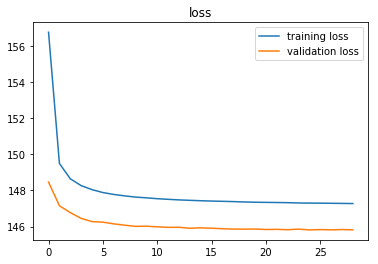

Plotting metrics...


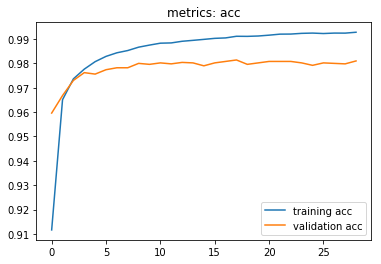

train {'acc': 0.9920909}
test {'acc': 0.9781}

Training student with temperature = 15 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2632970341182834006
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 13289106750051680892
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.770119 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.31479353 , acc = 0.91 
Epoch 1 , step 200 , loss= 0.2986667 , acc = 0.91 
Epoch 1 , step 300 , loss= 0.18575704 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.17994916 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.110924646 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.24061422 val_loss= 0.12606287 , acc = 0.94 val acc = 0.962 
Epoch 1 finished, loss= 0.24138889 val loss= 0.12606287 ,  acc = 0.9375455 val acc = 0.962
val_acc 

Epoch 17 , step 100 , loss= 0.00012255544 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.006085634 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0006681829 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.00065648323 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0010237391 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0011744102 val_loss= 0.08257099 , acc = 1.0 val acc = 0.9834 
Epoch 17 finished, loss= 0.006004435 val loss= 0.08257099 ,  acc = 0.9998545 val acc = 0.9834

Epoch 18 , step 50 , loss= 0.00036009058 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0022401882 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.022536822 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.019908717 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.00052650535 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.001549344 val_loss= 0.12073988 , acc = 1.0 val acc = 0.9808 
Epoch 18 finished, loss= 0.008607384 val loss= 0.12073988 ,  acc = 0.99967265 val acc = 0.9808

Epoch 19 , step 0 , loss= 0.000335658 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.00403

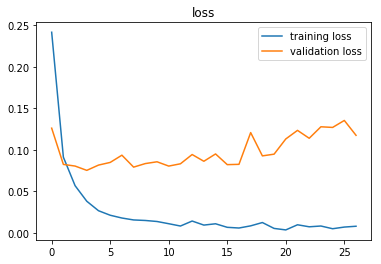

Plotting metrics...


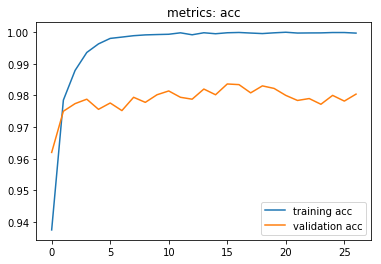

train {'acc': 0.99798185}
test {'acc': 0.9789}

Training student with temperature = 15 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7631730169343044500
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 15371753728763834330
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 131.96046 , acc = 0.28 
Epoch 1 , step 100 , loss= 110.15074 , acc = 0.92 
Epoch 1 , step 200 , loss= 108.54383 , acc = 0.86 
Epoch 1 , step 300 , loss= 105.42156 , acc = 0.95 
Epoch 1 , step 400 , loss= 106.37313 , acc = 0.92 
Epoch 1 , step 500 , loss= 107.760284 , acc = 0.93 
Epoch 1 , step 549 , loss= 101.98147 val_loss= 104.89766 , acc = 0.97 val acc = 0.96 
Epoch 1 finished, loss= 107.759605 val loss= 104.89766 ,  acc = 0.9184909 val acc = 0.96
val_acc impro

Epoch 17 , step 400 , loss= 105.55217 , acc = 1.0 
Epoch 17 , step 500 , loss= 99.637276 , acc = 1.0 
Epoch 17 , step 549 , loss= 104.26743 val_loss= 103.87621 , acc = 1.0 val acc = 0.9828 
Epoch 17 finished, loss= 104.36888 val loss= 103.87621 ,  acc = 0.9991273 val acc = 0.9828

Epoch 18 , step 50 , loss= 107.26034 , acc = 1.0 
Epoch 18 , step 150 , loss= 97.98078 , acc = 1.0 
Epoch 18 , step 250 , loss= 99.791794 , acc = 1.0 
Epoch 18 , step 350 , loss= 103.453606 , acc = 1.0 
Epoch 18 , step 450 , loss= 102.993286 , acc = 0.99 
Epoch 18 , step 549 , loss= 102.740814 val_loss= 103.87572 , acc = 1.0 val acc = 0.982 
Epoch 18 finished, loss= 104.36193 val loss= 103.87572 ,  acc = 0.99925447 val acc = 0.982

Epoch 19 , step 0 , loss= 103.44936 , acc = 1.0 
Epoch 19 , step 100 , loss= 107.877266 , acc = 1.0 
Epoch 19 , step 200 , loss= 105.44572 , acc = 1.0 
Epoch 19 , step 300 , loss= 105.06131 , acc = 1.0 
Epoch 19 , step 400 , loss= 105.53032 , acc = 1.0 
Epoch 19 , step 500 , loss= 

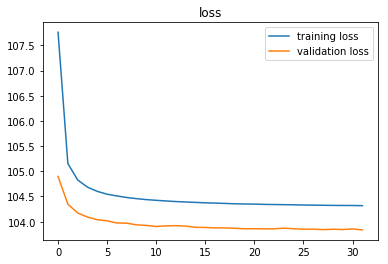

Plotting metrics...


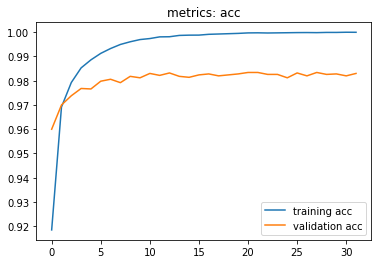

train {'acc': 0.9998909}
test {'acc': 0.9818}

Training student with temperature = 15 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17650670044351515655
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 13425771599642823951
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 260.6864 , acc = 0.37 
Epoch 1 , step 100 , loss= 218.23389 , acc = 0.85 
Epoch 1 , step 200 , loss= 210.76686 , acc = 0.94 
Epoch 1 , step 300 , loss= 219.0699 , acc = 0.92 
Epoch 1 , step 400 , loss= 207.00385 , acc = 0.95 
Epoch 1 , step 500 , loss= 202.9229 , acc = 0.99 
Epoch 1 , step 549 , loss= 207.4956 val_loss= 209.36716 , acc = 0.97 val acc = 0.9572 
Epoch 1 finished, loss= 214.89447 val loss= 209.36716 ,  acc = 0.91412723 val acc = 0.9572
val_acc improved

Epoch 17 , step 500 , loss= 207.46564 , acc = 0.99 
Epoch 17 , step 549 , loss= 211.71552 val_loss= 207.67699 , acc = 1.0 val acc = 0.9812 
Epoch 17 finished, loss= 208.71323 val loss= 207.67699 ,  acc = 0.9959091 val acc = 0.9812

Epoch 18 , step 50 , loss= 202.00706 , acc = 1.0 
Epoch 18 , step 150 , loss= 207.75111 , acc = 1.0 
Epoch 18 , step 250 , loss= 204.16211 , acc = 0.99 
Epoch 18 , step 350 , loss= 205.17639 , acc = 1.0 
Epoch 18 , step 450 , loss= 213.24786 , acc = 0.99 
Epoch 18 , step 549 , loss= 205.37885 val_loss= 207.63477 , acc = 1.0 val acc = 0.9808 
Epoch 18 finished, loss= 208.70532 val loss= 207.63477 ,  acc = 0.9964727 val acc = 0.9808

Epoch 19 , step 0 , loss= 203.8636 , acc = 1.0 
Epoch 19 , step 100 , loss= 207.72191 , acc = 1.0 
Epoch 19 , step 200 , loss= 209.61986 , acc = 1.0 
Epoch 19 , step 300 , loss= 204.1199 , acc = 0.99 
Epoch 19 , step 400 , loss= 203.81676 , acc = 0.99 
Epoch 19 , step 500 , loss= 215.88467 , acc = 1.0 
Epoch 19 , step 549 , loss= 

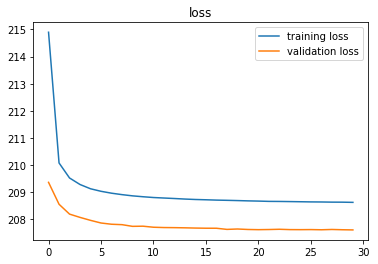

Plotting metrics...


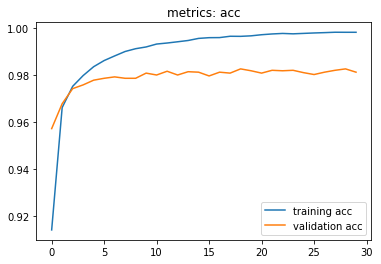

train {'acc': 0.9982909}
test {'acc': 0.9792}

Training student with temperature = 15 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10603665550246875944
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 307499162246638358
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 389.98212 , acc = 0.25 
Epoch 1 , step 100 , loss= 320.03128 , acc = 0.93 
Epoch 1 , step 200 , loss= 332.3616 , acc = 0.85 
Epoch 1 , step 300 , loss= 311.12637 , acc = 0.95 
Epoch 1 , step 400 , loss= 309.9285 , acc = 0.93 
Epoch 1 , step 500 , loss= 306.8458 , acc = 0.95 
Epoch 1 , step 549 , loss= 307.5436 val_loss= 314.03366 , acc = 0.98 val acc = 0.9562 
Epoch 1 finished, loss= 322.31396 val loss= 314.03366 ,  acc = 0.90485454 val acc = 0.9562
val_acc improved

Epoch 17 , step 500 , loss= 308.05957 , acc = 1.0 
Epoch 17 , step 549 , loss= 301.34286 val_loss= 311.43756 , acc = 0.99 val acc = 0.9806 
Epoch 17 finished, loss= 313.05414 val loss= 311.43756 ,  acc = 0.9920546 val acc = 0.9806
val_acc improved. 
Epoch 18 , step 50 , loss= 305.0766 , acc = 1.0 
Epoch 18 , step 150 , loss= 315.64224 , acc = 0.98 
Epoch 18 , step 250 , loss= 320.35406 , acc = 0.99 
Epoch 18 , step 350 , loss= 317.1173 , acc = 1.0 
Epoch 18 , step 450 , loss= 328.6422 , acc = 0.97 
Epoch 18 , step 549 , loss= 308.6412 val_loss= 311.4447 , acc = 0.99 val acc = 0.9804 
Epoch 18 finished, loss= 313.04272 val loss= 311.4447 ,  acc = 0.99225456 val acc = 0.9804

Epoch 19 , step 0 , loss= 317.61667 , acc = 0.99 
Epoch 19 , step 100 , loss= 319.45218 , acc = 0.97 
Epoch 19 , step 200 , loss= 310.63083 , acc = 0.99 
Epoch 19 , step 300 , loss= 315.88672 , acc = 0.99 
Epoch 19 , step 400 , loss= 321.53284 , acc = 0.98 
Epoch 19 , step 500 , loss= 319.765 , acc = 0.99 
Epoch 19 

Epoch 35 , step 400 , loss= 316.14612 , acc = 1.0 
Epoch 35 , step 500 , loss= 309.40637 , acc = 0.99 
Epoch 35 , step 549 , loss= 313.22086 val_loss= 311.37253 , acc = 1.0 val acc = 0.9808 
Epoch 35 finished, loss= 312.91574 val loss= 311.37253 ,  acc = 0.99580014 val acc = 0.9808

Epoch 36 , step 50 , loss= 324.7263 , acc = 1.0 
Epoch 36 , step 150 , loss= 307.83533 , acc = 1.0 
Epoch 36 , step 250 , loss= 314.04648 , acc = 1.0 
Epoch 36 , step 350 , loss= 313.25314 , acc = 1.0 
Epoch 36 , step 450 , loss= 307.3369 , acc = 1.0 
Epoch 36 , step 549 , loss= 311.94305 val_loss= 311.37775 , acc = 1.0 val acc = 0.9796 
Epoch 36 finished, loss= 312.91565 val loss= 311.37775 ,  acc = 0.9957454 val acc = 0.9796

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.75, 'coef_hardloss': 0.25, 'temperature': 15, 'temperature_effect': 225, 'train_acc': 0.9958, 'test_acc': 0.98}
Plotting loss...


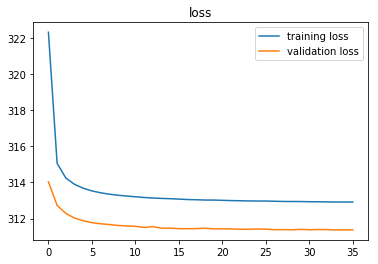

Plotting metrics...


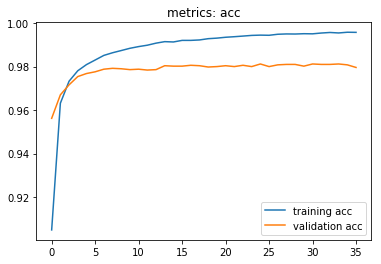

train {'acc': 0.9958}
test {'acc': 0.98}

Training student with temperature = 15 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16226381051772341576
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6100396260922169045
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 519.41394 , acc = 0.23 
Epoch 1 , step 100 , loss= 446.2586 , acc = 0.91 
Epoch 1 , step 200 , loss= 424.0676 , acc = 0.93 
Epoch 1 , step 300 , loss= 419.76883 , acc = 0.96 
Epoch 1 , step 400 , loss= 415.26007 , acc = 0.93 
Epoch 1 , step 500 , loss= 409.13922 , acc = 0.96 
Epoch 1 , step 549 , loss= 399.18613 val_loss= 418.63962 , acc = 0.92 val acc = 0.9556 
Epoch 1 finished, loss= 429.5876 val loss= 418.63962 ,  acc = 0.9025819 val acc = 0.9556
val_acc improved. 
Epo

Epoch 17 , step 500 , loss= 419.2067 , acc = 0.97 
Epoch 17 , step 549 , loss= 405.12268 val_loss= 415.26102 , acc = 1.0 val acc = 0.9796 
Epoch 17 finished, loss= 417.4108 val loss= 415.26102 ,  acc = 0.99 val acc = 0.9796
val_acc improved. 
Epoch 18 , step 50 , loss= 412.56628 , acc = 0.98 
Epoch 18 , step 150 , loss= 411.15204 , acc = 1.0 
Epoch 18 , step 250 , loss= 427.8221 , acc = 0.97 
Epoch 18 , step 350 , loss= 407.8277 , acc = 0.98 
Epoch 18 , step 450 , loss= 420.58032 , acc = 1.0 
Epoch 18 , step 549 , loss= 402.0075 val_loss= 415.24582 , acc = 1.0 val acc = 0.9782 
Epoch 18 finished, loss= 417.38528 val loss= 415.24582 ,  acc = 0.9902364 val acc = 0.9782

Epoch 19 , step 0 , loss= 426.41785 , acc = 0.99 
Epoch 19 , step 100 , loss= 402.93073 , acc = 0.97 
Epoch 19 , step 200 , loss= 428.051 , acc = 0.99 
Epoch 19 , step 300 , loss= 419.2119 , acc = 0.95 
Epoch 19 , step 400 , loss= 412.53036 , acc = 1.0 
Epoch 19 , step 500 , loss= 435.0957 , acc = 0.99 
Epoch 19 , step 54

Epoch 35 , step 300 , loss= 423.51364 , acc = 0.99 
Epoch 35 , step 400 , loss= 424.66006 , acc = 0.97 
Epoch 35 , step 500 , loss= 415.6166 , acc = 0.99 
Epoch 35 , step 549 , loss= 415.8705 val_loss= 415.1112 , acc = 1.0 val acc = 0.9802 
Epoch 35 finished, loss= 417.22006 val loss= 415.1112 ,  acc = 0.99239993 val acc = 0.9802

Epoch 36 , step 50 , loss= 423.85706 , acc = 1.0 
Epoch 36 , step 150 , loss= 433.55447 , acc = 0.98 
Epoch 36 , step 250 , loss= 428.39462 , acc = 1.0 
Epoch 36 , step 350 , loss= 416.2001 , acc = 0.99 
Epoch 36 , step 450 , loss= 400.2843 , acc = 1.0 
Epoch 36 , step 549 , loss= 427.94012 val_loss= 415.11118 , acc = 0.99 val acc = 0.9802 
Epoch 36 finished, loss= 417.22058 val loss= 415.11118 ,  acc = 0.99227273 val acc = 0.9802

Epoch 37 , step 0 , loss= 407.03305 , acc = 1.0 
Epoch 37 , step 100 , loss= 429.30045 , acc = 1.0 
Epoch 37 , step 200 , loss= 439.8987 , acc = 0.99 
Epoch 37 , step 300 , loss= 417.9529 , acc = 1.0 
Epoch 37 , step 400 , loss= 41

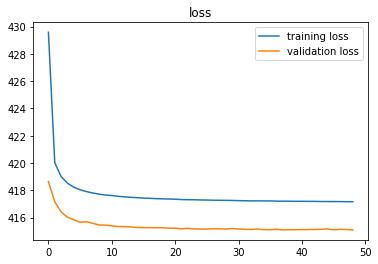

Plotting metrics...


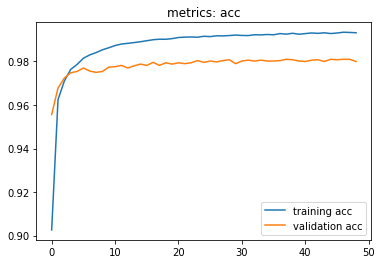

train {'acc': 0.99341816}
test {'acc': 0.9783}

Training student with temperature = 20 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12913790078711932743
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 6387322622812393771
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.90762 , acc = 0.2 
Epoch 1 , step 100 , loss= 0.39007524 , acc = 0.9 
Epoch 1 , step 200 , loss= 0.22596872 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.25804147 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.14968811 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.16001074 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.102295086 val_loss= 0.121112816 , acc = 0.99 val acc = 0.9642 
Epoch 1 finished, loss= 0.24462469 val loss= 0.121112816 ,  acc = 0.9373636 val acc = 0.9642
val_a

Epoch 17 , step 100 , loss= 0.00155215 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.00197382 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.000855039 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.00016846968 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0026216137 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0015026354 val_loss= 0.10173263 , acc = 1.0 val acc = 0.9814 
Epoch 17 finished, loss= 0.0073667145 val loss= 0.10173263 ,  acc = 0.9997636 val acc = 0.9814

Epoch 18 , step 50 , loss= 0.0009384731 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0015633979 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00044211198 , acc = 1.0 
Epoch 18 , step 350 , loss= 6.4154745e-05 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.007887037 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00041634793 val_loss= 0.105292186 , acc = 1.0 val acc = 0.9808 
Epoch 18 finished, loss= 0.00699985 val loss= 0.105292186 ,  acc = 0.9997636 val acc = 0.9808

Epoch 19 , step 0 , loss= 2.9228606e-05 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0939

Student performance with {'coef_softloss': 0.0, 'coef_hardloss': 1.0, 'temperature': 20, 'temperature_effect': 400, 'train_acc': 0.9995091, 'test_acc': 0.9817}
Plotting loss...


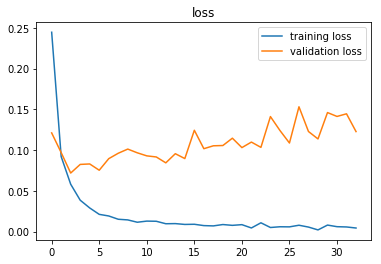

Plotting metrics...


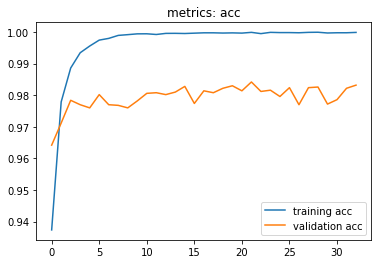

train {'acc': 0.9995091}
test {'acc': 0.9817}

Training student with temperature = 20 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6668519504112508097
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 5370483437006153131
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 232.45186 , acc = 0.19 
Epoch 1 , step 100 , loss= 206.30418 , acc = 0.92 
Epoch 1 , step 200 , loss= 205.7725 , acc = 0.95 
Epoch 1 , step 300 , loss= 206.02596 , acc = 0.95 
Epoch 1 , step 400 , loss= 206.93721 , acc = 0.93 
Epoch 1 , step 500 , loss= 200.66914 , acc = 0.96 
Epoch 1 , step 549 , loss= 202.81615 val_loss= 204.36458 , acc = 0.99 val acc = 0.9628 
Epoch 1 finished, loss= 207.59216 val loss= 204.36458 ,  acc = 0.9178909 val acc = 0.9628
val_acc improv

Epoch 17 , step 400 , loss= 204.55371 , acc = 1.0 
Epoch 17 , step 500 , loss= 196.7838 , acc = 1.0 
Epoch 17 , step 549 , loss= 208.78989 val_loss= 203.45372 , acc = 1.0 val acc = 0.9828 
Epoch 17 finished, loss= 204.0086 val loss= 203.45372 ,  acc = 0.99883634 val acc = 0.9828

Epoch 18 , step 50 , loss= 198.97322 , acc = 1.0 
Epoch 18 , step 150 , loss= 201.84796 , acc = 1.0 
Epoch 18 , step 250 , loss= 205.70287 , acc = 1.0 
Epoch 18 , step 350 , loss= 209.19492 , acc = 1.0 
Epoch 18 , step 450 , loss= 199.91524 , acc = 1.0 
Epoch 18 , step 549 , loss= 206.93979 val_loss= 203.4382 , acc = 1.0 val acc = 0.9838 
Epoch 18 finished, loss= 204.00264 val loss= 203.4382 ,  acc = 0.9991455 val acc = 0.9838
val_acc improved. 
Epoch 19 , step 0 , loss= 201.68927 , acc = 0.99 
Epoch 19 , step 100 , loss= 202.92165 , acc = 1.0 
Epoch 19 , step 200 , loss= 202.89594 , acc = 1.0 
Epoch 19 , step 300 , loss= 198.71089 , acc = 1.0 
Epoch 19 , step 400 , loss= 204.79996 , acc = 1.0 
Epoch 19 , step

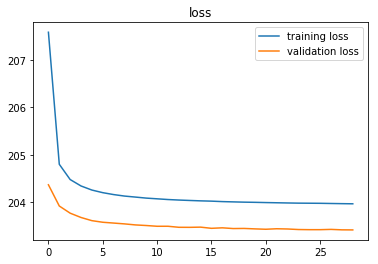

Plotting metrics...


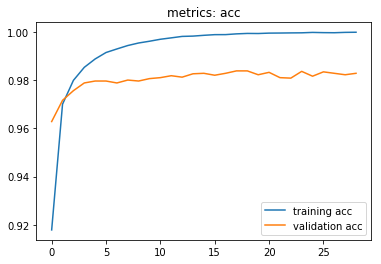

train {'acc': 0.9998182}
test {'acc': 0.9804}

Training student with temperature = 20 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12751003929132372290
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11075037576253264786
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 462.56998 , acc = 0.12 
Epoch 1 , step 100 , loss= 416.4974 , acc = 0.88 
Epoch 1 , step 200 , loss= 411.66772 , acc = 0.9 
Epoch 1 , step 300 , loss= 414.92838 , acc = 0.93 
Epoch 1 , step 400 , loss= 408.31982 , acc = 0.98 
Epoch 1 , step 500 , loss= 409.24997 , acc = 0.95 
Epoch 1 , step 549 , loss= 403.87216 val_loss= 408.61002 , acc = 0.93 val acc = 0.9558 
Epoch 1 finished, loss= 414.72302 val loss= 408.61002 ,  acc = 0.90761817 val acc = 0.9558
val_acc improv

Epoch 17 , step 400 , loss= 399.64948 , acc = 1.0 
Epoch 17 , step 500 , loss= 404.99832 , acc = 1.0 
Epoch 17 , step 549 , loss= 413.94632 val_loss= 406.81088 , acc = 1.0 val acc = 0.9802 
Epoch 17 finished, loss= 407.9974 val loss= 406.81088 ,  acc = 0.9958909 val acc = 0.9802

Epoch 18 , step 50 , loss= 405.2974 , acc = 1.0 
Epoch 18 , step 150 , loss= 416.0739 , acc = 0.98 
Epoch 18 , step 250 , loss= 411.0749 , acc = 1.0 
Epoch 18 , step 350 , loss= 405.14215 , acc = 0.99 
Epoch 18 , step 450 , loss= 417.84967 , acc = 0.99 
Epoch 18 , step 549 , loss= 407.9726 val_loss= 406.7992 , acc = 0.99 val acc = 0.9798 
Epoch 18 finished, loss= 407.98694 val loss= 406.7992 ,  acc = 0.9958727 val acc = 0.9798

Epoch 19 , step 0 , loss= 407.2871 , acc = 0.99 
Epoch 19 , step 100 , loss= 411.01886 , acc = 0.99 
Epoch 19 , step 200 , loss= 405.70926 , acc = 1.0 
Epoch 19 , step 300 , loss= 415.20605 , acc = 1.0 
Epoch 19 , step 400 , loss= 410.53287 , acc = 0.99 
Epoch 19 , step 500 , loss= 412.

Epoch 35 , step 300 , loss= 394.694 , acc = 1.0 
Epoch 35 , step 400 , loss= 402.5313 , acc = 1.0 
Epoch 35 , step 500 , loss= 410.74686 , acc = 1.0 
Epoch 35 , step 549 , loss= 408.46027 val_loss= 406.76456 , acc = 1.0 val acc = 0.9828 
Epoch 35 finished, loss= 407.8907 val loss= 406.76456 ,  acc = 0.99863636 val acc = 0.9828

Epoch 36 , step 50 , loss= 399.35095 , acc = 0.98 
Epoch 36 , step 150 , loss= 405.54257 , acc = 1.0 
Epoch 36 , step 250 , loss= 411.14862 , acc = 1.0 
Epoch 36 , step 350 , loss= 414.4394 , acc = 0.99 
Epoch 36 , step 450 , loss= 411.39282 , acc = 1.0 
Epoch 36 , step 549 , loss= 402.85428 val_loss= 406.74658 , acc = 1.0 val acc = 0.9824 
Epoch 36 finished, loss= 407.89056 val loss= 406.74658 ,  acc = 0.99863636 val acc = 0.9824

Epoch 37 , step 0 , loss= 404.15485 , acc = 1.0 
Epoch 37 , step 100 , loss= 412.87976 , acc = 1.0 
Epoch 37 , step 200 , loss= 409.40073 , acc = 1.0 
Epoch 37 , step 300 , loss= 410.35104 , acc = 1.0 
Epoch 37 , step 400 , loss= 409.

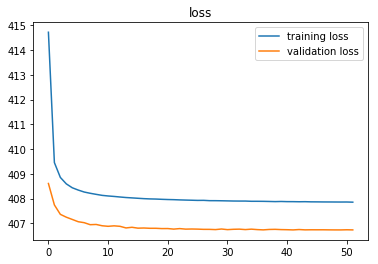

Plotting metrics...


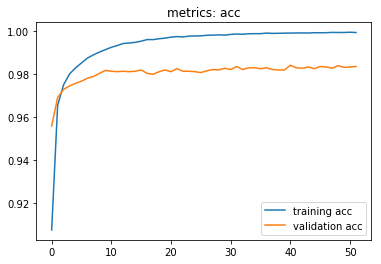

train {'acc': 0.9993455}
test {'acc': 0.9801}

Training student with temperature = 20 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18058552742947126724
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 11206482600721146423
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 690.9393 , acc = 0.34 
Epoch 1 , step 100 , loss= 635.6727 , acc = 0.83 
Epoch 1 , step 200 , loss= 610.32294 , acc = 0.94 
Epoch 1 , step 300 , loss= 615.7448 , acc = 0.93 
Epoch 1 , step 400 , loss= 606.5974 , acc = 0.94 
Epoch 1 , step 500 , loss= 617.32025 , acc = 0.96 
Epoch 1 , step 549 , loss= 603.6126 val_loss= 612.9356 , acc = 0.97 val acc = 0.9532 
Epoch 1 finished, loss= 621.72546 val loss= 612.9356 ,  acc = 0.9020909 val acc = 0.9532
val_acc improved. 

Epoch 17 , step 500 , loss= 615.6114 , acc = 1.0 
Epoch 17 , step 549 , loss= 602.9563 val_loss= 610.1678 , acc = 0.99 val acc = 0.9816 
Epoch 17 finished, loss= 611.9826 val loss= 610.1678 ,  acc = 0.99225456 val acc = 0.9816

Epoch 18 , step 50 , loss= 609.1528 , acc = 0.99 
Epoch 18 , step 150 , loss= 592.21796 , acc = 0.99 
Epoch 18 , step 250 , loss= 605.4009 , acc = 0.99 
Epoch 18 , step 350 , loss= 609.13916 , acc = 1.0 
Epoch 18 , step 450 , loss= 613.7416 , acc = 0.98 
Epoch 18 , step 549 , loss= 614.6264 val_loss= 610.1449 , acc = 0.97 val acc = 0.982 
Epoch 18 finished, loss= 611.9775 val loss= 610.1449 ,  acc = 0.9925455 val acc = 0.982
val_acc improved. 
Epoch 19 , step 0 , loss= 611.30457 , acc = 1.0 
Epoch 19 , step 100 , loss= 607.2844 , acc = 0.99 
Epoch 19 , step 200 , loss= 613.86804 , acc = 1.0 
Epoch 19 , step 300 , loss= 615.1504 , acc = 1.0 
Epoch 19 , step 400 , loss= 621.82117 , acc = 0.99 
Epoch 19 , step 500 , loss= 612.93335 , acc = 0.99 
Epoch 19 , step 549

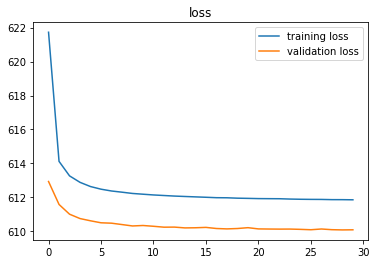

Plotting metrics...


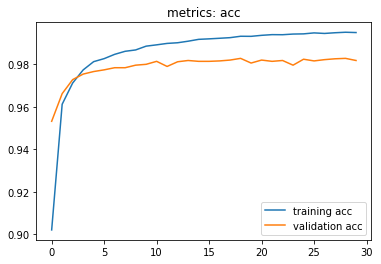

train {'acc': 0.995}
test {'acc': 0.9801}

Training student with temperature = 20 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2238351278404942498
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8007467008
locality {
  bus_id: 1
}
incarnation: 5507227620600699670
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 921.9279 , acc = 0.23 
Epoch 1 , step 100 , loss= 857.0418 , acc = 0.82 
Epoch 1 , step 200 , loss= 821.1878 , acc = 0.96 
Epoch 1 , step 300 , loss= 823.9248 , acc = 0.97 
Epoch 1 , step 400 , loss= 841.00964 , acc = 0.96 
Epoch 1 , step 500 , loss= 813.2378 , acc = 0.97 
Epoch 1 , step 549 , loss= 836.2522 val_loss= 816.9183 , acc = 0.91 val acc = 0.9522 
Epoch 1 finished, loss= 828.8902 val loss= 816.9183 ,  acc = 0.89829093 val acc = 0.9522
val_acc improved. 
Epoch 2 

Epoch 17 , step 500 , loss= 824.9284 , acc = 0.97 
Epoch 17 , step 549 , loss= 816.6343 val_loss= 813.52985 , acc = 0.95 val acc = 0.9786 
Epoch 17 finished, loss= 815.97723 val loss= 813.52985 ,  acc = 0.98889095 val acc = 0.9786

Epoch 18 , step 50 , loss= 817.3962 , acc = 0.98 
Epoch 18 , step 150 , loss= 814.55566 , acc = 0.99 
Epoch 18 , step 250 , loss= 811.4689 , acc = 0.97 
Epoch 18 , step 350 , loss= 829.85974 , acc = 0.99 
Epoch 18 , step 450 , loss= 820.3266 , acc = 0.98 
Epoch 18 , step 549 , loss= 820.8569 val_loss= 813.56714 , acc = 0.99 val acc = 0.9788 
Epoch 18 finished, loss= 815.96375 val loss= 813.56714 ,  acc = 0.9891637 val acc = 0.9788
val_acc improved. 
Epoch 19 , step 0 , loss= 822.57764 , acc = 0.99 
Epoch 19 , step 100 , loss= 820.2544 , acc = 0.99 
Epoch 19 , step 200 , loss= 827.5036 , acc = 0.98 
Epoch 19 , step 300 , loss= 818.9908 , acc = 1.0 
Epoch 19 , step 400 , loss= 832.0597 , acc = 0.98 
Epoch 19 , step 500 , loss= 827.6438 , acc = 0.99 
Epoch 19 ,

Epoch 35 , step 300 , loss= 821.70154 , acc = 1.0 
Epoch 35 , step 400 , loss= 794.3035 , acc = 1.0 
Epoch 35 , step 500 , loss= 832.39764 , acc = 0.99 
Epoch 35 , step 549 , loss= 831.59106 val_loss= 813.4349 , acc = 1.0 val acc = 0.9794 
Epoch 35 finished, loss= 815.76807 val loss= 813.4349 ,  acc = 0.99196357 val acc = 0.9794

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 1.0, 'coef_hardloss': 0.0, 'temperature': 20, 'temperature_effect': 400, 'train_acc': 0.99152726, 'test_acc': 0.9778}
Plotting loss...


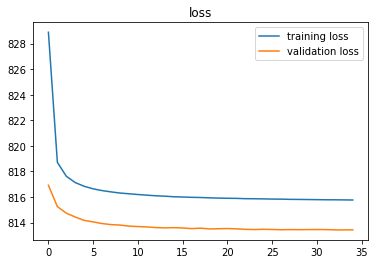

Plotting metrics...


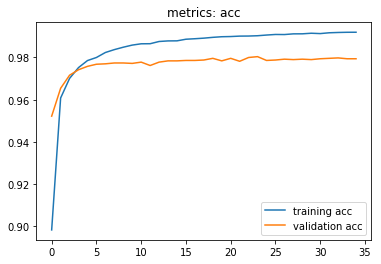

train {'acc': 0.99152726}
test {'acc': 0.9778}

{2: [{'acc': 0.976}, {'acc': 0.9831}, {'acc': 0.9813}, {'acc': 0.9833}, {'acc': 0.9811}], 4: [{'acc': 0.9809}, {'acc': 0.9815}, {'acc': 0.9811}, {'acc': 0.9823}, {'acc': 0.9801}], 6: [{'acc': 0.9817}, {'acc': 0.9826}, {'acc': 0.9805}, {'acc': 0.9782}, {'acc': 0.9788}], 8: [{'acc': 0.9792}, {'acc': 0.9798}, {'acc': 0.9796}, {'acc': 0.9797}, {'acc': 0.979}], 10: [{'acc': 0.9779}, {'acc': 0.9815}, {'acc': 0.9798}, {'acc': 0.9808}, {'acc': 0.9781}], 15: [{'acc': 0.9789}, {'acc': 0.9818}, {'acc': 0.9792}, {'acc': 0.98}, {'acc': 0.9783}], 20: [{'acc': 0.9817}, {'acc': 0.9804}, {'acc': 0.9801}, {'acc': 0.9801}, {'acc': 0.9778}]}


In [17]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])

list_exp2 = []
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    tmp_effect = temperature**2 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True, gpu_id=gpu_id)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=100
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp2.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp2 = pd.DataFrame(list_exp2)
print(test_metrics)

In [18]:
print(df_exp2)
print(df_exp2['test_acc'].mean())

    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            1.00           0.00            2                   4    0.9760   
1            0.75           0.25            2                   4    0.9831   
2            0.50           0.50            2                   4    0.9813   
3            0.25           0.75            2                   4    0.9833   
4            0.00           1.00            2                   4    0.9811   
5            1.00           0.00            4                  16    0.9809   
6            0.75           0.25            4                  16    0.9815   
7            0.50           0.50            4                  16    0.9811   
8            0.25           0.75            4                  16    0.9823   
9            0.00           1.00            4                  16    0.9801   
10           1.00           0.00            6                  36    0.9817   
11           0.75           0.25            6       

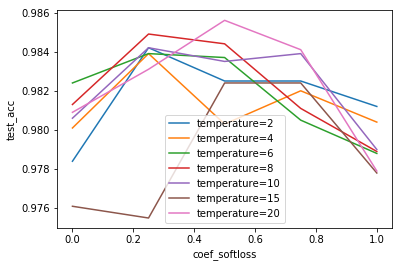

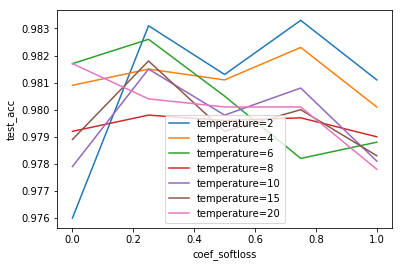

In [19]:
plot_trend(df_exp, label_x='coef_softloss', label_y='test_acc', label_line='temperature')
plot_trend(df_exp2, label_x='coef_softloss', label_y='test_acc', label_line='temperature')

In [20]:

# close_session(session)